In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import os

pd.set_option('display.max_columns', None)

In [2]:
# FOR NORMALIZING FEATURE VECTOR
feature_vector_main = pd.read_csv('./Features.csv')
feature_vector = feature_vector_main[
                         ['avgX', 'avgY', 'avgSDX', 'avgSDY', 'avgV', 'avgA', 'avgSDV', 'avgSDA', 'pen_down', 'pen_up',
                          'pen_ratio', 'sign_width', 'sign_height', 'width_height_ratio', 'total_sign_duration',
                          'range_pressure', 'max_pressure', 'sample_points', 'sample_points_to_width', 'mean_pressure',
                          'pressure_variance', 'avg_x_velocity', 'avg_y_velocity', 'max_x_velocity', 'max_y_velocity',
                          'samples_positive_x_velocity', 'samples_positive_y_velocity', 'variance_x_velocity',
                          'variance_y_velocity', 'std_x_velocity', 'std_y_velocity', 'median_x_velocity',
                          'median_y_velocity', 'corr_x_y_velocity', 'mean_x_acceleration', 'mean_y_acceleration',
                          'corr_x_y_acceleration', 'variance_x_acceleration', 'variance_y_acceleration',
                          'std_x_acceleration', 'std_y_acceleration', 'x_local_minima', 'y_local_minima']]

# scaler = RobustScaler()
# feature_vector = scaler.fit_transform(feature_vector)
# feature_vector = pd.DataFrame(feature_vector)
# feature_vector.columns = ['avgX', 'avgY', 'avgSDX', 'avgSDY', 'avgV', 'avgA', 'avgSDV', 'avgSDA', 'pen_down', 'pen_up',
#                           'pen_ratio', 'sign_width', 'sign_height', 'width_height_ratio', 'total_sign_duration',
#                           'range_pressure', 'max_pressure', 'sample_points', 'sample_points_to_width', 'mean_pressure',
#                           'pressure_variance', 'avg_x_velocity', 'avg_y_velocity', 'max_x_velocity', 'max_y_velocity',
#                           'samples_positive_x_velocity', 'samples_positive_y_velocity', 'variance_x_velocity',
#                           'variance_y_velocity', 'std_x_velocity', 'std_y_velocity', 'median_x_velocity',
#                           'median_y_velocity', 'corr_x_y_velocity', 'mean_x_acceleration', 'mean_y_acceleration',
#                           'corr_x_y_acceleration', 'variance_x_acceleration', 'variance_y_acceleration',
#                           'std_x_acceleration', 'std_y_acceleration', 'x_local_minima', 'y_local_minima']

feature_vector = ((feature_vector - feature_vector.min()) / (feature_vector.max() - feature_vector.min()))

feature_vector['ID'] = feature_vector_main['ID'] - 1
feature_vector['F'] = feature_vector_main['F']

feature_vector.to_csv('features_normalized.csv', index=False)

feature_vector = pd.read_csv('features_normalized.csv')

In [3]:
num_of_signatures = 40  # number of classes
print('The number of signatures are:', num_of_signatures)
split_percentage = 0.2

The number of signatures are: 40


In [4]:
# os.getcwd()

# os.mkdir('user_models')

# # os.chdir('user_models/')

In [5]:
cols = ['avgX', 'avgY', 'avgSDX', 'avgSDY', 'avgV', 'avgA', 'avgSDV', 'avgSDA', 'pen_down', 'pen_up',
                          'pen_ratio', 'sign_width', 'sign_height', 'width_height_ratio', 'total_sign_duration',
                          'range_pressure', 'max_pressure', 'sample_points', 'sample_points_to_width', 'mean_pressure',
                          'pressure_variance', 'avg_x_velocity', 'avg_y_velocity', 'max_x_velocity', 'max_y_velocity',
                          'samples_positive_x_velocity', 'samples_positive_y_velocity', 'variance_x_velocity',
                          'variance_y_velocity', 'std_x_velocity', 'std_y_velocity', 'median_x_velocity',
                          'median_y_velocity', 'corr_x_y_velocity', 'mean_x_acceleration', 'mean_y_acceleration',
                          'corr_x_y_acceleration', 'variance_x_acceleration', 'variance_y_acceleration',
                          'std_x_acceleration', 'std_y_acceleration', 'x_local_minima', 'y_local_minima']

In [6]:
# accuracies

In [7]:
user_accuracy = {}

In [8]:
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=7, 
                                            verbose=1, 
                                            factor=0.25, 
                                            min_lr=0.000001)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0,
                                                  verbose=1, mode='auto', restore_best_weights=False)

In [9]:
def model2_function(user):
    model_2_df = feature_vector[user*40:(user+1)*40].copy()
    model_2_df = model_2_df.sample(frac=1, random_state=1).reset_index(drop=True)

    y = model_2_df['F']
    X = model_2_df.drop(['ID', 'F'], axis=1)
    
    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=split_percentage, shuffle=True, random_state=1)

    # NEURAL NETWORK 2
    model = keras.Sequential([
        keras.layers.Dense(256, input_shape=[x_train.shape[1]]),
#         keras.layers.Dense(1024, activation='relu', kernel_initializer='random_uniform'),
#         keras.layers.Dense(512, activation='relu', kernel_initializer='random_uniform'),
#         keras.layers.Dense(512, activation='relu', kernel_initializer='random_uniform'),
        keras.layers.Dense(256, activation='relu', kernel_initializer='random_uniform'),
#         keras.layers.Dense(256, activation='relu', kernel_initializer='random_uniform'),
        keras.layers.Dense(128, activation='relu', kernel_initializer='random_uniform'),
#         keras.layers.Dense(64, activation='relu', kernel_initializer='random_uniform'),
#         keras.layers.Dense(64, activation='relu', kernel_initializer='random_uniform'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=100, verbose=2, callbacks=[learning_rate_reduction, early_stopping])

    # summarize history for train accuracy
#     plt.plot(history.history['accuracy'])
#     plt.plot(history.history['val_accuracy'])
#     plt.title('model accuracy')
#     plt.ylabel('accuracy')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper left')
#     plt.show()
    
    # testing using the test dataset
    _, test_accuracy_2 = model.evaluate(x_val, y_val)
    
    user_accuracy[user] = test_accuracy_2

#     print('The test accuracy of the model 2 user', user, 'is: ', test_accuracy_2)

    filename = './user_models/model2_' + str(user) + '_op.h5'
    model.save(filename)

In [10]:
# second neural nets creation loop
for i in range(num_of_signatures):
    print('Model number', i, 'is under training...')
    model2_function(i)

Model number 0 is under training...
Train on 32 samples
Epoch 1/100
32/32 - 1s - loss: 0.6960 - accuracy: 0.4688
Epoch 2/100
32/32 - 0s - loss: 0.6789 - accuracy: 0.5312
Epoch 3/100
32/32 - 0s - loss: 0.6648 - accuracy: 0.5312
Epoch 4/100
32/32 - 0s - loss: 0.6503 - accuracy: 0.5312
Epoch 5/100
32/32 - 0s - loss: 0.6337 - accuracy: 0.5625
Epoch 6/100
32/32 - 0s - loss: 0.6129 - accuracy: 0.7188
Epoch 7/100
32/32 - 0s - loss: 0.5861 - accuracy: 0.7812
Epoch 8/100
32/32 - 0s - loss: 0.5550 - accuracy: 0.8750
Epoch 9/100
32/32 - 0s - loss: 0.5195 - accuracy: 0.9062
Epoch 10/100
32/32 - 0s - loss: 0.4804 - accuracy: 0.9062
Epoch 11/100
32/32 - 0s - loss: 0.4385 - accuracy: 0.9375
Epoch 12/100
32/32 - 0s - loss: 0.3943 - accuracy: 0.9375
Epoch 13/100
32/32 - 0s - loss: 0.3494 - accuracy: 0.9688
Epoch 14/100
32/32 - 0s - loss: 0.3046 - accuracy: 0.9688
Epoch 15/100
32/32 - 0s - loss: 0.2611 - accuracy: 0.9688
Epoch 16/100
32/32 - 0s - loss: 0.2196 - accuracy: 0.9688
Epoch 17/100
32/32 - 0s -

32/32 - 0s - loss: 0.0183 - accuracy: 1.0000
Epoch 26/100
32/32 - 0s - loss: 0.0128 - accuracy: 1.0000
Epoch 27/100
32/32 - 0s - loss: 0.0089 - accuracy: 1.0000
Epoch 28/100
32/32 - 0s - loss: 0.0062 - accuracy: 1.0000
Epoch 29/100
32/32 - 0s - loss: 0.0044 - accuracy: 1.0000
Epoch 30/100
32/32 - 0s - loss: 0.0032 - accuracy: 1.0000
Epoch 31/100
32/32 - 0s - loss: 0.0023 - accuracy: 1.0000
Epoch 32/100
32/32 - 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 33/100
32/32 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 34/100
32/32 - 0s - loss: 0.0010 - accuracy: 1.0000
Epoch 35/100
32/32 - 0s - loss: 8.2017e-04 - accuracy: 1.0000
Epoch 36/100
32/32 - 0s - loss: 6.6070e-04 - accuracy: 1.0000
Epoch 37/100
32/32 - 0s - loss: 5.4098e-04 - accuracy: 1.0000
Epoch 38/100
32/32 - 0s - loss: 4.4941e-04 - accuracy: 1.0000
Epoch 39/100
32/32 - 0s - loss: 3.7815e-04 - accuracy: 1.0000
Epoch 40/100
32/32 - 0s - loss: 3.2208e-04 - accuracy: 1.0000
Epoch 41/100
32/32 - 0s - loss: 2.7762e-04 - accuracy: 1.0000

32/32 - 0s - loss: 1.1011e-04 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 1.0268e-04 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 9.6235e-05 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s - loss: 9.0622e-05 - accuracy: 1.0000
Epoch 54/100
32/32 - 0s - loss: 8.5712e-05 - accuracy: 1.0000
Epoch 55/100
32/32 - 0s - loss: 8.1396e-05 - accuracy: 1.0000
Epoch 56/100
32/32 - 0s - loss: 7.7582e-05 - accuracy: 1.0000
Epoch 57/100
32/32 - 0s - loss: 7.4198e-05 - accuracy: 1.0000
Epoch 58/100
32/32 - 0s - loss: 7.1179e-05 - accuracy: 1.0000
Epoch 59/100
32/32 - 0s - loss: 6.8476e-05 - accuracy: 1.0000
Epoch 60/100
32/32 - 0s - loss: 6.6044e-05 - accuracy: 1.0000
Epoch 61/100
32/32 - 0s - loss: 6.3849e-05 - accuracy: 1.0000
Epoch 62/100
32/32 - 0s - loss: 6.1861e-05 - accuracy: 1.0000
Epoch 63/100
32/32 - 0s - loss: 6.0055e-05 - accuracy: 1.0000
Epoch 64/100
32/32 - 0s - loss: 5.8411e-05 - accuracy: 1.0000
Epoch 65/100
32/32 - 0s - loss: 5.6910e-05 - accuracy: 1.0000
Epoch 66/100
32/32 - 

32/32 - 0s - loss: 4.7090e-05 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 4.6439e-05 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 4.5826e-05 - accuracy: 1.0000
Epoch 78/100
32/32 - 0s - loss: 4.5246e-05 - accuracy: 1.0000
Epoch 79/100
32/32 - 0s - loss: 4.4697e-05 - accuracy: 1.0000
Epoch 80/100
32/32 - 0s - loss: 4.4177e-05 - accuracy: 1.0000
Epoch 81/100
32/32 - 0s - loss: 4.3682e-05 - accuracy: 1.0000
Epoch 82/100
32/32 - 0s - loss: 4.3210e-05 - accuracy: 1.0000
Epoch 83/100
32/32 - 0s - loss: 4.2761e-05 - accuracy: 1.0000
Epoch 84/100
32/32 - 0s - loss: 4.2331e-05 - accuracy: 1.0000
Epoch 85/100
32/32 - 0s - loss: 4.1920e-05 - accuracy: 1.0000
Epoch 86/100
32/32 - 0s - loss: 4.1525e-05 - accuracy: 1.0000
Epoch 87/100
32/32 - 0s - loss: 4.1145e-05 - accuracy: 1.0000
Epoch 88/100
32/32 - 0s - loss: 4.0779e-05 - accuracy: 1.0000
Epoch 89/100
32/32 - 0s - loss: 4.0426e-05 - accuracy: 1.0000
Epoch 90/100
32/32 - 0s - loss: 4.0084e-05 - accuracy: 1.0000
Epoch 91/100
32/32 - 

Epoch 100/100
32/32 - 0s - loss: 3.7150e-05 - accuracy: 1.0000
8/8 [==============================] - 0s 55ms/sample - loss: 1.8582e-04 - accuracy: 1.0000
Model number 1 is under training...
Train on 32 samples
Epoch 1/100
32/32 - 2s - loss: 0.6879 - accuracy: 0.5312
Epoch 2/100
32/32 - 0s - loss: 0.6775 - accuracy: 0.5312
Epoch 3/100
32/32 - 0s - loss: 0.6672 - accuracy: 0.5312
Epoch 4/100
32/32 - 0s - loss: 0.6546 - accuracy: 0.5312
Epoch 5/100
32/32 - 0s - loss: 0.6394 - accuracy: 0.7188
Epoch 6/100
32/32 - 0s - loss: 0.6218 - accuracy: 0.8125
Epoch 7/100
32/32 - 0s - loss: 0.6002 - accuracy: 0.8125
Epoch 8/100
32/32 - 0s - loss: 0.5758 - accuracy: 0.8125
Epoch 9/100
32/32 - 0s - loss: 0.5476 - accuracy: 0.8438
Epoch 10/100
32/32 - 0s - loss: 0.5162 - accuracy: 0.9062
Epoch 11/100
32/32 - 0s - loss: 0.4820 - accuracy: 0.9375
Epoch 12/100
32/32 - 0s - loss: 0.4459 - accuracy: 0.9375
Epoch 13/100
32/32 - 0s - loss: 0.4081 - accuracy: 0.9375
Epoch 14/100
32/32 - 0s - loss: 0.3693 - acc

32/32 - 0s - loss: 0.0633 - accuracy: 1.0000
Epoch 25/100
32/32 - 0s - loss: 0.0507 - accuracy: 1.0000
Epoch 26/100
32/32 - 0s - loss: 0.0402 - accuracy: 1.0000
Epoch 27/100
32/32 - 0s - loss: 0.0312 - accuracy: 1.0000
Epoch 28/100
32/32 - 0s - loss: 0.0240 - accuracy: 1.0000
Epoch 29/100
32/32 - 0s - loss: 0.0183 - accuracy: 1.0000
Epoch 30/100
32/32 - 0s - loss: 0.0138 - accuracy: 1.0000
Epoch 31/100
32/32 - 0s - loss: 0.0105 - accuracy: 1.0000
Epoch 32/100
32/32 - 0s - loss: 0.0078 - accuracy: 1.0000
Epoch 33/100
32/32 - 0s - loss: 0.0060 - accuracy: 1.0000
Epoch 34/100
32/32 - 0s - loss: 0.0046 - accuracy: 1.0000
Epoch 35/100
32/32 - 0s - loss: 0.0036 - accuracy: 1.0000
Epoch 36/100
32/32 - 0s - loss: 0.0029 - accuracy: 1.0000
Epoch 37/100
32/32 - 0s - loss: 0.0023 - accuracy: 1.0000
Epoch 38/100
32/32 - 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 39/100
32/32 - 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 40/100
32/32 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 41/100
32/32 - 0s - l

32/32 - 0s - loss: 3.9786e-04 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 3.6296e-04 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 3.3249e-04 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 3.0560e-04 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s - loss: 2.8212e-04 - accuracy: 1.0000
Epoch 54/100
32/32 - 0s - loss: 2.6196e-04 - accuracy: 1.0000
Epoch 55/100
32/32 - 0s - loss: 2.4485e-04 - accuracy: 1.0000
Epoch 56/100
32/32 - 0s - loss: 2.3029e-04 - accuracy: 1.0000
Epoch 57/100
32/32 - 0s - loss: 2.1770e-04 - accuracy: 1.0000
Epoch 58/100
32/32 - 0s - loss: 2.0660e-04 - accuracy: 1.0000
Epoch 59/100
32/32 - 0s - loss: 1.9666e-04 - accuracy: 1.0000
Epoch 60/100
32/32 - 0s - loss: 1.8772e-04 - accuracy: 1.0000
Epoch 61/100
32/32 - 0s - loss: 1.7971e-04 - accuracy: 1.0000
Epoch 62/100
32/32 - 0s - loss: 1.7260e-04 - accuracy: 1.0000
Epoch 63/100
32/32 - 0s - loss: 1.6635e-04 - accuracy: 1.0000
Epoch 64/100
32/32 - 0s - loss: 1.6085e-04 - accuracy: 1.0000
Epoch 65/100
32/32 - 

Epoch 74/100
32/32 - 0s - loss: 1.2781e-04 - accuracy: 1.0000
Epoch 75/100
32/32 - 0s - loss: 1.2587e-04 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 1.2407e-04 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 1.2239e-04 - accuracy: 1.0000
Epoch 78/100
32/32 - 0s - loss: 1.2081e-04 - accuracy: 1.0000
Epoch 79/100
32/32 - 0s - loss: 1.1932e-04 - accuracy: 1.0000
Epoch 80/100
32/32 - 0s - loss: 1.1791e-04 - accuracy: 1.0000
Epoch 81/100
32/32 - 0s - loss: 1.1658e-04 - accuracy: 1.0000
Epoch 82/100
32/32 - 0s - loss: 1.1533e-04 - accuracy: 1.0000
Epoch 83/100
32/32 - 0s - loss: 1.1415e-04 - accuracy: 1.0000
Epoch 84/100
32/32 - 0s - loss: 1.1305e-04 - accuracy: 1.0000
Epoch 85/100
32/32 - 0s - loss: 1.1201e-04 - accuracy: 1.0000
Epoch 86/100
32/32 - 0s - loss: 1.1102e-04 - accuracy: 1.0000
Epoch 87/100
32/32 - 0s - loss: 1.1007e-04 - accuracy: 1.0000
Epoch 88/100
32/32 - 0s - loss: 1.0916e-04 - accuracy: 1.0000
Epoch 89/100
32/32 - 0s - loss: 1.0828e-04 - accuracy: 1.0000
Epoch 90

32/32 - 0s - loss: 1.0155e-04 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 1.0090e-04 - accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 1.0027e-04 - accuracy: 1.0000
8/8 [==============================] - 0s 30ms/sample - loss: 6.3657e-05 - accuracy: 1.0000
Model number 2 is under training...
Train on 32 samples
Epoch 1/100
32/32 - 1s - loss: 0.6926 - accuracy: 0.5312
Epoch 2/100
32/32 - 0s - loss: 0.6878 - accuracy: 0.5312
Epoch 3/100
32/32 - 0s - loss: 0.6833 - accuracy: 0.5312
Epoch 4/100
32/32 - 0s - loss: 0.6785 - accuracy: 0.5938
Epoch 5/100
32/32 - 0s - loss: 0.6720 - accuracy: 0.6562
Epoch 6/100
32/32 - 0s - loss: 0.6639 - accuracy: 0.6562
Epoch 7/100
32/32 - 0s - loss: 0.6538 - accuracy: 0.7188
Epoch 8/100
32/32 - 0s - loss: 0.6411 - accuracy: 0.7500
Epoch 9/100
32/32 - 0s - loss: 0.6255 - accuracy: 0.8125
Epoch 10/100
32/32 - 0s - loss: 0.6069 - accuracy: 0.8438
Epoch 11/100
32/32 - 0s - loss: 0.5853 - accuracy: 0.8750
Epoch 12/100
32/32 - 0s - loss: 0.5607 - accuracy

32/32 - 0s - loss: 0.2079 - accuracy: 1.0000
Epoch 24/100
32/32 - 0s - loss: 0.1801 - accuracy: 1.0000
Epoch 25/100
32/32 - 0s - loss: 0.1581 - accuracy: 1.0000
Epoch 26/100
32/32 - 0s - loss: 0.1404 - accuracy: 1.0000
Epoch 27/100
32/32 - 0s - loss: 0.1207 - accuracy: 1.0000
Epoch 28/100
32/32 - 0s - loss: 0.1041 - accuracy: 1.0000
Epoch 29/100
32/32 - 0s - loss: 0.0924 - accuracy: 1.0000
Epoch 30/100
32/32 - 0s - loss: 0.0788 - accuracy: 1.0000
Epoch 31/100
32/32 - 0s - loss: 0.0682 - accuracy: 1.0000
Epoch 32/100
32/32 - 0s - loss: 0.0599 - accuracy: 1.0000
Epoch 33/100
32/32 - 0s - loss: 0.0505 - accuracy: 1.0000
Epoch 34/100
32/32 - 0s - loss: 0.0446 - accuracy: 1.0000
Epoch 35/100
32/32 - 0s - loss: 0.0378 - accuracy: 1.0000
Epoch 36/100
32/32 - 0s - loss: 0.0330 - accuracy: 1.0000
Epoch 37/100
32/32 - 0s - loss: 0.0284 - accuracy: 1.0000
Epoch 38/100
32/32 - 0s - loss: 0.0247 - accuracy: 1.0000
Epoch 39/100
32/32 - 0s - loss: 0.0214 - accuracy: 1.0000
Epoch 40/100
32/32 - 0s - l

32/32 - 0s - loss: 0.0070 - accuracy: 1.0000
Epoch 49/100
32/32 - 0s - loss: 0.0064 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 0.0057 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 0.0052 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 0.0048 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s - loss: 0.0044 - accuracy: 1.0000
Epoch 54/100
32/32 - 0s - loss: 0.0040 - accuracy: 1.0000
Epoch 55/100
32/32 - 0s - loss: 0.0037 - accuracy: 1.0000
Epoch 56/100
32/32 - 0s - loss: 0.0035 - accuracy: 1.0000
Epoch 57/100
32/32 - 0s - loss: 0.0032 - accuracy: 1.0000
Epoch 58/100
32/32 - 0s - loss: 0.0030 - accuracy: 1.0000
Epoch 59/100
32/32 - 0s - loss: 0.0028 - accuracy: 1.0000
Epoch 60/100
32/32 - 0s - loss: 0.0026 - accuracy: 1.0000
Epoch 61/100
32/32 - 0s - loss: 0.0025 - accuracy: 1.0000
Epoch 62/100
32/32 - 0s - loss: 0.0024 - accuracy: 1.0000
Epoch 63/100
32/32 - 0s - loss: 0.0023 - accuracy: 1.0000
Epoch 64/100
32/32 - 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 65/100
32/32 - 0s - l

32/32 - 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 74/100
32/32 - 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 75/100
32/32 - 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 78/100
32/32 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 79/100
32/32 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 80/100
32/32 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 81/100
32/32 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 82/100
32/32 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 83/100
32/32 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 84/100
32/32 - 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 85/100
32/32 - 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 86/100
32/32 - 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 87/100
32/32 - 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 88/100
32/32 - 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 89/100
32/32 - 0s - loss: 0.0010 - accuracy: 1.0000
Epoch 90/100
32/32 - 0s - l

32/32 - 0s - loss: 8.8818e-04 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 8.7471e-04 - accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 8.6144e-04 - accuracy: 1.0000
8/8 [==============================] - 0s 35ms/sample - loss: 0.2065 - accuracy: 0.8750
Model number 3 is under training...
Train on 32 samples
Epoch 1/100
32/32 - 1s - loss: 0.6942 - accuracy: 0.3125
Epoch 2/100
32/32 - 0s - loss: 0.6869 - accuracy: 0.5312
Epoch 3/100
32/32 - 0s - loss: 0.6829 - accuracy: 0.5312
Epoch 4/100
32/32 - 0s - loss: 0.6782 - accuracy: 0.5312
Epoch 5/100
32/32 - 0s - loss: 0.6726 - accuracy: 0.5312
Epoch 6/100
32/32 - 0s - loss: 0.6653 - accuracy: 0.5312
Epoch 7/100
32/32 - 0s - loss: 0.6567 - accuracy: 0.5312
Epoch 8/100
32/32 - 0s - loss: 0.6457 - accuracy: 0.5312
Epoch 9/100
32/32 - 0s - loss: 0.6322 - accuracy: 0.6250
Epoch 10/100
32/32 - 0s - loss: 0.6157 - accuracy: 0.6875
Epoch 11/100
32/32 - 0s - loss: 0.5960 - accuracy: 0.8125
Epoch 12/100
32/32 - 0s - loss: 0.5729 - accuracy: 0.

32/32 - 0s - loss: 0.2121 - accuracy: 1.0000
Epoch 23/100
32/32 - 0s - loss: 0.1771 - accuracy: 1.0000
Epoch 24/100
32/32 - 0s - loss: 0.1456 - accuracy: 1.0000
Epoch 25/100
32/32 - 0s - loss: 0.1180 - accuracy: 1.0000
Epoch 26/100
32/32 - 0s - loss: 0.0940 - accuracy: 1.0000
Epoch 27/100
32/32 - 0s - loss: 0.0740 - accuracy: 1.0000
Epoch 28/100
32/32 - 0s - loss: 0.0578 - accuracy: 1.0000
Epoch 29/100
32/32 - 0s - loss: 0.0447 - accuracy: 1.0000
Epoch 30/100
32/32 - 0s - loss: 0.0346 - accuracy: 1.0000
Epoch 31/100
32/32 - 0s - loss: 0.0266 - accuracy: 1.0000
Epoch 32/100
32/32 - 0s - loss: 0.0206 - accuracy: 1.0000
Epoch 33/100
32/32 - 0s - loss: 0.0159 - accuracy: 1.0000
Epoch 34/100
32/32 - 0s - loss: 0.0123 - accuracy: 1.0000
Epoch 35/100
32/32 - 0s - loss: 0.0096 - accuracy: 1.0000
Epoch 36/100
32/32 - 0s - loss: 0.0075 - accuracy: 1.0000
Epoch 37/100
32/32 - 0s - loss: 0.0059 - accuracy: 1.0000
Epoch 38/100
32/32 - 0s - loss: 0.0047 - accuracy: 1.0000
Epoch 39/100
32/32 - 0s - l

32/32 - 0s - loss: 9.2143e-04 - accuracy: 1.0000
Epoch 48/100
32/32 - 0s - loss: 8.0712e-04 - accuracy: 1.0000
Epoch 49/100
32/32 - 0s - loss: 7.1355e-04 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 6.3569e-04 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 5.7027e-04 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 5.1522e-04 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s - loss: 4.6893e-04 - accuracy: 1.0000
Epoch 54/100
32/32 - 0s - loss: 4.2994e-04 - accuracy: 1.0000
Epoch 55/100
32/32 - 0s - loss: 3.9683e-04 - accuracy: 1.0000
Epoch 56/100
32/32 - 0s - loss: 3.6839e-04 - accuracy: 1.0000
Epoch 57/100
32/32 - 0s - loss: 3.4369e-04 - accuracy: 1.0000
Epoch 58/100
32/32 - 0s - loss: 3.2210e-04 - accuracy: 1.0000
Epoch 59/100
32/32 - 0s - loss: 3.0318e-04 - accuracy: 1.0000
Epoch 60/100
32/32 - 0s - loss: 2.8663e-04 - accuracy: 1.0000
Epoch 61/100
32/32 - 0s - loss: 2.7213e-04 - accuracy: 1.0000
Epoch 62/100
32/32 - 0s - loss: 2.5941e-04 - accuracy: 1.0000
Epoch 63/100
32/32 - 

32/32 - 0s - loss: 1.8507e-04 - accuracy: 1.0000
Epoch 73/100
32/32 - 0s - loss: 1.8076e-04 - accuracy: 1.0000
Epoch 74/100
32/32 - 0s - loss: 1.7669e-04 - accuracy: 1.0000
Epoch 75/100
32/32 - 0s - loss: 1.7284e-04 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 1.6930e-04 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 1.6598e-04 - accuracy: 1.0000
Epoch 78/100
32/32 - 0s - loss: 1.6286e-04 - accuracy: 1.0000
Epoch 79/100
32/32 - 0s - loss: 1.5992e-04 - accuracy: 1.0000
Epoch 80/100
32/32 - 0s - loss: 1.5715e-04 - accuracy: 1.0000
Epoch 81/100
32/32 - 0s - loss: 1.5452e-04 - accuracy: 1.0000
Epoch 82/100
32/32 - 0s - loss: 1.5203e-04 - accuracy: 1.0000
Epoch 83/100
32/32 - 0s - loss: 1.4965e-04 - accuracy: 1.0000
Epoch 84/100
32/32 - 0s - loss: 1.4751e-04 - accuracy: 1.0000
Epoch 85/100
32/32 - 0s - loss: 1.4554e-04 - accuracy: 1.0000
Epoch 86/100
32/32 - 0s - loss: 1.4368e-04 - accuracy: 1.0000
Epoch 87/100
32/32 - 0s - loss: 1.4190e-04 - accuracy: 1.0000
Epoch 88/100
32/32 - 

Epoch 97/100
32/32 - 0s - loss: 1.2716e-04 - accuracy: 1.0000
Epoch 98/100
32/32 - 0s - loss: 1.2589e-04 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 1.2464e-04 - accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 1.2342e-04 - accuracy: 1.0000
8/8 [==============================] - 0s 26ms/sample - loss: 4.7606e-04 - accuracy: 1.0000
Model number 4 is under training...
Train on 32 samples
Epoch 1/100
32/32 - 1s - loss: 0.6950 - accuracy: 0.4688
Epoch 2/100
32/32 - 0s - loss: 0.6877 - accuracy: 0.5312
Epoch 3/100
32/32 - 0s - loss: 0.6827 - accuracy: 0.5312
Epoch 4/100
32/32 - 0s - loss: 0.6763 - accuracy: 0.5312
Epoch 5/100
32/32 - 0s - loss: 0.6692 - accuracy: 0.5312
Epoch 6/100
32/32 - 0s - loss: 0.6612 - accuracy: 0.5312
Epoch 7/100
32/32 - 0s - loss: 0.6510 - accuracy: 0.5312
Epoch 8/100
32/32 - 0s - loss: 0.6380 - accuracy: 0.6250
Epoch 9/100
32/32 - 0s - loss: 0.6225 - accuracy: 0.9062
Epoch 10/100
32/32 - 0s - loss: 0.6042 - accuracy: 0.9375
Epoch 11/100
32/32 - 0s - loss: 

32/32 - 0s - loss: 0.2483 - accuracy: 1.0000
Epoch 22/100
32/32 - 0s - loss: 0.2124 - accuracy: 1.0000
Epoch 23/100
32/32 - 0s - loss: 0.1787 - accuracy: 1.0000
Epoch 24/100
32/32 - 0s - loss: 0.1482 - accuracy: 1.0000
Epoch 25/100
32/32 - 0s - loss: 0.1207 - accuracy: 1.0000
Epoch 26/100
32/32 - 0s - loss: 0.0968 - accuracy: 1.0000
Epoch 27/100
32/32 - 0s - loss: 0.0767 - accuracy: 1.0000
Epoch 28/100
32/32 - 0s - loss: 0.0602 - accuracy: 1.0000
Epoch 29/100
32/32 - 0s - loss: 0.0468 - accuracy: 1.0000
Epoch 30/100
32/32 - 0s - loss: 0.0359 - accuracy: 1.0000
Epoch 31/100
32/32 - 0s - loss: 0.0275 - accuracy: 1.0000
Epoch 32/100
32/32 - 0s - loss: 0.0210 - accuracy: 1.0000
Epoch 33/100
32/32 - 0s - loss: 0.0161 - accuracy: 1.0000
Epoch 34/100
32/32 - 0s - loss: 0.0124 - accuracy: 1.0000
Epoch 35/100
32/32 - 0s - loss: 0.0096 - accuracy: 1.0000
Epoch 36/100
32/32 - 0s - loss: 0.0074 - accuracy: 1.0000
Epoch 37/100
32/32 - 0s - loss: 0.0059 - accuracy: 1.0000
Epoch 38/100
32/32 - 0s - l

32/32 - 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 47/100
32/32 - 0s - loss: 9.3063e-04 - accuracy: 1.0000
Epoch 48/100
32/32 - 0s - loss: 8.2249e-04 - accuracy: 1.0000
Epoch 49/100
32/32 - 0s - loss: 7.3138e-04 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 6.5494e-04 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 5.9186e-04 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 5.4000e-04 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s - loss: 4.9657e-04 - accuracy: 1.0000
Epoch 54/100
32/32 - 0s - loss: 4.5920e-04 - accuracy: 1.0000
Epoch 55/100
32/32 - 0s - loss: 4.2653e-04 - accuracy: 1.0000
Epoch 56/100
32/32 - 0s - loss: 3.9805e-04 - accuracy: 1.0000
Epoch 57/100
32/32 - 0s - loss: 3.7351e-04 - accuracy: 1.0000
Epoch 58/100
32/32 - 0s - loss: 3.5252e-04 - accuracy: 1.0000
Epoch 59/100
32/32 - 0s - loss: 3.3446e-04 - accuracy: 1.0000
Epoch 60/100
32/32 - 0s - loss: 3.1866e-04 - accuracy: 1.0000
Epoch 61/100
32/32 - 0s - loss: 3.0457e-04 - accuracy: 1.0000
Epoch 62/100
32/32 - 0s -

32/32 - 0s - loss: 2.2342e-04 - accuracy: 1.0000
Epoch 72/100
32/32 - 0s - loss: 2.1884e-04 - accuracy: 1.0000
Epoch 73/100
32/32 - 0s - loss: 2.1468e-04 - accuracy: 1.0000
Epoch 74/100
32/32 - 0s - loss: 2.1090e-04 - accuracy: 1.0000
Epoch 75/100
32/32 - 0s - loss: 2.0744e-04 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 2.0423e-04 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 2.0122e-04 - accuracy: 1.0000
Epoch 78/100
32/32 - 0s - loss: 1.9840e-04 - accuracy: 1.0000
Epoch 79/100
32/32 - 0s - loss: 1.9575e-04 - accuracy: 1.0000
Epoch 80/100
32/32 - 0s - loss: 1.9326e-04 - accuracy: 1.0000
Epoch 81/100
32/32 - 0s - loss: 1.9095e-04 - accuracy: 1.0000
Epoch 82/100
32/32 - 0s - loss: 1.8879e-04 - accuracy: 1.0000
Epoch 83/100
32/32 - 0s - loss: 1.8677e-04 - accuracy: 1.0000
Epoch 84/100
32/32 - 0s - loss: 1.8485e-04 - accuracy: 1.0000
Epoch 85/100
32/32 - 0s - loss: 1.8303e-04 - accuracy: 1.0000
Epoch 86/100
32/32 - 0s - loss: 1.8129e-04 - accuracy: 1.0000
Epoch 87/100
32/32 - 

Epoch 96/100
32/32 - 0s - loss: 1.6731e-04 - accuracy: 1.0000
Epoch 97/100
32/32 - 0s - loss: 1.6615e-04 - accuracy: 1.0000
Epoch 98/100
32/32 - 0s - loss: 1.6502e-04 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 1.6392e-04 - accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 1.6285e-04 - accuracy: 1.0000
8/8 [==============================] - 0s 27ms/sample - loss: 4.3004e-04 - accuracy: 1.0000
Model number 5 is under training...
Train on 32 samples
Epoch 1/100
32/32 - 1s - loss: 0.6911 - accuracy: 0.5312
Epoch 2/100
32/32 - 0s - loss: 0.6853 - accuracy: 0.5312
Epoch 3/100
32/32 - 0s - loss: 0.6801 - accuracy: 0.5312
Epoch 4/100
32/32 - 0s - loss: 0.6737 - accuracy: 0.5312
Epoch 5/100
32/32 - 0s - loss: 0.6662 - accuracy: 0.5312
Epoch 6/100
32/32 - 0s - loss: 0.6571 - accuracy: 0.6250
Epoch 7/100
32/32 - 0s - loss: 0.6459 - accuracy: 0.7188
Epoch 8/100
32/32 - 0s - loss: 0.6325 - accuracy: 0.7812
Epoch 9/100
32/32 - 0s - loss: 0.6167 - accuracy: 0.7812
Epoch 10/100
32/32 - 0s - lo

32/32 - 0s - loss: 0.3388 - accuracy: 0.9062
Epoch 21/100
32/32 - 0s - loss: 0.3149 - accuracy: 0.9375
Epoch 22/100
32/32 - 0s - loss: 0.2930 - accuracy: 0.9375
Epoch 23/100
32/32 - 0s - loss: 0.2742 - accuracy: 0.9375
Epoch 24/100
32/32 - 0s - loss: 0.2590 - accuracy: 0.9062
Epoch 25/100
32/32 - 0s - loss: 0.2424 - accuracy: 0.9375
Epoch 26/100
32/32 - 0s - loss: 0.2244 - accuracy: 0.9375
Epoch 27/100
32/32 - 0s - loss: 0.2138 - accuracy: 0.9375
Epoch 28/100
32/32 - 0s - loss: 0.2035 - accuracy: 0.9375
Epoch 29/100
32/32 - 0s - loss: 0.1870 - accuracy: 0.9375
Epoch 30/100
32/32 - 0s - loss: 0.1765 - accuracy: 0.9375
Epoch 31/100
32/32 - 0s - loss: 0.1688 - accuracy: 0.9375
Epoch 32/100
32/32 - 0s - loss: 0.1542 - accuracy: 0.9688
Epoch 33/100
32/32 - 0s - loss: 0.1437 - accuracy: 0.9688
Epoch 34/100
32/32 - 0s - loss: 0.1370 - accuracy: 0.9375
Epoch 35/100
32/32 - 0s - loss: 0.1249 - accuracy: 0.9688
Epoch 36/100
32/32 - 0s - loss: 0.1145 - accuracy: 0.9688
Epoch 37/100
32/32 - 0s - l

32/32 - 0s - loss: 0.0500 - accuracy: 1.0000
Epoch 46/100
32/32 - 0s - loss: 0.0439 - accuracy: 1.0000
Epoch 47/100
32/32 - 0s - loss: 0.0399 - accuracy: 1.0000
Epoch 48/100
32/32 - 0s - loss: 0.0358 - accuracy: 1.0000
Epoch 49/100
32/32 - 0s - loss: 0.0314 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 0.0287 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 0.0254 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 0.0229 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s - loss: 0.0206 - accuracy: 1.0000
Epoch 54/100
32/32 - 0s - loss: 0.0184 - accuracy: 1.0000
Epoch 55/100
32/32 - 0s - loss: 0.0169 - accuracy: 1.0000
Epoch 56/100
32/32 - 0s - loss: 0.0152 - accuracy: 1.0000
Epoch 57/100
32/32 - 0s - loss: 0.0140 - accuracy: 1.0000
Epoch 58/100
32/32 - 0s - loss: 0.0127 - accuracy: 1.0000
Epoch 59/100
32/32 - 0s - loss: 0.0118 - accuracy: 1.0000
Epoch 60/100
32/32 - 0s - loss: 0.0108 - accuracy: 1.0000
Epoch 61/100
32/32 - 0s - loss: 0.0101 - accuracy: 1.0000
Epoch 62/100
32/32 - 0s - l

32/32 - 0s - loss: 0.0055 - accuracy: 1.0000
Epoch 71/100
32/32 - 0s - loss: 0.0053 - accuracy: 1.0000
Epoch 72/100
32/32 - 0s - loss: 0.0050 - accuracy: 1.0000
Epoch 73/100
32/32 - 0s - loss: 0.0047 - accuracy: 1.0000
Epoch 74/100
32/32 - 0s - loss: 0.0045 - accuracy: 1.0000
Epoch 75/100
32/32 - 0s - loss: 0.0042 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 0.0040 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 0.0039 - accuracy: 1.0000
Epoch 78/100
32/32 - 0s - loss: 0.0037 - accuracy: 1.0000
Epoch 79/100
32/32 - 0s - loss: 0.0035 - accuracy: 1.0000
Epoch 80/100
32/32 - 0s - loss: 0.0034 - accuracy: 1.0000
Epoch 81/100
32/32 - 0s - loss: 0.0032 - accuracy: 1.0000
Epoch 82/100
32/32 - 0s - loss: 0.0031 - accuracy: 1.0000
Epoch 83/100
32/32 - 0s - loss: 0.0030 - accuracy: 1.0000
Epoch 84/100
32/32 - 0s - loss: 0.0029 - accuracy: 1.0000
Epoch 85/100
32/32 - 0s - loss: 0.0028 - accuracy: 1.0000
Epoch 86/100
32/32 - 0s - loss: 0.0027 - accuracy: 1.0000
Epoch 87/100
32/32 - 0s - l

32/32 - 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 96/100
32/32 - 0s - loss: 0.0020 - accuracy: 1.0000
Epoch 97/100
32/32 - 0s - loss: 0.0020 - accuracy: 1.0000
Epoch 98/100
32/32 - 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 0.0018 - accuracy: 1.0000
8/8 [==============================] - 0s 31ms/sample - loss: 0.0888 - accuracy: 0.8750
Model number 6 is under training...
Train on 32 samples
Epoch 1/100
32/32 - 1s - loss: 0.6922 - accuracy: 0.5625
Epoch 2/100
32/32 - 0s - loss: 0.6834 - accuracy: 0.5312
Epoch 3/100
32/32 - 0s - loss: 0.6775 - accuracy: 0.5312
Epoch 4/100
32/32 - 0s - loss: 0.6707 - accuracy: 0.5312
Epoch 5/100
32/32 - 0s - loss: 0.6633 - accuracy: 0.5312
Epoch 6/100
32/32 - 0s - loss: 0.6537 - accuracy: 0.6250
Epoch 7/100
32/32 - 0s - loss: 0.6418 - accuracy: 0.6562
Epoch 8/100
32/32 - 0s - loss: 0.6277 - accuracy: 0.7500
Epoch 9/100
32/32 - 0s - loss: 0.6111 - accuracy: 0.7812
Epoch 1

Epoch 20/100
32/32 - 0s - loss: 0.2619 - accuracy: 1.0000
Epoch 21/100
32/32 - 0s - loss: 0.2235 - accuracy: 1.0000
Epoch 22/100
32/32 - 0s - loss: 0.1896 - accuracy: 1.0000
Epoch 23/100
32/32 - 0s - loss: 0.1649 - accuracy: 1.0000
Epoch 24/100
32/32 - 0s - loss: 0.1375 - accuracy: 1.0000
Epoch 25/100
32/32 - 0s - loss: 0.1119 - accuracy: 1.0000
Epoch 26/100
32/32 - 0s - loss: 0.0978 - accuracy: 1.0000
Epoch 27/100
32/32 - 0s - loss: 0.0771 - accuracy: 1.0000
Epoch 28/100
32/32 - 0s - loss: 0.0675 - accuracy: 1.0000
Epoch 29/100
32/32 - 0s - loss: 0.0528 - accuracy: 1.0000
Epoch 30/100
32/32 - 0s - loss: 0.0459 - accuracy: 1.0000
Epoch 31/100
32/32 - 0s - loss: 0.0356 - accuracy: 1.0000
Epoch 32/100
32/32 - 0s - loss: 0.0316 - accuracy: 1.0000
Epoch 33/100
32/32 - 0s - loss: 0.0245 - accuracy: 1.0000
Epoch 34/100
32/32 - 0s - loss: 0.0213 - accuracy: 1.0000
Epoch 35/100
32/32 - 0s - loss: 0.0177 - accuracy: 1.0000
Epoch 36/100
32/32 - 0s - loss: 0.0142 - accuracy: 1.0000
Epoch 37/100
3

32/32 - 0s - loss: 0.0046 - accuracy: 1.0000
Epoch 45/100
32/32 - 0s - loss: 0.0039 - accuracy: 1.0000
Epoch 46/100
32/32 - 0s - loss: 0.0034 - accuracy: 1.0000
Epoch 47/100
32/32 - 0s - loss: 0.0031 - accuracy: 1.0000
Epoch 48/100
32/32 - 0s - loss: 0.0029 - accuracy: 1.0000
Epoch 49/100
32/32 - 0s - loss: 0.0026 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 0.0022 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 0.0020 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 54/100
32/32 - 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 55/100
32/32 - 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 56/100
32/32 - 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 57/100
32/32 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 58/100
32/32 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 59/100
32/32 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 60/100
32/32 - 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 61/100
32/32 - 0s - l

32/32 - 0s - loss: 7.6909e-04 - accuracy: 1.0000
Epoch 70/100
32/32 - 0s - loss: 7.5096e-04 - accuracy: 1.0000
Epoch 71/100
32/32 - 0s - loss: 7.3287e-04 - accuracy: 1.0000
Epoch 72/100
32/32 - 0s - loss: 7.1242e-04 - accuracy: 1.0000
Epoch 73/100
32/32 - 0s - loss: 6.9074e-04 - accuracy: 1.0000
Epoch 74/100
32/32 - 0s - loss: 6.7029e-04 - accuracy: 1.0000
Epoch 75/100
32/32 - 0s - loss: 6.5321e-04 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 6.3969e-04 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 6.2813e-04 - accuracy: 1.0000
Epoch 78/100
32/32 - 0s - loss: 6.1659e-04 - accuracy: 1.0000
Epoch 79/100
32/32 - 0s - loss: 6.0413e-04 - accuracy: 1.0000
Epoch 80/100
32/32 - 0s - loss: 5.9110e-04 - accuracy: 1.0000
Epoch 81/100
32/32 - 0s - loss: 5.7859e-04 - accuracy: 1.0000
Epoch 82/100
32/32 - 0s - loss: 5.6758e-04 - accuracy: 1.0000
Epoch 83/100
32/32 - 0s - loss: 5.5813e-04 - accuracy: 1.0000
Epoch 84/100
32/32 - 0s - loss: 5.4972e-04 - accuracy: 1.0000
Epoch 85/100
32/32 - 

32/32 - 0s - loss: 4.7474e-04 - accuracy: 1.0000
Epoch 95/100
32/32 - 0s - loss: 4.6832e-04 - accuracy: 1.0000
Epoch 96/100
32/32 - 0s - loss: 4.6215e-04 - accuracy: 1.0000
Epoch 97/100
32/32 - 0s - loss: 4.5630e-04 - accuracy: 1.0000
Epoch 98/100
32/32 - 0s - loss: 4.5076e-04 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 4.4544e-04 - accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 4.4021e-04 - accuracy: 1.0000
8/8 [==============================] - 0s 28ms/sample - loss: 0.7591 - accuracy: 0.8750
Model number 7 is under training...
Train on 32 samples
Epoch 1/100
32/32 - 1s - loss: 0.6895 - accuracy: 0.5312
Epoch 2/100
32/32 - 0s - loss: 0.6808 - accuracy: 0.5312
Epoch 3/100
32/32 - 0s - loss: 0.6731 - accuracy: 0.5312
Epoch 4/100
32/32 - 0s - loss: 0.6642 - accuracy: 0.5312
Epoch 5/100
32/32 - 0s - loss: 0.6535 - accuracy: 0.5312
Epoch 6/100
32/32 - 0s - loss: 0.6398 - accuracy: 0.6875
Epoch 7/100
32/32 - 0s - loss: 0.6234 - accuracy: 0.6875
Epoch 8/100
32/32 - 0s - loss: 0.60

32/32 - 0s - loss: 0.2417 - accuracy: 0.9688
Epoch 19/100
32/32 - 0s - loss: 0.2039 - accuracy: 0.9688
Epoch 20/100
32/32 - 0s - loss: 0.1691 - accuracy: 0.9688
Epoch 21/100
32/32 - 0s - loss: 0.1386 - accuracy: 1.0000
Epoch 22/100
32/32 - 0s - loss: 0.1127 - accuracy: 1.0000
Epoch 23/100
32/32 - 0s - loss: 0.0912 - accuracy: 1.0000
Epoch 24/100
32/32 - 0s - loss: 0.0735 - accuracy: 1.0000
Epoch 25/100
32/32 - 0s - loss: 0.0592 - accuracy: 1.0000
Epoch 26/100
32/32 - 0s - loss: 0.0478 - accuracy: 1.0000
Epoch 27/100
32/32 - 0s - loss: 0.0385 - accuracy: 1.0000
Epoch 28/100
32/32 - 0s - loss: 0.0310 - accuracy: 1.0000
Epoch 29/100
32/32 - 0s - loss: 0.0249 - accuracy: 1.0000
Epoch 30/100
32/32 - 0s - loss: 0.0199 - accuracy: 1.0000
Epoch 31/100
32/32 - 0s - loss: 0.0160 - accuracy: 1.0000
Epoch 32/100
32/32 - 0s - loss: 0.0129 - accuracy: 1.0000
Epoch 33/100
32/32 - 0s - loss: 0.0104 - accuracy: 1.0000
Epoch 34/100
32/32 - 0s - loss: 0.0084 - accuracy: 1.0000
Epoch 35/100
32/32 - 0s - l

32/32 - 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 44/100
32/32 - 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 45/100
32/32 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 46/100
32/32 - 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 47/100
32/32 - 0s - loss: 9.8978e-04 - accuracy: 1.0000
Epoch 48/100
32/32 - 0s - loss: 8.8638e-04 - accuracy: 1.0000
Epoch 49/100
32/32 - 0s - loss: 7.9815e-04 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 7.2426e-04 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 6.6254e-04 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 6.0979e-04 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s - loss: 5.6365e-04 - accuracy: 1.0000
Epoch 54/100
32/32 - 0s - loss: 5.2323e-04 - accuracy: 1.0000
Epoch 55/100
32/32 - 0s - loss: 4.8827e-04 - accuracy: 1.0000
Epoch 56/100
32/32 - 0s - loss: 4.5823e-04 - accuracy: 1.0000
Epoch 57/100
32/32 - 0s - loss: 4.3214e-04 - accuracy: 1.0000
Epoch 58/100
32/32 - 0s - loss: 4.0901e-04 - accuracy: 1.0000
Epoch 59/100
32/32 - 0s - loss: 3.882

32/32 - 0s - loss: 2.7608e-04 - accuracy: 1.0000
Epoch 69/100
32/32 - 0s - loss: 2.6869e-04 - accuracy: 1.0000
Epoch 70/100
32/32 - 0s - loss: 2.6192e-04 - accuracy: 1.0000
Epoch 71/100
32/32 - 0s - loss: 2.5566e-04 - accuracy: 1.0000
Epoch 72/100
32/32 - 0s - loss: 2.4981e-04 - accuracy: 1.0000
Epoch 73/100
32/32 - 0s - loss: 2.4435e-04 - accuracy: 1.0000
Epoch 74/100
32/32 - 0s - loss: 2.3928e-04 - accuracy: 1.0000
Epoch 75/100
32/32 - 0s - loss: 2.3457e-04 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 2.3019e-04 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 2.2610e-04 - accuracy: 1.0000
Epoch 78/100
32/32 - 0s - loss: 2.2225e-04 - accuracy: 1.0000
Epoch 79/100
32/32 - 0s - loss: 2.1859e-04 - accuracy: 1.0000
Epoch 80/100
32/32 - 0s - loss: 2.1512e-04 - accuracy: 1.0000
Epoch 81/100
32/32 - 0s - loss: 2.1182e-04 - accuracy: 1.0000
Epoch 82/100
32/32 - 0s - loss: 2.0871e-04 - accuracy: 1.0000
Epoch 83/100
32/32 - 0s - loss: 2.0576e-04 - accuracy: 1.0000
Epoch 84/100
32/32 - 

Epoch 93/100
32/32 - 0s - loss: 1.8205e-04 - accuracy: 1.0000
Epoch 94/100
32/32 - 0s - loss: 1.8010e-04 - accuracy: 1.0000
Epoch 95/100
32/32 - 0s - loss: 1.7819e-04 - accuracy: 1.0000
Epoch 96/100
32/32 - 0s - loss: 1.7634e-04 - accuracy: 1.0000
Epoch 97/100
32/32 - 0s - loss: 1.7453e-04 - accuracy: 1.0000
Epoch 98/100
32/32 - 0s - loss: 1.7277e-04 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 1.7106e-04 - accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 1.6938e-04 - accuracy: 1.0000
8/8 [==============================] - 0s 15ms/sample - loss: 1.8327e-04 - accuracy: 1.0000
Model number 8 is under training...
Train on 32 samples
Epoch 1/100
32/32 - 0s - loss: 0.6935 - accuracy: 0.4688
Epoch 2/100
32/32 - 0s - loss: 0.6816 - accuracy: 0.5938
Epoch 3/100
32/32 - 0s - loss: 0.6714 - accuracy: 0.7188
Epoch 4/100
32/32 - 0s - loss: 0.6593 - accuracy: 0.8125
Epoch 5/100
32/32 - 0s - loss: 0.6437 - accuracy: 0.9688
Epoch 6/100
32/32 - 0s - loss: 0.6238 - accuracy: 1.0000
Epoch 7/100
3

32/32 - 0s - loss: 0.1921 - accuracy: 1.0000
Epoch 18/100
32/32 - 0s - loss: 0.1550 - accuracy: 1.0000
Epoch 19/100
32/32 - 0s - loss: 0.1226 - accuracy: 1.0000
Epoch 20/100
32/32 - 0s - loss: 0.0952 - accuracy: 1.0000
Epoch 21/100
32/32 - 0s - loss: 0.0728 - accuracy: 1.0000
Epoch 22/100
32/32 - 0s - loss: 0.0550 - accuracy: 1.0000
Epoch 23/100
32/32 - 0s - loss: 0.0412 - accuracy: 1.0000
Epoch 24/100
32/32 - 0s - loss: 0.0308 - accuracy: 1.0000
Epoch 25/100
32/32 - 0s - loss: 0.0230 - accuracy: 1.0000
Epoch 26/100
32/32 - 0s - loss: 0.0171 - accuracy: 1.0000
Epoch 27/100
32/32 - 0s - loss: 0.0128 - accuracy: 1.0000
Epoch 28/100
32/32 - 0s - loss: 0.0096 - accuracy: 1.0000
Epoch 29/100
32/32 - 0s - loss: 0.0073 - accuracy: 1.0000
Epoch 30/100
32/32 - 0s - loss: 0.0055 - accuracy: 1.0000
Epoch 31/100
32/32 - 0s - loss: 0.0042 - accuracy: 1.0000
Epoch 32/100
32/32 - 0s - loss: 0.0032 - accuracy: 1.0000
Epoch 33/100
32/32 - 0s - loss: 0.0025 - accuracy: 1.0000
Epoch 34/100
32/32 - 0s - l

32/32 - 0s - loss: 4.2564e-04 - accuracy: 1.0000
Epoch 43/100
32/32 - 0s - loss: 3.6935e-04 - accuracy: 1.0000
Epoch 44/100
32/32 - 0s - loss: 3.2359e-04 - accuracy: 1.0000
Epoch 45/100
32/32 - 0s - loss: 2.8620e-04 - accuracy: 1.0000
Epoch 46/100
32/32 - 0s - loss: 2.5545e-04 - accuracy: 1.0000
Epoch 47/100
32/32 - 0s - loss: 2.2997e-04 - accuracy: 1.0000
Epoch 48/100
32/32 - 0s - loss: 2.0867e-04 - accuracy: 1.0000
Epoch 49/100
32/32 - 0s - loss: 1.9069e-04 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 1.7542e-04 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 1.6238e-04 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 1.5119e-04 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s - loss: 1.4156e-04 - accuracy: 1.0000
Epoch 54/100
32/32 - 0s - loss: 1.3323e-04 - accuracy: 1.0000
Epoch 55/100
32/32 - 0s - loss: 1.2598e-04 - accuracy: 1.0000
Epoch 56/100
32/32 - 0s - loss: 1.1964e-04 - accuracy: 1.0000
Epoch 57/100
32/32 - 0s - loss: 1.1406e-04 - accuracy: 1.0000
Epoch 58/100
32/32 - 

Epoch 67/100
32/32 - 0s - loss: 8.2819e-05 - accuracy: 1.0000
Epoch 68/100
32/32 - 0s - loss: 8.1115e-05 - accuracy: 1.0000
Epoch 69/100
32/32 - 0s - loss: 7.9555e-05 - accuracy: 1.0000
Epoch 70/100
32/32 - 0s - loss: 7.8125e-05 - accuracy: 1.0000
Epoch 71/100
32/32 - 0s - loss: 7.6811e-05 - accuracy: 1.0000
Epoch 72/100
32/32 - 0s - loss: 7.5600e-05 - accuracy: 1.0000
Epoch 73/100
32/32 - 0s - loss: 7.4483e-05 - accuracy: 1.0000
Epoch 74/100
32/32 - 0s - loss: 7.3449e-05 - accuracy: 1.0000
Epoch 75/100
32/32 - 0s - loss: 7.2488e-05 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 7.1592e-05 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 7.0753e-05 - accuracy: 1.0000
Epoch 78/100
32/32 - 0s - loss: 6.9967e-05 - accuracy: 1.0000
Epoch 79/100
32/32 - 0s - loss: 6.9228e-05 - accuracy: 1.0000
Epoch 80/100
32/32 - 0s - loss: 6.8531e-05 - accuracy: 1.0000
Epoch 81/100
32/32 - 0s - loss: 6.7873e-05 - accuracy: 1.0000
Epoch 82/100
32/32 - 0s - loss: 6.7251e-05 - accuracy: 1.0000
Epoch 83

32/32 - 0s - loss: 6.2764e-05 - accuracy: 1.0000
Epoch 92/100
32/32 - 0s - loss: 6.2353e-05 - accuracy: 1.0000
Epoch 93/100
32/32 - 0s - loss: 6.1953e-05 - accuracy: 1.0000
Epoch 94/100
32/32 - 0s - loss: 6.1564e-05 - accuracy: 1.0000
Epoch 95/100
32/32 - 0s - loss: 6.1186e-05 - accuracy: 1.0000
Epoch 96/100
32/32 - 0s - loss: 6.0816e-05 - accuracy: 1.0000
Epoch 97/100
32/32 - 0s - loss: 6.0455e-05 - accuracy: 1.0000
Epoch 98/100
32/32 - 0s - loss: 6.0102e-05 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 5.9757e-05 - accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 5.9419e-05 - accuracy: 1.0000
8/8 [==============================] - 0s 14ms/sample - loss: 0.0227 - accuracy: 1.0000
Model number 9 is under training...
Train on 32 samples
Epoch 1/100
32/32 - 1s - loss: 0.6935 - accuracy: 0.5312
Epoch 2/100
32/32 - 0s - loss: 0.6861 - accuracy: 0.5312
Epoch 3/100
32/32 - 0s - loss: 0.6803 - accuracy: 0.5312
Epoch 4/100
32/32 - 0s - loss: 0.6731 - accuracy: 0.5312
Epoch 5/100
32/32 - 

32/32 - 0s - loss: 0.3921 - accuracy: 0.9062
Epoch 17/100
32/32 - 0s - loss: 0.3541 - accuracy: 0.9062
Epoch 18/100
32/32 - 0s - loss: 0.3164 - accuracy: 0.9375
Epoch 19/100
32/32 - 0s - loss: 0.2798 - accuracy: 0.9375
Epoch 20/100
32/32 - 0s - loss: 0.2458 - accuracy: 0.9375
Epoch 21/100
32/32 - 0s - loss: 0.2172 - accuracy: 0.9375
Epoch 22/100
32/32 - 0s - loss: 0.1929 - accuracy: 0.9688
Epoch 23/100
32/32 - 0s - loss: 0.1675 - accuracy: 0.9375
Epoch 24/100
32/32 - 0s - loss: 0.1498 - accuracy: 0.9375
Epoch 25/100
32/32 - 0s - loss: 0.1356 - accuracy: 0.9688
Epoch 26/100
32/32 - 0s - loss: 0.1188 - accuracy: 0.9375
Epoch 27/100
32/32 - 0s - loss: 0.1088 - accuracy: 0.9688
Epoch 28/100
32/32 - 0s - loss: 0.0967 - accuracy: 0.9688
Epoch 29/100
32/32 - 0s - loss: 0.0863 - accuracy: 0.9688
Epoch 30/100
32/32 - 0s - loss: 0.0783 - accuracy: 0.9688
Epoch 31/100
32/32 - 0s - loss: 0.0680 - accuracy: 1.0000
Epoch 32/100
32/32 - 0s - loss: 0.0616 - accuracy: 1.0000
Epoch 33/100
32/32 - 0s - l

32/32 - 0s - loss: 0.0204 - accuracy: 1.0000
Epoch 42/100
32/32 - 0s - loss: 0.0179 - accuracy: 1.0000
Epoch 43/100
32/32 - 0s - loss: 0.0164 - accuracy: 1.0000
Epoch 44/100
32/32 - 0s - loss: 0.0144 - accuracy: 1.0000
Epoch 45/100
32/32 - 0s - loss: 0.0132 - accuracy: 1.0000
Epoch 46/100
32/32 - 0s - loss: 0.0117 - accuracy: 1.0000
Epoch 47/100
32/32 - 0s - loss: 0.0107 - accuracy: 1.0000
Epoch 48/100
32/32 - 0s - loss: 0.0094 - accuracy: 1.0000
Epoch 49/100
32/32 - 0s - loss: 0.0086 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 0.0077 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 0.0069 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 0.0063 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s - loss: 0.0056 - accuracy: 1.0000
Epoch 54/100
32/32 - 0s - loss: 0.0051 - accuracy: 1.0000
Epoch 55/100
32/32 - 0s - loss: 0.0046 - accuracy: 1.0000
Epoch 56/100
32/32 - 0s - loss: 0.0042 - accuracy: 1.0000
Epoch 57/100
32/32 - 0s - loss: 0.0039 - accuracy: 1.0000
Epoch 58/100
32/32 - 0s - l

32/32 - 0s - loss: 0.0022 - accuracy: 1.0000
Epoch 67/100
32/32 - 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 68/100
32/32 - 0s - loss: 0.0020 - accuracy: 1.0000
Epoch 69/100
32/32 - 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 70/100
32/32 - 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 71/100
32/32 - 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 72/100
32/32 - 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 73/100
32/32 - 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 74/100
32/32 - 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 75/100
32/32 - 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 78/100
32/32 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 79/100
32/32 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 80/100
32/32 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 81/100
32/32 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 82/100
32/32 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 83/100
32/32 - 0s - l

32/32 - 0s - loss: 9.1708e-04 - accuracy: 1.0000
Epoch 92/100
32/32 - 0s - loss: 8.9436e-04 - accuracy: 1.0000
Epoch 93/100
32/32 - 0s - loss: 8.7230e-04 - accuracy: 1.0000
Epoch 94/100
32/32 - 0s - loss: 8.5032e-04 - accuracy: 1.0000
Epoch 95/100
32/32 - 0s - loss: 8.2904e-04 - accuracy: 1.0000
Epoch 96/100
32/32 - 0s - loss: 8.0905e-04 - accuracy: 1.0000
Epoch 97/100
32/32 - 0s - loss: 7.9002e-04 - accuracy: 1.0000
Epoch 98/100
32/32 - 0s - loss: 7.7134e-04 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 7.5296e-04 - accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 7.3534e-04 - accuracy: 1.0000
8/8 [==============================] - 0s 25ms/sample - loss: 0.4277 - accuracy: 0.8750
Model number 10 is under training...
Train on 32 samples
Epoch 1/100
32/32 - 1s - loss: 0.6975 - accuracy: 0.4688
Epoch 2/100
32/32 - 0s - loss: 0.6829 - accuracy: 0.8438
Epoch 3/100
32/32 - 0s - loss: 0.6695 - accuracy: 0.9375
Epoch 4/100
32/32 - 0s - loss: 0.6559 - accuracy: 0.9375
Epoch 5/100
32/32 -

32/32 - 0s - loss: 0.2911 - accuracy: 1.0000
Epoch 16/100
32/32 - 0s - loss: 0.2467 - accuracy: 1.0000
Epoch 17/100
32/32 - 0s - loss: 0.2042 - accuracy: 1.0000
Epoch 18/100
32/32 - 0s - loss: 0.1646 - accuracy: 1.0000
Epoch 19/100
32/32 - 0s - loss: 0.1294 - accuracy: 1.0000
Epoch 20/100
32/32 - 0s - loss: 0.0995 - accuracy: 1.0000
Epoch 21/100
32/32 - 0s - loss: 0.0748 - accuracy: 1.0000
Epoch 22/100
32/32 - 0s - loss: 0.0552 - accuracy: 1.0000
Epoch 23/100
32/32 - 0s - loss: 0.0401 - accuracy: 1.0000
Epoch 24/100
32/32 - 0s - loss: 0.0289 - accuracy: 1.0000
Epoch 25/100
32/32 - 0s - loss: 0.0208 - accuracy: 1.0000
Epoch 26/100
32/32 - 0s - loss: 0.0150 - accuracy: 1.0000
Epoch 27/100
32/32 - 0s - loss: 0.0108 - accuracy: 1.0000
Epoch 28/100
32/32 - 0s - loss: 0.0079 - accuracy: 1.0000
Epoch 29/100
32/32 - 0s - loss: 0.0059 - accuracy: 1.0000
Epoch 30/100
32/32 - 0s - loss: 0.0044 - accuracy: 1.0000
Epoch 31/100
32/32 - 0s - loss: 0.0033 - accuracy: 1.0000
Epoch 32/100
32/32 - 0s - l

32/32 - 0s - loss: 5.1475e-04 - accuracy: 1.0000
Epoch 41/100
32/32 - 0s - loss: 4.4513e-04 - accuracy: 1.0000
Epoch 42/100
32/32 - 0s - loss: 3.8871e-04 - accuracy: 1.0000
Epoch 43/100
32/32 - 0s - loss: 3.4282e-04 - accuracy: 1.0000
Epoch 44/100
32/32 - 0s - loss: 3.0530e-04 - accuracy: 1.0000
Epoch 45/100
32/32 - 0s - loss: 2.7436e-04 - accuracy: 1.0000
Epoch 46/100
32/32 - 0s - loss: 2.4857e-04 - accuracy: 1.0000
Epoch 47/100
32/32 - 0s - loss: 2.2683e-04 - accuracy: 1.0000
Epoch 48/100
32/32 - 0s - loss: 2.0833e-04 - accuracy: 1.0000
Epoch 49/100
32/32 - 0s - loss: 1.9248e-04 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 1.7884e-04 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 1.6707e-04 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 1.5690e-04 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s - loss: 1.4809e-04 - accuracy: 1.0000
Epoch 54/100
32/32 - 0s - loss: 1.4042e-04 - accuracy: 1.0000
Epoch 55/100
32/32 - 0s - loss: 1.3370e-04 - accuracy: 1.0000
Epoch 56/100
32/32 - 

32/32 - 0s - loss: 9.6014e-05 - accuracy: 1.0000
Epoch 66/100
32/32 - 0s - loss: 9.3976e-05 - accuracy: 1.0000
Epoch 67/100
32/32 - 0s - loss: 9.2116e-05 - accuracy: 1.0000
Epoch 68/100
32/32 - 0s - loss: 9.0411e-05 - accuracy: 1.0000
Epoch 69/100
32/32 - 0s - loss: 8.8842e-05 - accuracy: 1.0000
Epoch 70/100
32/32 - 0s - loss: 8.7392e-05 - accuracy: 1.0000
Epoch 71/100
32/32 - 0s - loss: 8.6051e-05 - accuracy: 1.0000
Epoch 72/100
32/32 - 0s - loss: 8.4805e-05 - accuracy: 1.0000
Epoch 73/100
32/32 - 0s - loss: 8.3647e-05 - accuracy: 1.0000
Epoch 74/100
32/32 - 0s - loss: 8.2569e-05 - accuracy: 1.0000
Epoch 75/100
32/32 - 0s - loss: 8.1561e-05 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 8.0599e-05 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 7.9485e-05 - accuracy: 1.0000
Epoch 78/100
32/32 - 0s - loss: 7.8178e-05 - accuracy: 1.0000
Epoch 79/100
32/32 - 0s - loss: 7.7157e-05 - accuracy: 1.0000
Epoch 80/100
32/32 - 0s - loss: 7.6350e-05 - accuracy: 1.0000
Epoch 81/100
32/32 - 

Epoch 90/100
32/32 - 0s - loss: 6.7308e-05 - accuracy: 1.0000
Epoch 91/100
32/32 - 0s - loss: 6.6501e-05 - accuracy: 1.0000
Epoch 92/100
32/32 - 0s - loss: 6.5696e-05 - accuracy: 1.0000
Epoch 93/100
32/32 - 0s - loss: 6.4893e-05 - accuracy: 1.0000
Epoch 94/100
32/32 - 0s - loss: 6.4096e-05 - accuracy: 1.0000
Epoch 95/100
32/32 - 0s - loss: 6.3308e-05 - accuracy: 1.0000
Epoch 96/100
32/32 - 0s - loss: 6.2531e-05 - accuracy: 1.0000
Epoch 97/100
32/32 - 0s - loss: 6.1767e-05 - accuracy: 1.0000
Epoch 98/100
32/32 - 0s - loss: 6.1018e-05 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 6.0284e-05 - accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 5.9562e-05 - accuracy: 1.0000
8/8 [==============================] - 0s 13ms/sample - loss: 0.0053 - accuracy: 1.0000
Model number 11 is under training...
Train on 32 samples
Epoch 1/100
32/32 - 0s - loss: 0.6931 - accuracy: 0.5312
Epoch 2/100
32/32 - 0s - loss: 0.6808 - accuracy: 1.0000
Epoch 3/100
32/32 - 0s - loss: 0.6685 - accuracy: 1.0000
E

32/32 - 0s - loss: 0.3294 - accuracy: 1.0000
Epoch 15/100
32/32 - 0s - loss: 0.2837 - accuracy: 1.0000
Epoch 16/100
32/32 - 0s - loss: 0.2394 - accuracy: 1.0000
Epoch 17/100
32/32 - 0s - loss: 0.1979 - accuracy: 1.0000
Epoch 18/100
32/32 - 0s - loss: 0.1604 - accuracy: 1.0000
Epoch 19/100
32/32 - 0s - loss: 0.1275 - accuracy: 1.0000
Epoch 20/100
32/32 - 0s - loss: 0.0997 - accuracy: 1.0000
Epoch 21/100
32/32 - 0s - loss: 0.0767 - accuracy: 1.0000
Epoch 22/100
32/32 - 0s - loss: 0.0581 - accuracy: 1.0000
Epoch 23/100
32/32 - 0s - loss: 0.0436 - accuracy: 1.0000
Epoch 24/100
32/32 - 0s - loss: 0.0323 - accuracy: 1.0000
Epoch 25/100
32/32 - 0s - loss: 0.0238 - accuracy: 1.0000
Epoch 26/100
32/32 - 0s - loss: 0.0174 - accuracy: 1.0000
Epoch 27/100
32/32 - 0s - loss: 0.0127 - accuracy: 1.0000
Epoch 28/100
32/32 - 0s - loss: 0.0093 - accuracy: 1.0000
Epoch 29/100
32/32 - 0s - loss: 0.0068 - accuracy: 1.0000
Epoch 30/100
32/32 - 0s - loss: 0.0050 - accuracy: 1.0000
Epoch 31/100
32/32 - 0s - l

32/32 - 0s - loss: 5.2715e-04 - accuracy: 1.0000
Epoch 40/100
32/32 - 0s - loss: 4.3835e-04 - accuracy: 1.0000
Epoch 41/100
32/32 - 0s - loss: 3.6896e-04 - accuracy: 1.0000
Epoch 42/100
32/32 - 0s - loss: 3.1423e-04 - accuracy: 1.0000
Epoch 43/100
32/32 - 0s - loss: 2.7067e-04 - accuracy: 1.0000
Epoch 44/100
32/32 - 0s - loss: 2.3567e-04 - accuracy: 1.0000
Epoch 45/100
32/32 - 0s - loss: 2.0731e-04 - accuracy: 1.0000
Epoch 46/100
32/32 - 0s - loss: 1.8412e-04 - accuracy: 1.0000
Epoch 47/100
32/32 - 0s - loss: 1.6499e-04 - accuracy: 1.0000
Epoch 48/100
32/32 - 0s - loss: 1.4909e-04 - accuracy: 1.0000
Epoch 49/100
32/32 - 0s - loss: 1.3577e-04 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 1.2453e-04 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 1.1498e-04 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 1.0682e-04 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s - loss: 9.9810e-05 - accuracy: 1.0000
Epoch 54/100
32/32 - 0s - loss: 9.3754e-05 - accuracy: 1.0000
Epoch 55/100
32/32 - 

Epoch 64/100
32/32 - 0s - loss: 6.2073e-05 - accuracy: 1.0000
Epoch 65/100
32/32 - 0s - loss: 6.0467e-05 - accuracy: 1.0000
Epoch 66/100
32/32 - 0s - loss: 5.9011e-05 - accuracy: 1.0000
Epoch 67/100
32/32 - 0s - loss: 5.7688e-05 - accuracy: 1.0000
Epoch 68/100
32/32 - 0s - loss: 5.6481e-05 - accuracy: 1.0000
Epoch 69/100
32/32 - 0s - loss: 5.5377e-05 - accuracy: 1.0000
Epoch 70/100
32/32 - 0s - loss: 5.4365e-05 - accuracy: 1.0000
Epoch 71/100
32/32 - 0s - loss: 5.3434e-05 - accuracy: 1.0000
Epoch 72/100
32/32 - 0s - loss: 5.2575e-05 - accuracy: 1.0000
Epoch 73/100
32/32 - 0s - loss: 5.1780e-05 - accuracy: 1.0000
Epoch 74/100
32/32 - 0s - loss: 5.1042e-05 - accuracy: 1.0000
Epoch 75/100
32/32 - 0s - loss: 5.0354e-05 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 4.9710e-05 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 4.9106e-05 - accuracy: 1.0000
Epoch 78/100
32/32 - 0s - loss: 4.8539e-05 - accuracy: 1.0000
Epoch 79/100
32/32 - 0s - loss: 4.8004e-05 - accuracy: 1.0000
Epoch 80

32/32 - 0s - loss: 4.4130e-05 - accuracy: 1.0000
Epoch 89/100
32/32 - 0s - loss: 4.3772e-05 - accuracy: 1.0000
Epoch 90/100
32/32 - 0s - loss: 4.3424e-05 - accuracy: 1.0000
Epoch 91/100
32/32 - 0s - loss: 4.3084e-05 - accuracy: 1.0000
Epoch 92/100
32/32 - 0s - loss: 4.2751e-05 - accuracy: 1.0000
Epoch 93/100
32/32 - 0s - loss: 4.2425e-05 - accuracy: 1.0000
Epoch 94/100
32/32 - 0s - loss: 4.2104e-05 - accuracy: 1.0000
Epoch 95/100
32/32 - 0s - loss: 4.1787e-05 - accuracy: 1.0000
Epoch 96/100
32/32 - 0s - loss: 4.1474e-05 - accuracy: 1.0000
Epoch 97/100
32/32 - 0s - loss: 4.1164e-05 - accuracy: 1.0000
Epoch 98/100
32/32 - 0s - loss: 4.0858e-05 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 4.0555e-05 - accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 4.0253e-05 - accuracy: 1.0000
8/8 [==============================] - 0s 15ms/sample - loss: 0.0016 - accuracy: 1.0000
Model number 12 is under training...
Train on 32 samples
Epoch 1/100
32/32 - 0s - loss: 0.6910 - accuracy: 0.5312
Epoc

32/32 - 0s - loss: 0.4401 - accuracy: 0.9062
Epoch 14/100
32/32 - 0s - loss: 0.4073 - accuracy: 0.9062
Epoch 15/100
32/32 - 0s - loss: 0.3747 - accuracy: 0.9062
Epoch 16/100
32/32 - 0s - loss: 0.3428 - accuracy: 0.9062
Epoch 17/100
32/32 - 0s - loss: 0.3129 - accuracy: 0.9062
Epoch 18/100
32/32 - 0s - loss: 0.2858 - accuracy: 0.9062
Epoch 19/100
32/32 - 0s - loss: 0.2619 - accuracy: 0.9062
Epoch 20/100
32/32 - 0s - loss: 0.2407 - accuracy: 0.9062
Epoch 21/100
32/32 - 0s - loss: 0.2217 - accuracy: 0.9062
Epoch 22/100
32/32 - 0s - loss: 0.2041 - accuracy: 0.9062
Epoch 23/100
32/32 - 0s - loss: 0.1872 - accuracy: 0.9062
Epoch 24/100
32/32 - 0s - loss: 0.1708 - accuracy: 0.9062
Epoch 25/100
32/32 - 0s - loss: 0.1543 - accuracy: 0.9375
Epoch 26/100
32/32 - 0s - loss: 0.1380 - accuracy: 0.9375
Epoch 27/100
32/32 - 0s - loss: 0.1220 - accuracy: 0.9375
Epoch 28/100
32/32 - 0s - loss: 0.1065 - accuracy: 0.9375
Epoch 29/100
32/32 - 0s - loss: 0.0921 - accuracy: 1.0000
Epoch 30/100
32/32 - 0s - l

32/32 - 0s - loss: 0.0283 - accuracy: 1.0000
Epoch 39/100
32/32 - 0s - loss: 0.0233 - accuracy: 1.0000
Epoch 40/100
32/32 - 0s - loss: 0.0224 - accuracy: 1.0000
Epoch 41/100
32/32 - 0s - loss: 0.0182 - accuracy: 1.0000
Epoch 42/100
32/32 - 0s - loss: 0.0176 - accuracy: 1.0000
Epoch 43/100
32/32 - 0s - loss: 0.0148 - accuracy: 1.0000
Epoch 44/100
32/32 - 0s - loss: 0.0134 - accuracy: 1.0000
Epoch 45/100
32/32 - 0s - loss: 0.0125 - accuracy: 1.0000
Epoch 46/100
32/32 - 0s - loss: 0.0104 - accuracy: 1.0000
Epoch 47/100
32/32 - 0s - loss: 0.0100 - accuracy: 1.0000
Epoch 48/100
32/32 - 0s - loss: 0.0090 - accuracy: 1.0000
Epoch 49/100
32/32 - 0s - loss: 0.0077 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 0.0074 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 0.0067 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 0.0058 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s - loss: 0.0055 - accuracy: 1.0000
Epoch 54/100
32/32 - 0s - loss: 0.0051 - accuracy: 1.0000
Epoch 55/100
32/32 - 0s - l

32/32 - 0s - loss: 0.0025 - accuracy: 1.0000
Epoch 64/100
32/32 - 0s - loss: 0.0024 - accuracy: 1.0000
Epoch 65/100
32/32 - 0s - loss: 0.0023 - accuracy: 1.0000
Epoch 66/100
32/32 - 0s - loss: 0.0022 - accuracy: 1.0000
Epoch 67/100
32/32 - 0s - loss: 0.0020 - accuracy: 1.0000
Epoch 68/100
32/32 - 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 69/100
32/32 - 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 70/100
32/32 - 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 71/100
32/32 - 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 72/100
32/32 - 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 73/100
32/32 - 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 74/100
32/32 - 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 75/100
32/32 - 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 78/100
32/32 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 79/100
32/32 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 80/100
32/32 - 0s - l

32/32 - 0s - loss: 9.9982e-04 - accuracy: 1.0000
Epoch 89/100
32/32 - 0s - loss: 9.7905e-04 - accuracy: 1.0000
Epoch 90/100
32/32 - 0s - loss: 9.5977e-04 - accuracy: 1.0000
Epoch 91/100
32/32 - 0s - loss: 9.3972e-04 - accuracy: 1.0000
Epoch 92/100
32/32 - 0s - loss: 9.1895e-04 - accuracy: 1.0000
Epoch 93/100
32/32 - 0s - loss: 8.9916e-04 - accuracy: 1.0000
Epoch 94/100
32/32 - 0s - loss: 8.8164e-04 - accuracy: 1.0000
Epoch 95/100
32/32 - 0s - loss: 8.6586e-04 - accuracy: 1.0000
Epoch 96/100
32/32 - 0s - loss: 8.5042e-04 - accuracy: 1.0000
Epoch 97/100
32/32 - 0s - loss: 8.3459e-04 - accuracy: 1.0000
Epoch 98/100
32/32 - 0s - loss: 8.1877e-04 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 8.0383e-04 - accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 7.9013e-04 - accuracy: 1.0000
8/8 [==============================] - 0s 13ms/sample - loss: 1.5867e-04 - accuracy: 1.0000
Model number 13 is under training...
Train on 32 samples
Epoch 1/100
32/32 - 1s - loss: 0.6920 - accuracy: 0.5312


32/32 - 0s - loss: 0.4532 - accuracy: 0.8125
Epoch 13/100
32/32 - 0s - loss: 0.4195 - accuracy: 0.8438
Epoch 14/100
32/32 - 0s - loss: 0.3856 - accuracy: 0.8750
Epoch 15/100
32/32 - 0s - loss: 0.3521 - accuracy: 0.8750
Epoch 16/100
32/32 - 0s - loss: 0.3195 - accuracy: 0.9062
Epoch 17/100
32/32 - 0s - loss: 0.2884 - accuracy: 0.9062
Epoch 18/100
32/32 - 0s - loss: 0.2594 - accuracy: 0.9062
Epoch 19/100
32/32 - 0s - loss: 0.2328 - accuracy: 0.9062
Epoch 20/100
32/32 - 0s - loss: 0.2089 - accuracy: 0.9062
Epoch 21/100
32/32 - 0s - loss: 0.1877 - accuracy: 0.9062
Epoch 22/100
32/32 - 0s - loss: 0.1687 - accuracy: 0.9375
Epoch 23/100
32/32 - 0s - loss: 0.1515 - accuracy: 0.9688
Epoch 24/100
32/32 - 0s - loss: 0.1354 - accuracy: 0.9688
Epoch 25/100
32/32 - 0s - loss: 0.1205 - accuracy: 0.9688
Epoch 26/100
32/32 - 0s - loss: 0.1065 - accuracy: 0.9688
Epoch 27/100
32/32 - 0s - loss: 0.0936 - accuracy: 0.9688
Epoch 28/100
32/32 - 0s - loss: 0.0819 - accuracy: 1.0000
Epoch 29/100
32/32 - 0s - l

32/32 - 0s - loss: 0.0192 - accuracy: 1.0000
Epoch 38/100
32/32 - 0s - loss: 0.0162 - accuracy: 1.0000
Epoch 39/100
32/32 - 0s - loss: 0.0140 - accuracy: 1.0000
Epoch 40/100
32/32 - 0s - loss: 0.0119 - accuracy: 1.0000
Epoch 41/100
32/32 - 0s - loss: 0.0105 - accuracy: 1.0000
Epoch 42/100
32/32 - 0s - loss: 0.0090 - accuracy: 1.0000
Epoch 43/100
32/32 - 0s - loss: 0.0080 - accuracy: 1.0000
Epoch 44/100
32/32 - 0s - loss: 0.0070 - accuracy: 1.0000
Epoch 45/100
32/32 - 0s - loss: 0.0062 - accuracy: 1.0000
Epoch 46/100
32/32 - 0s - loss: 0.0056 - accuracy: 1.0000
Epoch 47/100
32/32 - 0s - loss: 0.0049 - accuracy: 1.0000
Epoch 48/100
32/32 - 0s - loss: 0.0044 - accuracy: 1.0000
Epoch 49/100
32/32 - 0s - loss: 0.0040 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 0.0036 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 0.0033 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 0.0031 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s - loss: 0.0028 - accuracy: 1.0000
Epoch 54/100
32/32 - 0s - l

32/32 - 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 63/100
32/32 - 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 64/100
32/32 - 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 65/100
32/32 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 66/100
32/32 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 67/100
32/32 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 68/100
32/32 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 69/100
32/32 - 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 70/100
32/32 - 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 71/100
32/32 - 0s - loss: 0.0010 - accuracy: 1.0000
Epoch 72/100
32/32 - 0s - loss: 9.9687e-04 - accuracy: 1.0000
Epoch 73/100
32/32 - 0s - loss: 9.6116e-04 - accuracy: 1.0000
Epoch 74/100
32/32 - 0s - loss: 9.2887e-04 - accuracy: 1.0000
Epoch 75/100
32/32 - 0s - loss: 9.0037e-04 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 8.7331e-04 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 8.4631e-04 - accuracy: 1.0000
Epoch 78/100
32/32 - 0s - loss: 8.2057e-04 - accuracy: 1.0000

32/32 - 0s - loss: 6.4525e-04 - accuracy: 1.0000
Epoch 88/100
32/32 - 0s - loss: 6.2946e-04 - accuracy: 1.0000
Epoch 89/100
32/32 - 0s - loss: 6.1460e-04 - accuracy: 1.0000
Epoch 90/100
32/32 - 0s - loss: 6.0019e-04 - accuracy: 1.0000
Epoch 91/100
32/32 - 0s - loss: 5.8596e-04 - accuracy: 1.0000
Epoch 92/100
32/32 - 0s - loss: 5.7211e-04 - accuracy: 1.0000
Epoch 93/100
32/32 - 0s - loss: 5.5891e-04 - accuracy: 1.0000
Epoch 94/100
32/32 - 0s - loss: 5.4625e-04 - accuracy: 1.0000
Epoch 95/100
32/32 - 0s - loss: 5.3385e-04 - accuracy: 1.0000
Epoch 96/100
32/32 - 0s - loss: 5.2163e-04 - accuracy: 1.0000
Epoch 97/100
32/32 - 0s - loss: 5.0978e-04 - accuracy: 1.0000
Epoch 98/100
32/32 - 0s - loss: 4.9839e-04 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 4.8734e-04 - accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 4.7647e-04 - accuracy: 1.0000
8/8 [==============================] - 0s 13ms/sample - loss: 0.3547 - accuracy: 0.7500
Model number 14 is under training...
Train on 32 samples

32/32 - 0s - loss: 0.3624 - accuracy: 1.0000
Epoch 13/100
32/32 - 0s - loss: 0.3153 - accuracy: 1.0000
Epoch 14/100
32/32 - 0s - loss: 0.2683 - accuracy: 1.0000
Epoch 15/100
32/32 - 0s - loss: 0.2226 - accuracy: 1.0000
Epoch 16/100
32/32 - 0s - loss: 0.1797 - accuracy: 1.0000
Epoch 17/100
32/32 - 0s - loss: 0.1416 - accuracy: 1.0000
Epoch 18/100
32/32 - 0s - loss: 0.1090 - accuracy: 1.0000
Epoch 19/100
32/32 - 0s - loss: 0.0819 - accuracy: 1.0000
Epoch 20/100
32/32 - 0s - loss: 0.0603 - accuracy: 1.0000
Epoch 21/100
32/32 - 0s - loss: 0.0436 - accuracy: 1.0000
Epoch 22/100
32/32 - 0s - loss: 0.0312 - accuracy: 1.0000
Epoch 23/100
32/32 - 0s - loss: 0.0222 - accuracy: 1.0000
Epoch 24/100
32/32 - 0s - loss: 0.0158 - accuracy: 1.0000
Epoch 25/100
32/32 - 0s - loss: 0.0113 - accuracy: 1.0000
Epoch 26/100
32/32 - 0s - loss: 0.0082 - accuracy: 1.0000
Epoch 27/100
32/32 - 0s - loss: 0.0059 - accuracy: 1.0000
Epoch 28/100
32/32 - 0s - loss: 0.0044 - accuracy: 1.0000
Epoch 29/100
32/32 - 0s - l

32/32 - 0s - loss: 4.9429e-04 - accuracy: 1.0000
Epoch 38/100
32/32 - 0s - loss: 4.1458e-04 - accuracy: 1.0000
Epoch 39/100
32/32 - 0s - loss: 3.5178e-04 - accuracy: 1.0000
Epoch 40/100
32/32 - 0s - loss: 3.0178e-04 - accuracy: 1.0000
Epoch 41/100
32/32 - 0s - loss: 2.6159e-04 - accuracy: 1.0000
Epoch 42/100
32/32 - 0s - loss: 2.2902e-04 - accuracy: 1.0000
Epoch 43/100
32/32 - 0s - loss: 2.0241e-04 - accuracy: 1.0000
Epoch 44/100
32/32 - 0s - loss: 1.8052e-04 - accuracy: 1.0000
Epoch 45/100
32/32 - 0s - loss: 1.6238e-04 - accuracy: 1.0000
Epoch 46/100
32/32 - 0s - loss: 1.4725e-04 - accuracy: 1.0000
Epoch 47/100
32/32 - 0s - loss: 1.3454e-04 - accuracy: 1.0000
Epoch 48/100
32/32 - 0s - loss: 1.2379e-04 - accuracy: 1.0000
Epoch 49/100
32/32 - 0s - loss: 1.1465e-04 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 1.0682e-04 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 1.0007e-04 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 9.4226e-05 - accuracy: 1.0000
Epoch 53/100
32/32 - 

Epoch 62/100
32/32 - 0s - loss: 6.3258e-05 - accuracy: 1.0000
Epoch 63/100
32/32 - 0s - loss: 6.1687e-05 - accuracy: 1.0000
Epoch 64/100
32/32 - 0s - loss: 6.0266e-05 - accuracy: 1.0000
Epoch 65/100
32/32 - 0s - loss: 5.8980e-05 - accuracy: 1.0000
Epoch 66/100
32/32 - 0s - loss: 5.7810e-05 - accuracy: 1.0000
Epoch 67/100
32/32 - 0s - loss: 5.6744e-05 - accuracy: 1.0000
Epoch 68/100
32/32 - 0s - loss: 5.5770e-05 - accuracy: 1.0000
Epoch 69/100
32/32 - 0s - loss: 5.4877e-05 - accuracy: 1.0000
Epoch 70/100
32/32 - 0s - loss: 5.4056e-05 - accuracy: 1.0000
Epoch 71/100
32/32 - 0s - loss: 5.3298e-05 - accuracy: 1.0000
Epoch 72/100
32/32 - 0s - loss: 5.2596e-05 - accuracy: 1.0000
Epoch 73/100
32/32 - 0s - loss: 5.1945e-05 - accuracy: 1.0000
Epoch 74/100
32/32 - 0s - loss: 5.1339e-05 - accuracy: 1.0000
Epoch 75/100
32/32 - 0s - loss: 5.0774e-05 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 5.0244e-05 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 4.9747e-05 - accuracy: 1.0000
Epoch 78

32/32 - 0s - loss: 4.6302e-05 - accuracy: 1.0000
Epoch 87/100
32/32 - 0s - loss: 4.5998e-05 - accuracy: 1.0000
Epoch 88/100
32/32 - 0s - loss: 4.5704e-05 - accuracy: 1.0000
Epoch 89/100
32/32 - 0s - loss: 4.5419e-05 - accuracy: 1.0000
Epoch 90/100
32/32 - 0s - loss: 4.5142e-05 - accuracy: 1.0000
Epoch 91/100
32/32 - 0s - loss: 4.4873e-05 - accuracy: 1.0000
Epoch 92/100
32/32 - 0s - loss: 4.4611e-05 - accuracy: 1.0000
Epoch 93/100
32/32 - 0s - loss: 4.4355e-05 - accuracy: 1.0000
Epoch 94/100
32/32 - 0s - loss: 4.4104e-05 - accuracy: 1.0000
Epoch 95/100
32/32 - 0s - loss: 4.3858e-05 - accuracy: 1.0000
Epoch 96/100
32/32 - 0s - loss: 4.3617e-05 - accuracy: 1.0000
Epoch 97/100
32/32 - 0s - loss: 4.3380e-05 - accuracy: 1.0000
Epoch 98/100
32/32 - 0s - loss: 4.3146e-05 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 4.2916e-05 - accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 4.2688e-05 - accuracy: 1.0000
8/8 [==============================] - 0s 15ms/sample - loss: 1.2048e-04 - accurac

32/32 - 0s - loss: 0.5719 - accuracy: 0.8125
Epoch 12/100
32/32 - 0s - loss: 0.5475 - accuracy: 0.8438
Epoch 13/100
32/32 - 0s - loss: 0.5207 - accuracy: 0.8750
Epoch 14/100
32/32 - 0s - loss: 0.4918 - accuracy: 0.8750
Epoch 15/100
32/32 - 0s - loss: 0.4607 - accuracy: 0.8750
Epoch 16/100
32/32 - 0s - loss: 0.4284 - accuracy: 0.8750
Epoch 17/100
32/32 - 0s - loss: 0.3965 - accuracy: 0.8750
Epoch 18/100
32/32 - 0s - loss: 0.3649 - accuracy: 0.9062
Epoch 19/100
32/32 - 0s - loss: 0.3339 - accuracy: 0.9375
Epoch 20/100
32/32 - 0s - loss: 0.3051 - accuracy: 0.9375
Epoch 21/100
32/32 - 0s - loss: 0.2785 - accuracy: 0.9375
Epoch 22/100
32/32 - 0s - loss: 0.2543 - accuracy: 0.9375
Epoch 23/100
32/32 - 0s - loss: 0.2325 - accuracy: 0.9375
Epoch 24/100
32/32 - 0s - loss: 0.2128 - accuracy: 0.9375
Epoch 25/100
32/32 - 0s - loss: 0.1948 - accuracy: 0.9375
Epoch 26/100
32/32 - 0s - loss: 0.1781 - accuracy: 0.9375
Epoch 27/100
32/32 - 0s - loss: 0.1625 - accuracy: 0.9375
Epoch 28/100
32/32 - 0s - l

32/32 - 0s - loss: 0.0789 - accuracy: 1.0000
Epoch 37/100
32/32 - 0s - loss: 0.0744 - accuracy: 0.9375
Epoch 38/100
32/32 - 0s - loss: 0.0699 - accuracy: 1.0000
Epoch 39/100
32/32 - 0s - loss: 0.0627 - accuracy: 1.0000
Epoch 40/100
32/32 - 0s - loss: 0.0617 - accuracy: 1.0000
Epoch 41/100
32/32 - 0s - loss: 0.0541 - accuracy: 1.0000
Epoch 42/100
32/32 - 0s - loss: 0.0548 - accuracy: 1.0000
Epoch 43/100
32/32 - 0s - loss: 0.0464 - accuracy: 1.0000
Epoch 44/100
32/32 - 0s - loss: 0.0486 - accuracy: 1.0000
Epoch 45/100
32/32 - 0s - loss: 0.0408 - accuracy: 1.0000
Epoch 46/100
32/32 - 0s - loss: 0.0425 - accuracy: 1.0000
Epoch 47/100
32/32 - 0s - loss: 0.0367 - accuracy: 1.0000
Epoch 48/100
32/32 - 0s - loss: 0.0367 - accuracy: 1.0000
Epoch 49/100
32/32 - 0s - loss: 0.0334 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 0.0315 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 0.0306 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 0.0273 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s - l

32/32 - 0s - loss: 0.0169 - accuracy: 1.0000
Epoch 62/100
32/32 - 0s - loss: 0.0159 - accuracy: 1.0000
Epoch 63/100
32/32 - 0s - loss: 0.0155 - accuracy: 1.0000
Epoch 64/100
32/32 - 0s - loss: 0.0143 - accuracy: 1.0000
Epoch 65/100
32/32 - 0s - loss: 0.0138 - accuracy: 1.0000
Epoch 66/100
32/32 - 0s - loss: 0.0132 - accuracy: 1.0000
Epoch 67/100
32/32 - 0s - loss: 0.0123 - accuracy: 1.0000
Epoch 68/100
32/32 - 0s - loss: 0.0120 - accuracy: 1.0000
Epoch 69/100
32/32 - 0s - loss: 0.0113 - accuracy: 1.0000
Epoch 70/100
32/32 - 0s - loss: 0.0107 - accuracy: 1.0000
Epoch 71/100
32/32 - 0s - loss: 0.0104 - accuracy: 1.0000
Epoch 72/100
32/32 - 0s - loss: 0.0098 - accuracy: 1.0000
Epoch 73/100
32/32 - 0s - loss: 0.0094 - accuracy: 1.0000
Epoch 74/100
32/32 - 0s - loss: 0.0091 - accuracy: 1.0000
Epoch 75/100
32/32 - 0s - loss: 0.0086 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 0.0083 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 0.0081 - accuracy: 1.0000
Epoch 78/100
32/32 - 0s - l

32/32 - 0s - loss: 0.0058 - accuracy: 1.0000
Epoch 87/100
32/32 - 0s - loss: 0.0056 - accuracy: 1.0000
Epoch 88/100
32/32 - 0s - loss: 0.0054 - accuracy: 1.0000
Epoch 89/100
32/32 - 0s - loss: 0.0053 - accuracy: 1.0000
Epoch 90/100
32/32 - 0s - loss: 0.0051 - accuracy: 1.0000
Epoch 91/100
32/32 - 0s - loss: 0.0049 - accuracy: 1.0000
Epoch 92/100
32/32 - 0s - loss: 0.0048 - accuracy: 1.0000
Epoch 93/100
32/32 - 0s - loss: 0.0047 - accuracy: 1.0000
Epoch 94/100
32/32 - 0s - loss: 0.0045 - accuracy: 1.0000
Epoch 95/100
32/32 - 0s - loss: 0.0044 - accuracy: 1.0000
Epoch 96/100
32/32 - 0s - loss: 0.0043 - accuracy: 1.0000
Epoch 97/100
32/32 - 0s - loss: 0.0042 - accuracy: 1.0000
Epoch 98/100
32/32 - 0s - loss: 0.0041 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 0.0040 - accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 0.0039 - accuracy: 1.0000
8/8 [==============================] - 0s 30ms/sample - loss: 0.0253 - accuracy: 1.0000
Model number 16 is under training...
Train on 32 sampl

Epoch 11/100
32/32 - 0s - loss: 0.5303 - accuracy: 0.8125
Epoch 12/100
32/32 - 0s - loss: 0.5025 - accuracy: 0.7812
Epoch 13/100
32/32 - 0s - loss: 0.4710 - accuracy: 0.8125
Epoch 14/100
32/32 - 0s - loss: 0.4388 - accuracy: 0.8438
Epoch 15/100
32/32 - 0s - loss: 0.4035 - accuracy: 0.8438
Epoch 16/100
32/32 - 0s - loss: 0.3680 - accuracy: 0.8750
Epoch 17/100
32/32 - 0s - loss: 0.3324 - accuracy: 0.8750
Epoch 18/100
32/32 - 0s - loss: 0.2965 - accuracy: 0.8750
Epoch 19/100
32/32 - 0s - loss: 0.2619 - accuracy: 0.8750
Epoch 20/100
32/32 - 0s - loss: 0.2296 - accuracy: 0.9375
Epoch 21/100
32/32 - 0s - loss: 0.2006 - accuracy: 0.9062
Epoch 22/100
32/32 - 0s - loss: 0.1743 - accuracy: 0.9688
Epoch 23/100
32/32 - 0s - loss: 0.1475 - accuracy: 0.9688
Epoch 24/100
32/32 - 0s - loss: 0.1233 - accuracy: 1.0000
Epoch 25/100
32/32 - 0s - loss: 0.1059 - accuracy: 1.0000
Epoch 26/100
32/32 - 0s - loss: 0.0889 - accuracy: 1.0000
Epoch 27/100
32/32 - 0s - loss: 0.0715 - accuracy: 1.0000
Epoch 28/100
3

32/32 - 0s - loss: 0.0184 - accuracy: 1.0000
Epoch 36/100
32/32 - 0s - loss: 0.0148 - accuracy: 1.0000
Epoch 37/100
32/32 - 0s - loss: 0.0129 - accuracy: 1.0000
Epoch 38/100
32/32 - 0s - loss: 0.0103 - accuracy: 1.0000
Epoch 39/100
32/32 - 0s - loss: 0.0088 - accuracy: 1.0000
Epoch 40/100
32/32 - 0s - loss: 0.0074 - accuracy: 1.0000
Epoch 41/100
32/32 - 0s - loss: 0.0060 - accuracy: 1.0000
Epoch 42/100
32/32 - 0s - loss: 0.0052 - accuracy: 1.0000
Epoch 43/100
32/32 - 0s - loss: 0.0045 - accuracy: 1.0000
Epoch 44/100
32/32 - 0s - loss: 0.0037 - accuracy: 1.0000
Epoch 45/100
32/32 - 0s - loss: 0.0033 - accuracy: 1.0000
Epoch 46/100
32/32 - 0s - loss: 0.0030 - accuracy: 1.0000
Epoch 47/100
32/32 - 0s - loss: 0.0026 - accuracy: 1.0000
Epoch 48/100
32/32 - 0s - loss: 0.0023 - accuracy: 1.0000
Epoch 49/100
32/32 - 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - l

32/32 - 0s - loss: 9.9994e-04 - accuracy: 1.0000
Epoch 61/100
32/32 - 0s - loss: 9.4602e-04 - accuracy: 1.0000
Epoch 62/100
32/32 - 0s - loss: 8.9422e-04 - accuracy: 1.0000
Epoch 63/100
32/32 - 0s - loss: 8.5235e-04 - accuracy: 1.0000
Epoch 64/100
32/32 - 0s - loss: 8.2112e-04 - accuracy: 1.0000
Epoch 65/100
32/32 - 0s - loss: 7.9369e-04 - accuracy: 1.0000
Epoch 66/100
32/32 - 0s - loss: 7.6375e-04 - accuracy: 1.0000
Epoch 67/100
32/32 - 0s - loss: 7.3130e-04 - accuracy: 1.0000
Epoch 68/100
32/32 - 0s - loss: 7.0076e-04 - accuracy: 1.0000
Epoch 69/100
32/32 - 0s - loss: 6.7554e-04 - accuracy: 1.0000
Epoch 70/100
32/32 - 0s - loss: 6.5505e-04 - accuracy: 1.0000
Epoch 71/100
32/32 - 0s - loss: 6.3612e-04 - accuracy: 1.0000
Epoch 72/100
32/32 - 0s - loss: 6.1635e-04 - accuracy: 1.0000
Epoch 73/100
32/32 - 0s - loss: 5.9584e-04 - accuracy: 1.0000
Epoch 74/100
32/32 - 0s - loss: 5.7646e-04 - accuracy: 1.0000
Epoch 75/100
32/32 - 0s - loss: 5.5964e-04 - accuracy: 1.0000
Epoch 76/100
32/32 - 

32/32 - 0s - loss: 4.4193e-04 - accuracy: 1.0000
Epoch 86/100
32/32 - 0s - loss: 4.3276e-04 - accuracy: 1.0000
Epoch 87/100
32/32 - 0s - loss: 4.2404e-04 - accuracy: 1.0000
Epoch 88/100
32/32 - 0s - loss: 4.1598e-04 - accuracy: 1.0000
Epoch 89/100
32/32 - 0s - loss: 4.0860e-04 - accuracy: 1.0000
Epoch 90/100
32/32 - 0s - loss: 4.0164e-04 - accuracy: 1.0000
Epoch 91/100
32/32 - 0s - loss: 3.9481e-04 - accuracy: 1.0000
Epoch 92/100
32/32 - 0s - loss: 3.8798e-04 - accuracy: 1.0000
Epoch 93/100
32/32 - 0s - loss: 3.8123e-04 - accuracy: 1.0000
Epoch 94/100
32/32 - 0s - loss: 3.7471e-04 - accuracy: 1.0000
Epoch 95/100
32/32 - 0s - loss: 3.6852e-04 - accuracy: 1.0000
Epoch 96/100
32/32 - 0s - loss: 3.6266e-04 - accuracy: 1.0000
Epoch 97/100
32/32 - 0s - loss: 3.5701e-04 - accuracy: 1.0000
Epoch 98/100
32/32 - 0s - loss: 3.5146e-04 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 3.4597e-04 - accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 3.4057e-04 - accuracy: 1.0000
8/8 [===============

32/32 - 0s - loss: 0.5731 - accuracy: 0.7812
Epoch 10/100
32/32 - 0s - loss: 0.5451 - accuracy: 0.7812
Epoch 11/100
32/32 - 0s - loss: 0.5138 - accuracy: 0.8438
Epoch 12/100
32/32 - 0s - loss: 0.4789 - accuracy: 0.8750
Epoch 13/100
32/32 - 0s - loss: 0.4414 - accuracy: 0.9375
Epoch 14/100
32/32 - 0s - loss: 0.4018 - accuracy: 0.9375
Epoch 15/100
32/32 - 0s - loss: 0.3603 - accuracy: 0.9688
Epoch 16/100
32/32 - 0s - loss: 0.3179 - accuracy: 1.0000
Epoch 17/100
32/32 - 0s - loss: 0.2751 - accuracy: 1.0000
Epoch 18/100
32/32 - 0s - loss: 0.2332 - accuracy: 1.0000
Epoch 19/100
32/32 - 0s - loss: 0.1931 - accuracy: 1.0000
Epoch 20/100
32/32 - 0s - loss: 0.1560 - accuracy: 1.0000
Epoch 21/100
32/32 - 0s - loss: 0.1231 - accuracy: 1.0000
Epoch 22/100
32/32 - 0s - loss: 0.0948 - accuracy: 1.0000
Epoch 23/100
32/32 - 0s - loss: 0.0712 - accuracy: 1.0000
Epoch 24/100
32/32 - 0s - loss: 0.0524 - accuracy: 1.0000
Epoch 25/100
32/32 - 0s - loss: 0.0379 - accuracy: 1.0000
Epoch 26/100
32/32 - 0s - l

32/32 - 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 35/100
32/32 - 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 36/100
32/32 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 37/100
32/32 - 0s - loss: 0.0010 - accuracy: 1.0000
Epoch 38/100
32/32 - 0s - loss: 8.1659e-04 - accuracy: 1.0000
Epoch 39/100
32/32 - 0s - loss: 6.6451e-04 - accuracy: 1.0000
Epoch 40/100
32/32 - 0s - loss: 5.4793e-04 - accuracy: 1.0000
Epoch 41/100
32/32 - 0s - loss: 4.5779e-04 - accuracy: 1.0000
Epoch 42/100
32/32 - 0s - loss: 3.8738e-04 - accuracy: 1.0000
Epoch 43/100
32/32 - 0s - loss: 3.3174e-04 - accuracy: 1.0000
Epoch 44/100
32/32 - 0s - loss: 2.8724e-04 - accuracy: 1.0000
Epoch 45/100
32/32 - 0s - loss: 2.5129e-04 - accuracy: 1.0000
Epoch 46/100
32/32 - 0s - loss: 2.2197e-04 - accuracy: 1.0000
Epoch 47/100
32/32 - 0s - loss: 1.9787e-04 - accuracy: 1.0000
Epoch 48/100
32/32 - 0s - loss: 1.7793e-04 - accuracy: 1.0000
Epoch 49/100
32/32 - 0s - loss: 1.6133e-04 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 1.474

32/32 - 0s - loss: 8.4969e-05 - accuracy: 1.0000
Epoch 60/100
32/32 - 0s - loss: 8.1665e-05 - accuracy: 1.0000
Epoch 61/100
32/32 - 0s - loss: 7.8739e-05 - accuracy: 1.0000
Epoch 62/100
32/32 - 0s - loss: 7.6141e-05 - accuracy: 1.0000
Epoch 63/100
32/32 - 0s - loss: 7.3824e-05 - accuracy: 1.0000
Epoch 64/100
32/32 - 0s - loss: 7.1751e-05 - accuracy: 1.0000
Epoch 65/100
32/32 - 0s - loss: 6.9889e-05 - accuracy: 1.0000
Epoch 66/100
32/32 - 0s - loss: 6.8211e-05 - accuracy: 1.0000
Epoch 67/100
32/32 - 0s - loss: 6.6695e-05 - accuracy: 1.0000
Epoch 68/100
32/32 - 0s - loss: 6.5321e-05 - accuracy: 1.0000
Epoch 69/100
32/32 - 0s - loss: 6.4074e-05 - accuracy: 1.0000
Epoch 70/100
32/32 - 0s - loss: 6.2939e-05 - accuracy: 1.0000
Epoch 71/100
32/32 - 0s - loss: 6.1904e-05 - accuracy: 1.0000
Epoch 72/100
32/32 - 0s - loss: 6.0958e-05 - accuracy: 1.0000
Epoch 73/100
32/32 - 0s - loss: 6.0092e-05 - accuracy: 1.0000
Epoch 74/100
32/32 - 0s - loss: 5.9296e-05 - accuracy: 1.0000
Epoch 75/100
32/32 - 

Epoch 84/100
32/32 - 0s - loss: 5.3901e-05 - accuracy: 1.0000
Epoch 85/100
32/32 - 0s - loss: 5.3527e-05 - accuracy: 1.0000
Epoch 86/100
32/32 - 0s - loss: 5.3171e-05 - accuracy: 1.0000
Epoch 87/100
32/32 - 0s - loss: 5.2833e-05 - accuracy: 1.0000
Epoch 88/100
32/32 - 0s - loss: 5.2512e-05 - accuracy: 1.0000
Epoch 89/100
32/32 - 0s - loss: 5.2204e-05 - accuracy: 1.0000
Epoch 90/100
32/32 - 0s - loss: 5.1907e-05 - accuracy: 1.0000
Epoch 91/100
32/32 - 0s - loss: 5.1621e-05 - accuracy: 1.0000
Epoch 92/100
32/32 - 0s - loss: 5.1345e-05 - accuracy: 1.0000
Epoch 93/100
32/32 - 0s - loss: 5.1076e-05 - accuracy: 1.0000
Epoch 94/100
32/32 - 0s - loss: 5.0803e-05 - accuracy: 1.0000
Epoch 95/100
32/32 - 0s - loss: 5.0529e-05 - accuracy: 1.0000
Epoch 96/100
32/32 - 0s - loss: 5.0259e-05 - accuracy: 1.0000
Epoch 97/100
32/32 - 0s - loss: 4.9992e-05 - accuracy: 1.0000
Epoch 98/100
32/32 - 0s - loss: 4.9728e-05 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 4.9468e-05 - accuracy: 1.0000
Epoch 10

32/32 - 0s - loss: 0.5817 - accuracy: 0.8750
Epoch 9/100
32/32 - 0s - loss: 0.5530 - accuracy: 0.8750
Epoch 10/100
32/32 - 0s - loss: 0.5198 - accuracy: 0.9062
Epoch 11/100
32/32 - 0s - loss: 0.4827 - accuracy: 0.9062
Epoch 12/100
32/32 - 0s - loss: 0.4423 - accuracy: 0.9375
Epoch 13/100
32/32 - 0s - loss: 0.3992 - accuracy: 0.9688
Epoch 14/100
32/32 - 0s - loss: 0.3545 - accuracy: 0.9688
Epoch 15/100
32/32 - 0s - loss: 0.3086 - accuracy: 1.0000
Epoch 16/100
32/32 - 0s - loss: 0.2631 - accuracy: 1.0000
Epoch 17/100
32/32 - 0s - loss: 0.2199 - accuracy: 1.0000
Epoch 18/100
32/32 - 0s - loss: 0.1803 - accuracy: 1.0000
Epoch 19/100
32/32 - 0s - loss: 0.1450 - accuracy: 1.0000
Epoch 20/100
32/32 - 0s - loss: 0.1145 - accuracy: 1.0000
Epoch 21/100
32/32 - 0s - loss: 0.0890 - accuracy: 1.0000
Epoch 22/100
32/32 - 0s - loss: 0.0681 - accuracy: 1.0000
Epoch 23/100
32/32 - 0s - loss: 0.0515 - accuracy: 1.0000
Epoch 24/100
32/32 - 0s - loss: 0.0386 - accuracy: 1.0000
Epoch 25/100
32/32 - 0s - lo

32/32 - 0s - loss: 0.0026 - accuracy: 1.0000
Epoch 34/100
32/32 - 0s - loss: 0.0020 - accuracy: 1.0000
Epoch 35/100
32/32 - 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 36/100
32/32 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 37/100
32/32 - 0s - loss: 9.7328e-04 - accuracy: 1.0000
Epoch 38/100
32/32 - 0s - loss: 7.8293e-04 - accuracy: 1.0000
Epoch 39/100
32/32 - 0s - loss: 6.3791e-04 - accuracy: 1.0000
Epoch 40/100
32/32 - 0s - loss: 5.2632e-04 - accuracy: 1.0000
Epoch 41/100
32/32 - 0s - loss: 4.3957e-04 - accuracy: 1.0000
Epoch 42/100
32/32 - 0s - loss: 3.7145e-04 - accuracy: 1.0000
Epoch 43/100
32/32 - 0s - loss: 3.1747e-04 - accuracy: 1.0000
Epoch 44/100
32/32 - 0s - loss: 2.7430e-04 - accuracy: 1.0000
Epoch 45/100
32/32 - 0s - loss: 2.3948e-04 - accuracy: 1.0000
Epoch 46/100
32/32 - 0s - loss: 2.1115e-04 - accuracy: 1.0000
Epoch 47/100
32/32 - 0s - loss: 1.8792e-04 - accuracy: 1.0000
Epoch 48/100
32/32 - 0s - loss: 1.6870e-04 - accuracy: 1.0000
Epoch 49/100
32/32 - 0s - loss: 1.526

32/32 - 0s - loss: 8.2769e-05 - accuracy: 1.0000
Epoch 59/100
32/32 - 0s - loss: 7.9201e-05 - accuracy: 1.0000
Epoch 60/100
32/32 - 0s - loss: 7.6053e-05 - accuracy: 1.0000
Epoch 61/100
32/32 - 0s - loss: 7.3266e-05 - accuracy: 1.0000
Epoch 62/100
32/32 - 0s - loss: 7.0788e-05 - accuracy: 1.0000
Epoch 63/100
32/32 - 0s - loss: 6.8579e-05 - accuracy: 1.0000
Epoch 64/100
32/32 - 0s - loss: 6.6602e-05 - accuracy: 1.0000
Epoch 65/100
32/32 - 0s - loss: 6.4829e-05 - accuracy: 1.0000
Epoch 66/100
32/32 - 0s - loss: 6.3233e-05 - accuracy: 1.0000
Epoch 67/100
32/32 - 0s - loss: 6.1794e-05 - accuracy: 1.0000
Epoch 68/100
32/32 - 0s - loss: 6.0492e-05 - accuracy: 1.0000
Epoch 69/100
32/32 - 0s - loss: 5.9312e-05 - accuracy: 1.0000
Epoch 70/100
32/32 - 0s - loss: 5.8239e-05 - accuracy: 1.0000
Epoch 71/100
32/32 - 0s - loss: 5.7261e-05 - accuracy: 1.0000
Epoch 72/100
32/32 - 0s - loss: 5.6368e-05 - accuracy: 1.0000
Epoch 73/100
32/32 - 0s - loss: 5.5550e-05 - accuracy: 1.0000
Epoch 74/100
32/32 - 

32/32 - 0s - loss: 5.0476e-05 - accuracy: 1.0000
Epoch 83/100
32/32 - 0s - loss: 5.0083e-05 - accuracy: 1.0000
Epoch 84/100
32/32 - 0s - loss: 4.9712e-05 - accuracy: 1.0000
Epoch 85/100
32/32 - 0s - loss: 4.9361e-05 - accuracy: 1.0000
Epoch 86/100
32/32 - 0s - loss: 4.9029e-05 - accuracy: 1.0000
Epoch 87/100
32/32 - 0s - loss: 4.8713e-05 - accuracy: 1.0000
Epoch 88/100
32/32 - 0s - loss: 4.8411e-05 - accuracy: 1.0000
Epoch 89/100
32/32 - 0s - loss: 4.8124e-05 - accuracy: 1.0000
Epoch 90/100
32/32 - 0s - loss: 4.7848e-05 - accuracy: 1.0000
Epoch 91/100
32/32 - 0s - loss: 4.7584e-05 - accuracy: 1.0000
Epoch 92/100
32/32 - 0s - loss: 4.7329e-05 - accuracy: 1.0000
Epoch 93/100
32/32 - 0s - loss: 4.7083e-05 - accuracy: 1.0000
Epoch 94/100
32/32 - 0s - loss: 4.6846e-05 - accuracy: 1.0000
Epoch 95/100
32/32 - 0s - loss: 4.6615e-05 - accuracy: 1.0000
Epoch 96/100
32/32 - 0s - loss: 4.6392e-05 - accuracy: 1.0000
Epoch 97/100
32/32 - 0s - loss: 4.6175e-05 - accuracy: 1.0000
Epoch 98/100
32/32 - 

32/32 - 0s - loss: 0.6118 - accuracy: 0.8125
Epoch 8/100
32/32 - 0s - loss: 0.5879 - accuracy: 0.8438
Epoch 9/100
32/32 - 0s - loss: 0.5604 - accuracy: 0.9375
Epoch 10/100
32/32 - 0s - loss: 0.5289 - accuracy: 0.9375
Epoch 11/100
32/32 - 0s - loss: 0.4938 - accuracy: 0.9375
Epoch 12/100
32/32 - 0s - loss: 0.4551 - accuracy: 0.9688
Epoch 13/100
32/32 - 0s - loss: 0.4136 - accuracy: 0.9688
Epoch 14/100
32/32 - 0s - loss: 0.3698 - accuracy: 0.9688
Epoch 15/100
32/32 - 0s - loss: 0.3247 - accuracy: 1.0000
Epoch 16/100
32/32 - 0s - loss: 0.2795 - accuracy: 1.0000
Epoch 17/100
32/32 - 0s - loss: 0.2359 - accuracy: 1.0000
Epoch 18/100
32/32 - 0s - loss: 0.1945 - accuracy: 1.0000
Epoch 19/100
32/32 - 0s - loss: 0.1569 - accuracy: 1.0000
Epoch 20/100
32/32 - 0s - loss: 0.1239 - accuracy: 1.0000
Epoch 21/100
32/32 - 0s - loss: 0.0959 - accuracy: 1.0000
Epoch 22/100
32/32 - 0s - loss: 0.0730 - accuracy: 1.0000
Epoch 23/100
32/32 - 0s - loss: 0.0548 - accuracy: 1.0000
Epoch 24/100
32/32 - 0s - los

32/32 - 0s - loss: 0.0040 - accuracy: 1.0000
Epoch 33/100
32/32 - 0s - loss: 0.0031 - accuracy: 1.0000
Epoch 34/100
32/32 - 0s - loss: 0.0024 - accuracy: 1.0000
Epoch 35/100
32/32 - 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 36/100
32/32 - 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 37/100
32/32 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 38/100
32/32 - 0s - loss: 0.0010 - accuracy: 1.0000
Epoch 39/100
32/32 - 0s - loss: 8.6207e-04 - accuracy: 1.0000
Epoch 40/100
32/32 - 0s - loss: 7.2820e-04 - accuracy: 1.0000
Epoch 41/100
32/32 - 0s - loss: 6.2203e-04 - accuracy: 1.0000
Epoch 42/100
32/32 - 0s - loss: 5.3702e-04 - accuracy: 1.0000
Epoch 43/100
32/32 - 0s - loss: 4.6837e-04 - accuracy: 1.0000
Epoch 44/100
32/32 - 0s - loss: 4.1249e-04 - accuracy: 1.0000
Epoch 45/100
32/32 - 0s - loss: 3.6664e-04 - accuracy: 1.0000
Epoch 46/100
32/32 - 0s - loss: 3.2874e-04 - accuracy: 1.0000
Epoch 47/100
32/32 - 0s - loss: 2.9717e-04 - accuracy: 1.0000
Epoch 48/100
32/32 - 0s - loss: 2.7068e-04 - accu

32/32 - 0s - loss: 1.5212e-04 - accuracy: 1.0000
Epoch 58/100
32/32 - 0s - loss: 1.4589e-04 - accuracy: 1.0000
Epoch 59/100
32/32 - 0s - loss: 1.4038e-04 - accuracy: 1.0000
Epoch 60/100
32/32 - 0s - loss: 1.3547e-04 - accuracy: 1.0000
Epoch 61/100
32/32 - 0s - loss: 1.3109e-04 - accuracy: 1.0000
Epoch 62/100
32/32 - 0s - loss: 1.2716e-04 - accuracy: 1.0000
Epoch 63/100
32/32 - 0s - loss: 1.2364e-04 - accuracy: 1.0000
Epoch 64/100
32/32 - 0s - loss: 1.2046e-04 - accuracy: 1.0000
Epoch 65/100
32/32 - 0s - loss: 1.1760e-04 - accuracy: 1.0000
Epoch 66/100
32/32 - 0s - loss: 1.1500e-04 - accuracy: 1.0000
Epoch 67/100
32/32 - 0s - loss: 1.1264e-04 - accuracy: 1.0000
Epoch 68/100
32/32 - 0s - loss: 1.1050e-04 - accuracy: 1.0000
Epoch 69/100
32/32 - 0s - loss: 1.0854e-04 - accuracy: 1.0000
Epoch 70/100
32/32 - 0s - loss: 1.0675e-04 - accuracy: 1.0000
Epoch 71/100
32/32 - 0s - loss: 1.0511e-04 - accuracy: 1.0000
Epoch 72/100
32/32 - 0s - loss: 1.0360e-04 - accuracy: 1.0000
Epoch 73/100
32/32 - 

Epoch 82/100
32/32 - 0s - loss: 9.3247e-05 - accuracy: 1.0000
Epoch 83/100
32/32 - 0s - loss: 9.2524e-05 - accuracy: 1.0000
Epoch 84/100
32/32 - 0s - loss: 9.1837e-05 - accuracy: 1.0000
Epoch 85/100
32/32 - 0s - loss: 9.1183e-05 - accuracy: 1.0000
Epoch 86/100
32/32 - 0s - loss: 9.0559e-05 - accuracy: 1.0000
Epoch 87/100
32/32 - 0s - loss: 8.9961e-05 - accuracy: 1.0000
Epoch 88/100
32/32 - 0s - loss: 8.9386e-05 - accuracy: 1.0000
Epoch 89/100
32/32 - 0s - loss: 8.8834e-05 - accuracy: 1.0000
Epoch 90/100
32/32 - 0s - loss: 8.8301e-05 - accuracy: 1.0000
Epoch 91/100
32/32 - 0s - loss: 8.7786e-05 - accuracy: 1.0000
Epoch 92/100
32/32 - 0s - loss: 8.7287e-05 - accuracy: 1.0000
Epoch 93/100
32/32 - 0s - loss: 8.6803e-05 - accuracy: 1.0000
Epoch 94/100
32/32 - 0s - loss: 8.6332e-05 - accuracy: 1.0000
Epoch 95/100
32/32 - 0s - loss: 8.5874e-05 - accuracy: 1.0000
Epoch 96/100
32/32 - 0s - loss: 8.5427e-05 - accuracy: 1.0000
Epoch 97/100
32/32 - 0s - loss: 8.4990e-05 - accuracy: 1.0000
Epoch 98

32/32 - 0s - loss: 0.6489 - accuracy: 0.5625
Epoch 7/100
32/32 - 0s - loss: 0.6351 - accuracy: 0.6250
Epoch 8/100
32/32 - 0s - loss: 0.6176 - accuracy: 0.7812
Epoch 9/100
32/32 - 0s - loss: 0.5965 - accuracy: 0.8750
Epoch 10/100
32/32 - 0s - loss: 0.5717 - accuracy: 0.9375
Epoch 11/100
32/32 - 0s - loss: 0.5427 - accuracy: 0.9375
Epoch 12/100
32/32 - 0s - loss: 0.5101 - accuracy: 0.9375
Epoch 13/100
32/32 - 0s - loss: 0.4736 - accuracy: 0.9375
Epoch 14/100
32/32 - 0s - loss: 0.4341 - accuracy: 0.9688
Epoch 15/100
32/32 - 0s - loss: 0.3926 - accuracy: 0.9688
Epoch 16/100
32/32 - 0s - loss: 0.3499 - accuracy: 0.9688
Epoch 17/100
32/32 - 0s - loss: 0.3072 - accuracy: 0.9688
Epoch 18/100
32/32 - 0s - loss: 0.2658 - accuracy: 0.9688
Epoch 19/100
32/32 - 0s - loss: 0.2270 - accuracy: 0.9688
Epoch 20/100
32/32 - 0s - loss: 0.1930 - accuracy: 0.9688
Epoch 21/100
32/32 - 0s - loss: 0.1629 - accuracy: 0.9688
Epoch 22/100
32/32 - 0s - loss: 0.1344 - accuracy: 0.9688
Epoch 23/100
32/32 - 0s - loss

32/32 - 0s - loss: 0.0257 - accuracy: 1.0000
Epoch 32/100
32/32 - 0s - loss: 0.0219 - accuracy: 1.0000
Epoch 33/100
32/32 - 0s - loss: 0.0180 - accuracy: 1.0000
Epoch 34/100
32/32 - 0s - loss: 0.0152 - accuracy: 1.0000
Epoch 35/100
32/32 - 0s - loss: 0.0128 - accuracy: 1.0000
Epoch 36/100
32/32 - 0s - loss: 0.0106 - accuracy: 1.0000
Epoch 37/100
32/32 - 0s - loss: 0.0091 - accuracy: 1.0000
Epoch 38/100
32/32 - 0s - loss: 0.0076 - accuracy: 1.0000
Epoch 39/100
32/32 - 0s - loss: 0.0064 - accuracy: 1.0000
Epoch 40/100
32/32 - 0s - loss: 0.0056 - accuracy: 1.0000
Epoch 41/100
32/32 - 0s - loss: 0.0048 - accuracy: 1.0000
Epoch 42/100
32/32 - 0s - loss: 0.0041 - accuracy: 1.0000
Epoch 43/100
32/32 - 0s - loss: 0.0036 - accuracy: 1.0000
Epoch 44/100
32/32 - 0s - loss: 0.0032 - accuracy: 1.0000
Epoch 45/100
32/32 - 0s - loss: 0.0028 - accuracy: 1.0000
Epoch 46/100
32/32 - 0s - loss: 0.0025 - accuracy: 1.0000
Epoch 47/100
32/32 - 0s - loss: 0.0022 - accuracy: 1.0000
Epoch 48/100
32/32 - 0s - l

32/32 - 0s - loss: 0.0010 - accuracy: 1.0000
Epoch 57/100
32/32 - 0s - loss: 9.8669e-04 - accuracy: 1.0000
Epoch 58/100
32/32 - 0s - loss: 9.3032e-04 - accuracy: 1.0000
Epoch 59/100
32/32 - 0s - loss: 8.7614e-04 - accuracy: 1.0000
Epoch 60/100
32/32 - 0s - loss: 8.2983e-04 - accuracy: 1.0000
Epoch 61/100
32/32 - 0s - loss: 7.9285e-04 - accuracy: 1.0000
Epoch 62/100
32/32 - 0s - loss: 7.6152e-04 - accuracy: 1.0000
Epoch 63/100
32/32 - 0s - loss: 7.3126e-04 - accuracy: 1.0000
Epoch 64/100
32/32 - 0s - loss: 7.0066e-04 - accuracy: 1.0000
Epoch 65/100
32/32 - 0s - loss: 6.7159e-04 - accuracy: 1.0000
Epoch 66/100
32/32 - 0s - loss: 6.4635e-04 - accuracy: 1.0000
Epoch 67/100
32/32 - 0s - loss: 6.2520e-04 - accuracy: 1.0000
Epoch 68/100
32/32 - 0s - loss: 6.0650e-04 - accuracy: 1.0000
Epoch 69/100
32/32 - 0s - loss: 5.8831e-04 - accuracy: 1.0000
Epoch 70/100
32/32 - 0s - loss: 5.6998e-04 - accuracy: 1.0000
Epoch 71/100
32/32 - 0s - loss: 5.5224e-04 - accuracy: 1.0000
Epoch 72/100
32/32 - 0s -

32/32 - 0s - loss: 4.3195e-04 - accuracy: 1.0000
Epoch 82/100
32/32 - 0s - loss: 4.2273e-04 - accuracy: 1.0000
Epoch 83/100
32/32 - 0s - loss: 4.1353e-04 - accuracy: 1.0000
Epoch 84/100
32/32 - 0s - loss: 4.0463e-04 - accuracy: 1.0000
Epoch 85/100
32/32 - 0s - loss: 3.9625e-04 - accuracy: 1.0000
Epoch 86/100
32/32 - 0s - loss: 3.8839e-04 - accuracy: 1.0000
Epoch 87/100
32/32 - 0s - loss: 3.8081e-04 - accuracy: 1.0000
Epoch 88/100
32/32 - 0s - loss: 3.7328e-04 - accuracy: 1.0000
Epoch 89/100
32/32 - 0s - loss: 3.6577e-04 - accuracy: 1.0000
Epoch 90/100
32/32 - 0s - loss: 3.5839e-04 - accuracy: 1.0000
Epoch 91/100
32/32 - 0s - loss: 3.5139e-04 - accuracy: 1.0000
Epoch 92/100
32/32 - 0s - loss: 3.4470e-04 - accuracy: 1.0000
Epoch 93/100
32/32 - 0s - loss: 3.3811e-04 - accuracy: 1.0000
Epoch 94/100
32/32 - 0s - loss: 3.3155e-04 - accuracy: 1.0000
Epoch 95/100
32/32 - 0s - loss: 3.2504e-04 - accuracy: 1.0000
Epoch 96/100
32/32 - 0s - loss: 3.1867e-04 - accuracy: 1.0000
Epoch 97/100
32/32 - 

32/32 - 0s - loss: 0.6168 - accuracy: 0.9375
Epoch 6/100
32/32 - 0s - loss: 0.5893 - accuracy: 0.9688
Epoch 7/100
32/32 - 0s - loss: 0.5558 - accuracy: 1.0000
Epoch 8/100
32/32 - 0s - loss: 0.5170 - accuracy: 1.0000
Epoch 9/100
32/32 - 0s - loss: 0.4730 - accuracy: 1.0000
Epoch 10/100
32/32 - 0s - loss: 0.4239 - accuracy: 1.0000
Epoch 11/100
32/32 - 0s - loss: 0.3724 - accuracy: 1.0000
Epoch 12/100
32/32 - 0s - loss: 0.3190 - accuracy: 1.0000
Epoch 13/100
32/32 - 0s - loss: 0.2659 - accuracy: 1.0000
Epoch 14/100
32/32 - 0s - loss: 0.2150 - accuracy: 1.0000
Epoch 15/100
32/32 - 0s - loss: 0.1688 - accuracy: 1.0000
Epoch 16/100
32/32 - 0s - loss: 0.1287 - accuracy: 1.0000
Epoch 17/100
32/32 - 0s - loss: 0.0954 - accuracy: 1.0000
Epoch 18/100
32/32 - 0s - loss: 0.0690 - accuracy: 1.0000
Epoch 19/100
32/32 - 0s - loss: 0.0488 - accuracy: 1.0000
Epoch 20/100
32/32 - 0s - loss: 0.0340 - accuracy: 1.0000
Epoch 21/100
32/32 - 0s - loss: 0.0233 - accuracy: 1.0000
Epoch 22/100
32/32 - 0s - loss:

32/32 - 0s - loss: 8.1551e-04 - accuracy: 1.0000
Epoch 31/100
32/32 - 0s - loss: 5.9668e-04 - accuracy: 1.0000
Epoch 32/100
32/32 - 0s - loss: 4.4437e-04 - accuracy: 1.0000
Epoch 33/100
32/32 - 0s - loss: 3.3687e-04 - accuracy: 1.0000
Epoch 34/100
32/32 - 0s - loss: 2.5991e-04 - accuracy: 1.0000
Epoch 35/100
32/32 - 0s - loss: 2.0403e-04 - accuracy: 1.0000
Epoch 36/100
32/32 - 0s - loss: 1.6286e-04 - accuracy: 1.0000
Epoch 37/100
32/32 - 0s - loss: 1.3209e-04 - accuracy: 1.0000
Epoch 38/100
32/32 - 0s - loss: 1.0878e-04 - accuracy: 1.0000
Epoch 39/100
32/32 - 0s - loss: 9.0881e-05 - accuracy: 1.0000
Epoch 40/100
32/32 - 0s - loss: 7.6984e-05 - accuracy: 1.0000
Epoch 41/100
32/32 - 0s - loss: 6.6060e-05 - accuracy: 1.0000
Epoch 42/100
32/32 - 0s - loss: 5.7374e-05 - accuracy: 1.0000
Epoch 43/100
32/32 - 0s - loss: 5.0395e-05 - accuracy: 1.0000
Epoch 44/100
32/32 - 0s - loss: 4.4731e-05 - accuracy: 1.0000
Epoch 45/100
32/32 - 0s - loss: 4.0093e-05 - accuracy: 1.0000
Epoch 46/100
32/32 - 

32/32 - 0s - loss: 1.9964e-05 - accuracy: 1.0000
Epoch 56/100
32/32 - 0s - loss: 1.9156e-05 - accuracy: 1.0000
Epoch 57/100
32/32 - 0s - loss: 1.8448e-05 - accuracy: 1.0000
Epoch 58/100
32/32 - 0s - loss: 1.7823e-05 - accuracy: 1.0000
Epoch 59/100
32/32 - 0s - loss: 1.7271e-05 - accuracy: 1.0000
Epoch 60/100
32/32 - 0s - loss: 1.6782e-05 - accuracy: 1.0000
Epoch 61/100
32/32 - 0s - loss: 1.6347e-05 - accuracy: 1.0000
Epoch 62/100
32/32 - 0s - loss: 1.5960e-05 - accuracy: 1.0000
Epoch 63/100
32/32 - 0s - loss: 1.5614e-05 - accuracy: 1.0000
Epoch 64/100
32/32 - 0s - loss: 1.5305e-05 - accuracy: 1.0000
Epoch 65/100
32/32 - 0s - loss: 1.5027e-05 - accuracy: 1.0000
Epoch 66/100
32/32 - 0s - loss: 1.4778e-05 - accuracy: 1.0000
Epoch 67/100
32/32 - 0s - loss: 1.4554e-05 - accuracy: 1.0000
Epoch 68/100
32/32 - 0s - loss: 1.4351e-05 - accuracy: 1.0000
Epoch 69/100
32/32 - 0s - loss: 1.4168e-05 - accuracy: 1.0000
Epoch 70/100
32/32 - 0s - loss: 1.4002e-05 - accuracy: 1.0000
Epoch 71/100
32/32 - 

Epoch 80/100
32/32 - 0s - loss: 1.2973e-05 - accuracy: 1.0000
Epoch 81/100
32/32 - 0s - loss: 1.2911e-05 - accuracy: 1.0000
Epoch 82/100
32/32 - 0s - loss: 1.2853e-05 - accuracy: 1.0000
Epoch 83/100
32/32 - 0s - loss: 1.2800e-05 - accuracy: 1.0000
Epoch 84/100
32/32 - 0s - loss: 1.2750e-05 - accuracy: 1.0000
Epoch 85/100
32/32 - 0s - loss: 1.2704e-05 - accuracy: 1.0000
Epoch 86/100
32/32 - 0s - loss: 1.2660e-05 - accuracy: 1.0000
Epoch 87/100
32/32 - 0s - loss: 1.2619e-05 - accuracy: 1.0000
Epoch 88/100
32/32 - 0s - loss: 1.2581e-05 - accuracy: 1.0000
Epoch 89/100
32/32 - 0s - loss: 1.2545e-05 - accuracy: 1.0000
Epoch 90/100
32/32 - 0s - loss: 1.2511e-05 - accuracy: 1.0000
Epoch 91/100
32/32 - 0s - loss: 1.2479e-05 - accuracy: 1.0000
Epoch 92/100
32/32 - 0s - loss: 1.2448e-05 - accuracy: 1.0000
Epoch 93/100
32/32 - 0s - loss: 1.2419e-05 - accuracy: 1.0000
Epoch 94/100
32/32 - 0s - loss: 1.2391e-05 - accuracy: 1.0000
Epoch 95/100
32/32 - 0s - loss: 1.2365e-05 - accuracy: 1.0000
Epoch 96

32/32 - 0s - loss: 0.6138 - accuracy: 0.8750
Epoch 5/100
32/32 - 0s - loss: 0.5772 - accuracy: 0.9375
Epoch 6/100
32/32 - 0s - loss: 0.5329 - accuracy: 0.9688
Epoch 7/100
32/32 - 0s - loss: 0.4818 - accuracy: 1.0000
Epoch 8/100
32/32 - 0s - loss: 0.4266 - accuracy: 1.0000
Epoch 9/100
32/32 - 0s - loss: 0.3680 - accuracy: 1.0000
Epoch 10/100
32/32 - 0s - loss: 0.3079 - accuracy: 1.0000
Epoch 11/100
32/32 - 0s - loss: 0.2489 - accuracy: 1.0000
Epoch 12/100
32/32 - 0s - loss: 0.1940 - accuracy: 1.0000
Epoch 13/100
32/32 - 0s - loss: 0.1456 - accuracy: 1.0000
Epoch 14/100
32/32 - 0s - loss: 0.1053 - accuracy: 1.0000
Epoch 15/100
32/32 - 0s - loss: 0.0737 - accuracy: 1.0000
Epoch 16/100
32/32 - 0s - loss: 0.0501 - accuracy: 1.0000
Epoch 17/100
32/32 - 0s - loss: 0.0334 - accuracy: 1.0000
Epoch 18/100
32/32 - 0s - loss: 0.0219 - accuracy: 1.0000
Epoch 19/100
32/32 - 0s - loss: 0.0144 - accuracy: 1.0000
Epoch 20/100
32/32 - 0s - loss: 0.0094 - accuracy: 1.0000
Epoch 21/100
32/32 - 0s - loss: 

32/32 - 0s - loss: 4.3939e-04 - accuracy: 1.0000
Epoch 30/100
32/32 - 0s - loss: 3.4113e-04 - accuracy: 1.0000
Epoch 31/100
32/32 - 0s - loss: 2.6927e-04 - accuracy: 1.0000
Epoch 32/100
32/32 - 0s - loss: 2.1596e-04 - accuracy: 1.0000
Epoch 33/100
32/32 - 0s - loss: 1.7587e-04 - accuracy: 1.0000
Epoch 34/100
32/32 - 0s - loss: 1.4532e-04 - accuracy: 1.0000
Epoch 35/100
32/32 - 0s - loss: 1.2174e-04 - accuracy: 1.0000
Epoch 36/100
32/32 - 0s - loss: 1.0332e-04 - accuracy: 1.0000
Epoch 37/100
32/32 - 0s - loss: 8.8770e-05 - accuracy: 1.0000
Epoch 38/100
32/32 - 0s - loss: 7.7155e-05 - accuracy: 1.0000
Epoch 39/100
32/32 - 0s - loss: 6.7788e-05 - accuracy: 1.0000
Epoch 40/100
32/32 - 0s - loss: 6.0162e-05 - accuracy: 1.0000
Epoch 41/100
32/32 - 0s - loss: 5.3898e-05 - accuracy: 1.0000
Epoch 42/100
32/32 - 0s - loss: 4.8711e-05 - accuracy: 1.0000
Epoch 43/100
32/32 - 0s - loss: 4.4383e-05 - accuracy: 1.0000
Epoch 44/100
32/32 - 0s - loss: 4.0746e-05 - accuracy: 1.0000
Epoch 45/100
32/32 - 

Epoch 54/100
32/32 - 0s - loss: 2.3544e-05 - accuracy: 1.0000
Epoch 55/100
32/32 - 0s - loss: 2.2782e-05 - accuracy: 1.0000
Epoch 56/100
32/32 - 0s - loss: 2.2107e-05 - accuracy: 1.0000
Epoch 57/100
32/32 - 0s - loss: 2.1505e-05 - accuracy: 1.0000
Epoch 58/100
32/32 - 0s - loss: 2.0969e-05 - accuracy: 1.0000
Epoch 59/100
32/32 - 0s - loss: 2.0489e-05 - accuracy: 1.0000
Epoch 60/100
32/32 - 0s - loss: 2.0058e-05 - accuracy: 1.0000
Epoch 61/100
32/32 - 0s - loss: 1.9671e-05 - accuracy: 1.0000
Epoch 62/100
32/32 - 0s - loss: 1.9323e-05 - accuracy: 1.0000
Epoch 63/100
32/32 - 0s - loss: 1.9008e-05 - accuracy: 1.0000
Epoch 64/100
32/32 - 0s - loss: 1.8724e-05 - accuracy: 1.0000
Epoch 65/100
32/32 - 0s - loss: 1.8466e-05 - accuracy: 1.0000
Epoch 66/100
32/32 - 0s - loss: 1.8231e-05 - accuracy: 1.0000
Epoch 67/100
32/32 - 0s - loss: 1.8018e-05 - accuracy: 1.0000
Epoch 68/100
32/32 - 0s - loss: 1.7824e-05 - accuracy: 1.0000
Epoch 69/100
32/32 - 0s - loss: 1.7647e-05 - accuracy: 1.0000
Epoch 70

32/32 - 0s - loss: 1.6568e-05 - accuracy: 1.0000
Epoch 79/100
32/32 - 0s - loss: 1.6487e-05 - accuracy: 1.0000
Epoch 80/100
32/32 - 0s - loss: 1.6411e-05 - accuracy: 1.0000
Epoch 81/100
32/32 - 0s - loss: 1.6340e-05 - accuracy: 1.0000
Epoch 82/100
32/32 - 0s - loss: 1.6273e-05 - accuracy: 1.0000
Epoch 83/100
32/32 - 0s - loss: 1.6209e-05 - accuracy: 1.0000
Epoch 84/100
32/32 - 0s - loss: 1.6149e-05 - accuracy: 1.0000
Epoch 85/100
32/32 - 0s - loss: 1.6092e-05 - accuracy: 1.0000
Epoch 86/100
32/32 - 0s - loss: 1.6038e-05 - accuracy: 1.0000
Epoch 87/100
32/32 - 0s - loss: 1.5986e-05 - accuracy: 1.0000
Epoch 88/100
32/32 - 0s - loss: 1.5937e-05 - accuracy: 1.0000
Epoch 89/100
32/32 - 0s - loss: 1.5889e-05 - accuracy: 1.0000
Epoch 90/100
32/32 - 0s - loss: 1.5844e-05 - accuracy: 1.0000
Epoch 91/100
32/32 - 0s - loss: 1.5800e-05 - accuracy: 1.0000
Epoch 92/100
32/32 - 0s - loss: 1.5757e-05 - accuracy: 1.0000
Epoch 93/100
32/32 - 0s - loss: 1.5716e-05 - accuracy: 1.0000
Epoch 94/100
32/32 - 

Epoch 3/100
32/32 - 0s - loss: 0.6540 - accuracy: 0.5312
Epoch 4/100
32/32 - 0s - loss: 0.6326 - accuracy: 0.5312
Epoch 5/100
32/32 - 0s - loss: 0.6080 - accuracy: 0.6250
Epoch 6/100
32/32 - 0s - loss: 0.5789 - accuracy: 0.7812
Epoch 7/100
32/32 - 0s - loss: 0.5430 - accuracy: 0.9375
Epoch 8/100
32/32 - 0s - loss: 0.5006 - accuracy: 1.0000
Epoch 9/100
32/32 - 0s - loss: 0.4529 - accuracy: 1.0000
Epoch 10/100
32/32 - 0s - loss: 0.4029 - accuracy: 1.0000
Epoch 11/100
32/32 - 0s - loss: 0.3498 - accuracy: 1.0000
Epoch 12/100
32/32 - 0s - loss: 0.2961 - accuracy: 1.0000
Epoch 13/100
32/32 - 0s - loss: 0.2442 - accuracy: 1.0000
Epoch 14/100
32/32 - 0s - loss: 0.1954 - accuracy: 1.0000
Epoch 15/100
32/32 - 0s - loss: 0.1522 - accuracy: 1.0000
Epoch 16/100
32/32 - 0s - loss: 0.1149 - accuracy: 1.0000
Epoch 17/100
32/32 - 0s - loss: 0.0842 - accuracy: 1.0000
Epoch 18/100
32/32 - 0s - loss: 0.0603 - accuracy: 1.0000
Epoch 19/100
32/32 - 0s - loss: 0.0423 - accuracy: 1.0000
Epoch 20/100
32/32 - 

32/32 - 0s - loss: 0.0025 - accuracy: 1.0000
Epoch 28/100
32/32 - 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 29/100
32/32 - 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 30/100
32/32 - 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 31/100
32/32 - 0s - loss: 8.3748e-04 - accuracy: 1.0000
Epoch 32/100
32/32 - 0s - loss: 6.6364e-04 - accuracy: 1.0000
Epoch 33/100
32/32 - 0s - loss: 5.3409e-04 - accuracy: 1.0000
Epoch 34/100
32/32 - 0s - loss: 4.3596e-04 - accuracy: 1.0000
Epoch 35/100
32/32 - 0s - loss: 3.6055e-04 - accuracy: 1.0000
Epoch 36/100
32/32 - 0s - loss: 3.0188e-04 - accuracy: 1.0000
Epoch 37/100
32/32 - 0s - loss: 2.5578e-04 - accuracy: 1.0000
Epoch 38/100
32/32 - 0s - loss: 2.1922e-04 - accuracy: 1.0000
Epoch 39/100
32/32 - 0s - loss: 1.8999e-04 - accuracy: 1.0000
Epoch 40/100
32/32 - 0s - loss: 1.6643e-04 - accuracy: 1.0000
Epoch 41/100
32/32 - 0s - loss: 1.4729e-04 - accuracy: 1.0000
Epoch 42/100
32/32 - 0s - loss: 1.3163e-04 - accuracy: 1.0000
Epoch 43/100
32/32 - 0s - loss: 1.187

32/32 - 0s - loss: 6.3796e-05 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s - loss: 6.1028e-05 - accuracy: 1.0000
Epoch 54/100
32/32 - 0s - loss: 5.8583e-05 - accuracy: 1.0000
Epoch 55/100
32/32 - 0s - loss: 5.6416e-05 - accuracy: 1.0000
Epoch 56/100
32/32 - 0s - loss: 5.4490e-05 - accuracy: 1.0000
Epoch 57/100
32/32 - 0s - loss: 5.2773e-05 - accuracy: 1.0000
Epoch 58/100
32/32 - 0s - loss: 5.1240e-05 - accuracy: 1.0000
Epoch 59/100
32/32 - 0s - loss: 4.9867e-05 - accuracy: 1.0000
Epoch 60/100
32/32 - 0s - loss: 4.8635e-05 - accuracy: 1.0000
Epoch 61/100
32/32 - 0s - loss: 4.7528e-05 - accuracy: 1.0000
Epoch 62/100
32/32 - 0s - loss: 4.6531e-05 - accuracy: 1.0000
Epoch 63/100
32/32 - 0s - loss: 4.5632e-05 - accuracy: 1.0000
Epoch 64/100
32/32 - 0s - loss: 4.4819e-05 - accuracy: 1.0000
Epoch 65/100
32/32 - 0s - loss: 4.4083e-05 - accuracy: 1.0000
Epoch 66/100
32/32 - 0s - loss: 4.3416e-05 - accuracy: 1.0000
Epoch 67/100
32/32 - 0s - loss: 4.2808e-05 - accuracy: 1.0000
Epoch 68/100
32/32 - 

Epoch 77/100
32/32 - 0s - loss: 3.8887e-05 - accuracy: 1.0000
Epoch 78/100
32/32 - 0s - loss: 3.8630e-05 - accuracy: 1.0000
Epoch 79/100
32/32 - 0s - loss: 3.8388e-05 - accuracy: 1.0000
Epoch 80/100
32/32 - 0s - loss: 3.8159e-05 - accuracy: 1.0000
Epoch 81/100
32/32 - 0s - loss: 3.7943e-05 - accuracy: 1.0000
Epoch 82/100
32/32 - 0s - loss: 3.7738e-05 - accuracy: 1.0000
Epoch 83/100
32/32 - 0s - loss: 3.7543e-05 - accuracy: 1.0000
Epoch 84/100
32/32 - 0s - loss: 3.7356e-05 - accuracy: 1.0000
Epoch 85/100
32/32 - 0s - loss: 3.7178e-05 - accuracy: 1.0000
Epoch 86/100
32/32 - 0s - loss: 3.7008e-05 - accuracy: 1.0000
Epoch 87/100
32/32 - 0s - loss: 3.6844e-05 - accuracy: 1.0000
Epoch 88/100
32/32 - 0s - loss: 3.6686e-05 - accuracy: 1.0000
Epoch 89/100
32/32 - 0s - loss: 3.6534e-05 - accuracy: 1.0000
Epoch 90/100
32/32 - 0s - loss: 3.6387e-05 - accuracy: 1.0000
Epoch 91/100
32/32 - 0s - loss: 3.6245e-05 - accuracy: 1.0000
Epoch 92/100
32/32 - 0s - loss: 3.6106e-05 - accuracy: 1.0000
Epoch 93

32/32 - 1s - loss: 0.6919 - accuracy: 0.5312
Epoch 2/100
32/32 - 0s - loss: 0.6780 - accuracy: 0.5312
Epoch 3/100
32/32 - 0s - loss: 0.6660 - accuracy: 0.5312
Epoch 4/100
32/32 - 0s - loss: 0.6526 - accuracy: 0.5312
Epoch 5/100
32/32 - 0s - loss: 0.6359 - accuracy: 0.5312
Epoch 6/100
32/32 - 0s - loss: 0.6154 - accuracy: 0.6875
Epoch 7/100
32/32 - 0s - loss: 0.5907 - accuracy: 0.8438
Epoch 8/100
32/32 - 0s - loss: 0.5609 - accuracy: 0.9375
Epoch 9/100
32/32 - 0s - loss: 0.5265 - accuracy: 0.9688
Epoch 10/100
32/32 - 0s - loss: 0.4878 - accuracy: 0.9688
Epoch 11/100
32/32 - 0s - loss: 0.4462 - accuracy: 0.9688
Epoch 12/100
32/32 - 0s - loss: 0.4025 - accuracy: 0.9688
Epoch 13/100
32/32 - 0s - loss: 0.3574 - accuracy: 1.0000
Epoch 14/100
32/32 - 0s - loss: 0.3115 - accuracy: 1.0000
Epoch 15/100
32/32 - 0s - loss: 0.2664 - accuracy: 1.0000
Epoch 16/100
32/32 - 0s - loss: 0.2232 - accuracy: 1.0000
Epoch 17/100
32/32 - 0s - loss: 0.1830 - accuracy: 1.0000
Epoch 18/100
32/32 - 0s - loss: 0.1

32/32 - 0s - loss: 0.0144 - accuracy: 1.0000
Epoch 27/100
32/32 - 0s - loss: 0.0104 - accuracy: 1.0000
Epoch 28/100
32/32 - 0s - loss: 0.0076 - accuracy: 1.0000
Epoch 29/100
32/32 - 0s - loss: 0.0056 - accuracy: 1.0000
Epoch 30/100
32/32 - 0s - loss: 0.0041 - accuracy: 1.0000
Epoch 31/100
32/32 - 0s - loss: 0.0031 - accuracy: 1.0000
Epoch 32/100
32/32 - 0s - loss: 0.0023 - accuracy: 1.0000
Epoch 33/100
32/32 - 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 34/100
32/32 - 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 35/100
32/32 - 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 36/100
32/32 - 0s - loss: 8.7345e-04 - accuracy: 1.0000
Epoch 37/100
32/32 - 0s - loss: 7.0667e-04 - accuracy: 1.0000
Epoch 38/100
32/32 - 0s - loss: 5.7977e-04 - accuracy: 1.0000
Epoch 39/100
32/32 - 0s - loss: 4.8199e-04 - accuracy: 1.0000
Epoch 40/100
32/32 - 0s - loss: 4.0572e-04 - accuracy: 1.0000
Epoch 41/100
32/32 - 0s - loss: 3.4556e-04 - accuracy: 1.0000
Epoch 42/100
32/32 - 0s - loss: 2.9766e-04 - accuracy: 1.0000

32/32 - 0s - loss: 1.1845e-04 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 1.1083e-04 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s - loss: 1.0425e-04 - accuracy: 1.0000
Epoch 54/100
32/32 - 0s - loss: 9.8551e-05 - accuracy: 1.0000
Epoch 55/100
32/32 - 0s - loss: 9.3590e-05 - accuracy: 1.0000
Epoch 56/100
32/32 - 0s - loss: 8.9256e-05 - accuracy: 1.0000
Epoch 57/100
32/32 - 0s - loss: 8.5456e-05 - accuracy: 1.0000
Epoch 58/100
32/32 - 0s - loss: 8.2112e-05 - accuracy: 1.0000
Epoch 59/100
32/32 - 0s - loss: 7.9159e-05 - accuracy: 1.0000
Epoch 60/100
32/32 - 0s - loss: 7.6542e-05 - accuracy: 1.0000
Epoch 61/100
32/32 - 0s - loss: 7.4213e-05 - accuracy: 1.0000
Epoch 62/100
32/32 - 0s - loss: 7.2135e-05 - accuracy: 1.0000
Epoch 63/100
32/32 - 0s - loss: 7.0273e-05 - accuracy: 1.0000
Epoch 64/100
32/32 - 0s - loss: 6.8601e-05 - accuracy: 1.0000
Epoch 65/100
32/32 - 0s - loss: 6.7094e-05 - accuracy: 1.0000
Epoch 66/100
32/32 - 0s - loss: 6.5733e-05 - accuracy: 1.0000
Epoch 67/100
32/32 - 

Epoch 76/100
32/32 - 0s - loss: 5.7308e-05 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 5.6794e-05 - accuracy: 1.0000
Epoch 78/100
32/32 - 0s - loss: 5.6317e-05 - accuracy: 1.0000
Epoch 79/100
32/32 - 0s - loss: 5.5872e-05 - accuracy: 1.0000
Epoch 80/100
32/32 - 0s - loss: 5.5456e-05 - accuracy: 1.0000
Epoch 81/100
32/32 - 0s - loss: 5.5067e-05 - accuracy: 1.0000
Epoch 82/100
32/32 - 0s - loss: 5.4701e-05 - accuracy: 1.0000
Epoch 83/100
32/32 - 0s - loss: 5.4356e-05 - accuracy: 1.0000
Epoch 84/100
32/32 - 0s - loss: 5.4030e-05 - accuracy: 1.0000
Epoch 85/100
32/32 - 0s - loss: 5.3722e-05 - accuracy: 1.0000
Epoch 86/100
32/32 - 0s - loss: 5.3430e-05 - accuracy: 1.0000
Epoch 87/100
32/32 - 0s - loss: 5.3152e-05 - accuracy: 1.0000
Epoch 88/100
32/32 - 0s - loss: 5.2887e-05 - accuracy: 1.0000
Epoch 89/100
32/32 - 0s - loss: 5.2633e-05 - accuracy: 1.0000
Epoch 90/100
32/32 - 0s - loss: 5.2391e-05 - accuracy: 1.0000
Epoch 91/100
32/32 - 0s - loss: 5.2157e-05 - accuracy: 1.0000
Epoch 92

32/32 - 0s - loss: 5.0356e-05 - accuracy: 1.0000
8/8 [==============================] - 0s 17ms/sample - loss: 8.6549e-05 - accuracy: 1.0000
Model number 25 is under training...
Train on 32 samples
Epoch 1/100
32/32 - 1s - loss: 0.6920 - accuracy: 0.5938
Epoch 2/100
32/32 - 0s - loss: 0.6687 - accuracy: 0.7188
Epoch 3/100
32/32 - 0s - loss: 0.6475 - accuracy: 0.7188
Epoch 4/100
32/32 - 0s - loss: 0.6240 - accuracy: 0.7188
Epoch 5/100
32/32 - 0s - loss: 0.5960 - accuracy: 0.7500
Epoch 6/100
32/32 - 0s - loss: 0.5648 - accuracy: 0.7500
Epoch 7/100
32/32 - 0s - loss: 0.5313 - accuracy: 0.8125
Epoch 8/100
32/32 - 0s - loss: 0.4946 - accuracy: 0.8438
Epoch 9/100
32/32 - 0s - loss: 0.4556 - accuracy: 0.8438
Epoch 10/100
32/32 - 0s - loss: 0.4145 - accuracy: 0.8438
Epoch 11/100
32/32 - 0s - loss: 0.3713 - accuracy: 0.8438
Epoch 12/100
32/32 - 0s - loss: 0.3285 - accuracy: 0.9375
Epoch 13/100
32/32 - 0s - loss: 0.2866 - accuracy: 0.9688
Epoch 14/100
32/32 - 0s - loss: 0.2464 - accuracy: 0.9688

32/32 - 0s - loss: 0.0380 - accuracy: 1.0000
Epoch 26/100
32/32 - 0s - loss: 0.0329 - accuracy: 1.0000
Epoch 27/100
32/32 - 0s - loss: 0.0283 - accuracy: 1.0000
Epoch 28/100
32/32 - 0s - loss: 0.0245 - accuracy: 1.0000
Epoch 29/100
32/32 - 0s - loss: 0.0212 - accuracy: 1.0000
Epoch 30/100
32/32 - 0s - loss: 0.0183 - accuracy: 1.0000
Epoch 31/100
32/32 - 0s - loss: 0.0159 - accuracy: 1.0000
Epoch 32/100
32/32 - 0s - loss: 0.0138 - accuracy: 1.0000
Epoch 33/100
32/32 - 0s - loss: 0.0120 - accuracy: 1.0000
Epoch 34/100
32/32 - 0s - loss: 0.0103 - accuracy: 1.0000
Epoch 35/100
32/32 - 0s - loss: 0.0090 - accuracy: 1.0000
Epoch 36/100
32/32 - 0s - loss: 0.0078 - accuracy: 1.0000
Epoch 37/100
32/32 - 0s - loss: 0.0068 - accuracy: 1.0000
Epoch 38/100
32/32 - 0s - loss: 0.0059 - accuracy: 1.0000
Epoch 39/100
32/32 - 0s - loss: 0.0052 - accuracy: 1.0000
Epoch 40/100
32/32 - 0s - loss: 0.0045 - accuracy: 1.0000
Epoch 41/100
32/32 - 0s - loss: 0.0040 - accuracy: 1.0000
Epoch 42/100
32/32 - 0s - l

32/32 - 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 54/100
32/32 - 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 55/100
32/32 - 0s - loss: 0.0010 - accuracy: 1.0000
Epoch 56/100
32/32 - 0s - loss: 9.5205e-04 - accuracy: 1.0000
Epoch 57/100
32/32 - 0s - loss: 8.9462e-04 - accuracy: 1.0000
Epoch 58/100
32/32 - 0s - loss: 8.4305e-04 - accuracy: 1.0000
Epoch 59/100
32/32 - 0s - loss: 7.9592e-04 - accuracy: 1.0000
Epoch 60/100
32/32 - 0s - loss: 7.5386e-04 - accuracy: 1.0000
Epoch 61/100
32/32 - 0s - loss: 7.1678e-04 - accuracy: 1.0000
Epoch 62/100
32/32 - 0s - loss: 6.8329e-04 - accuracy: 1.0000
Epoch 63/100
32/32 - 0s - loss: 6.5239e-04 - accuracy: 1.0000
Epoch 64/100
32/32 - 0s - loss: 6.2422e-04 - accuracy: 1.0000
Epoch 65/100
32/32 - 0s - loss: 5.9898e-04 - accuracy: 1.0000
Epoch 66/100
32/32 - 0s - loss: 5.7621e-04 - 

32/32 - 0s - loss: 4.3421e-04 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 4.2346e-04 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 4.1325e-04 - accuracy: 1.0000
Epoch 78/100
32/32 - 0s - loss: 4.0358e-04 - accuracy: 1.0000
Epoch 79/100
32/32 - 0s - loss: 3.9451e-04 - accuracy: 1.0000
Epoch 80/100
32/32 - 0s - loss: 3.8600e-04 - accuracy: 1.0000
Epoch 81/100
32/32 - 0s - loss: 3.7793e-04 - accuracy: 1.0000
Epoch 82/100
32/32 - 0s - loss: 3.7021e-04 - accuracy: 1.0000
Epoch 83/100
32/32 - 0s - loss: 3.6283e-04 - accuracy: 1.0000
Epoch 84/100
32/32 - 0s - loss: 3.5581e-04 - accuracy: 1.0000
Epoch 85/100
32/32 - 0s - loss: 3.4915e-04 - accuracy: 1.0000
Epoch 86/100
32/32 - 0s - loss: 3.4278e-04 - accuracy: 1.0000
Epoch 87/100
32/32 - 0s - loss: 3.3665e-04 - accuracy: 1.0000
Epoch 88/100
32/32 - 0s - loss: 3.3074e-04 - accuracy: 1.0000
Epoch 89/100
32/32 - 0s - loss: 3.2506e-04 - accuracy: 1.0000
Epoch 90/100
32/32 - 0s - loss: 3.1961e-04 - accuracy: 1.0000
Epoch 91/100
32/32 - 

Epoch 100/100
32/32 - 0s - loss: 2.7392e-04 - accuracy: 1.0000
8/8 [==============================] - 0s 21ms/sample - loss: 1.3094e-05 - accuracy: 1.0000
Model number 26 is under training...
Train on 32 samples
Epoch 1/100
32/32 - 1s - loss: 0.6948 - accuracy: 0.4688
Epoch 2/100
32/32 - 0s - loss: 0.6764 - accuracy: 0.5312
Epoch 3/100
32/32 - 0s - loss: 0.6643 - accuracy: 0.5312
Epoch 4/100
32/32 - 0s - loss: 0.6480 - accuracy: 0.6875
Epoch 5/100
32/32 - 0s - loss: 0.6307 - accuracy: 0.6875
Epoch 6/100
32/32 - 0s - loss: 0.6099 - accuracy: 0.7500
Epoch 7/100
32/32 - 0s - loss: 0.5850 - accuracy: 0.7812
Epoch 8/100
32/32 - 0s - loss: 0.5555 - accuracy: 0.7812
Epoch 9/100
32/32 - 0s - loss: 0.5215 - accuracy: 0.8438
Epoch 10/100
32/32 - 0s - loss: 0.4830 - accuracy: 0.9062
Epoch 11/100
32/32 - 0s - loss: 0.4407 - accuracy: 0.9688
Epoch 12/100
32/32 - 0s - loss: 0.3957 - accuracy: 0.9688
Epoch 13/100
32/32 - 0s - loss: 0.3486 - accuracy: 1.0000
Epoch 14/100
32/32 - 0s - loss: 0.3003 - ac

32/32 - 0s - loss: 0.0200 - accuracy: 1.0000
Epoch 25/100
32/32 - 0s - loss: 0.0142 - accuracy: 1.0000
Epoch 26/100
32/32 - 0s - loss: 0.0101 - accuracy: 1.0000
Epoch 27/100
32/32 - 0s - loss: 0.0072 - accuracy: 1.0000
Epoch 28/100
32/32 - 0s - loss: 0.0052 - accuracy: 1.0000
Epoch 29/100
32/32 - 0s - loss: 0.0038 - accuracy: 1.0000
Epoch 30/100
32/32 - 0s - loss: 0.0028 - accuracy: 1.0000
Epoch 31/100
32/32 - 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 32/100
32/32 - 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 33/100
32/32 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 34/100
32/32 - 0s - loss: 9.8248e-04 - accuracy: 1.0000
Epoch 35/100
32/32 - 0s - loss: 7.8223e-04 - accuracy: 1.0000
Epoch 36/100
32/32 - 0s - loss: 6.3179e-04 - accuracy: 1.0000
Epoch 37/100
32/32 - 0s - loss: 5.1740e-04 - accuracy: 1.0000
Epoch 38/100
32/32 - 0s - loss: 4.2940e-04 - accuracy: 1.0000
Epoch 39/100
32/32 - 0s - loss: 3.6095e-04 - accuracy: 1.0000
Epoch 40/100
32/32 - 0s - loss: 3.0718e-04 - accuracy: 1.0000

32/32 - 0s - loss: 1.1267e-04 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 1.0478e-04 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 9.8010e-05 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 9.2176e-05 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s - loss: 8.7122e-05 - accuracy: 1.0000
Epoch 54/100
32/32 - 0s - loss: 8.2722e-05 - accuracy: 1.0000
Epoch 55/100
32/32 - 0s - loss: 7.8875e-05 - accuracy: 1.0000
Epoch 56/100
32/32 - 0s - loss: 7.5497e-05 - accuracy: 1.0000
Epoch 57/100
32/32 - 0s - loss: 7.2521e-05 - accuracy: 1.0000
Epoch 58/100
32/32 - 0s - loss: 6.9890e-05 - accuracy: 1.0000
Epoch 59/100
32/32 - 0s - loss: 6.7555e-05 - accuracy: 1.0000
Epoch 60/100
32/32 - 0s - loss: 6.5476e-05 - accuracy: 1.0000
Epoch 61/100
32/32 - 0s - loss: 6.3620e-05 - accuracy: 1.0000
Epoch 62/100
32/32 - 0s - loss: 6.1958e-05 - accuracy: 1.0000
Epoch 63/100
32/32 - 0s - loss: 6.0466e-05 - accuracy: 1.0000
Epoch 64/100
32/32 - 0s - loss: 5.9123e-05 - accuracy: 1.0000
Epoch 65/100
32/32 - 

Epoch 74/100
32/32 - 0s - loss: 5.0891e-05 - accuracy: 1.0000
Epoch 75/100
32/32 - 0s - loss: 5.0393e-05 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 4.9930e-05 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 4.9501e-05 - accuracy: 1.0000
Epoch 78/100
32/32 - 0s - loss: 4.9100e-05 - accuracy: 1.0000
Epoch 79/100
32/32 - 0s - loss: 4.8726e-05 - accuracy: 1.0000
Epoch 80/100
32/32 - 0s - loss: 4.8375e-05 - accuracy: 1.0000
Epoch 81/100
32/32 - 0s - loss: 4.8045e-05 - accuracy: 1.0000
Epoch 82/100
32/32 - 0s - loss: 4.7734e-05 - accuracy: 1.0000
Epoch 83/100
32/32 - 0s - loss: 4.7441e-05 - accuracy: 1.0000
Epoch 84/100
32/32 - 0s - loss: 4.7162e-05 - accuracy: 1.0000
Epoch 85/100
32/32 - 0s - loss: 4.6898e-05 - accuracy: 1.0000
Epoch 86/100
32/32 - 0s - loss: 4.6646e-05 - accuracy: 1.0000
Epoch 87/100
32/32 - 0s - loss: 4.6406e-05 - accuracy: 1.0000
Epoch 88/100
32/32 - 0s - loss: 4.6176e-05 - accuracy: 1.0000
Epoch 89/100
32/32 - 0s - loss: 4.5955e-05 - accuracy: 1.0000
Epoch 90

32/32 - 0s - loss: 4.4260e-05 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 4.4094e-05 - accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 4.3932e-05 - accuracy: 1.0000
8/8 [==============================] - 0s 18ms/sample - loss: 1.1415e-04 - accuracy: 1.0000
Model number 27 is under training...
Train on 32 samples
Epoch 1/100
32/32 - 1s - loss: 0.6931 - accuracy: 0.5312
Epoch 2/100
32/32 - 0s - loss: 0.6807 - accuracy: 0.5312
Epoch 3/100
32/32 - 0s - loss: 0.6694 - accuracy: 0.5312
Epoch 4/100
32/32 - 0s - loss: 0.6569 - accuracy: 0.5312
Epoch 5/100
32/32 - 0s - loss: 0.6423 - accuracy: 0.5312
Epoch 6/100
32/32 - 0s - loss: 0.6239 - accuracy: 0.5938
Epoch 7/100
32/32 - 0s - loss: 0.6015 - accuracy: 0.6875
Epoch 8/100
32/32 - 0s - loss: 0.5741 - accuracy: 0.8438
Epoch 9/100
32/32 - 0s - loss: 0.5423 - accuracy: 0.9062
Epoch 10/100
32/32 - 0s - loss: 0.5064 - accuracy: 0.9375
Epoch 11/100
32/32 - 0s - loss: 0.4673 - accuracy: 0.9375
Epoch 12/100
32/32 - 0s - loss: 0.4249 - accurac

32/32 - 0s - loss: 0.0317 - accuracy: 1.0000
Epoch 24/100
32/32 - 0s - loss: 0.0220 - accuracy: 1.0000
Epoch 25/100
32/32 - 0s - loss: 0.0151 - accuracy: 1.0000
Epoch 26/100
32/32 - 0s - loss: 0.0104 - accuracy: 1.0000
Epoch 27/100
32/32 - 0s - loss: 0.0072 - accuracy: 1.0000
Epoch 28/100
32/32 - 0s - loss: 0.0050 - accuracy: 1.0000
Epoch 29/100
32/32 - 0s - loss: 0.0035 - accuracy: 1.0000
Epoch 30/100
32/32 - 0s - loss: 0.0025 - accuracy: 1.0000
Epoch 31/100
32/32 - 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 32/100
32/32 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 33/100
32/32 - 0s - loss: 9.9252e-04 - accuracy: 1.0000
Epoch 34/100
32/32 - 0s - loss: 7.5556e-04 - accuracy: 1.0000
Epoch 35/100
32/32 - 0s - loss: 5.8513e-04 - accuracy: 1.0000
Epoch 36/100
32/32 - 0s - loss: 4.6093e-04 - accuracy: 1.0000
Epoch 37/100
32/32 - 0s - loss: 3.6913e-04 - accuracy: 1.0000
Epoch 38/100
32/32 - 0s - loss: 3.0033e-04 - accuracy: 1.0000
Epoch 39/100
32/32 - 0s - loss: 2.4808e-04 - accuracy: 1.0000

32/32 - 0s - loss: 7.6752e-05 - accuracy: 1.0000
Epoch 49/100
32/32 - 0s - loss: 7.0623e-05 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 6.5440e-05 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 6.1029e-05 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 5.7251e-05 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s - loss: 5.3999e-05 - accuracy: 1.0000
Epoch 54/100
32/32 - 0s - loss: 5.1184e-05 - accuracy: 1.0000
Epoch 55/100
32/32 - 0s - loss: 4.8736e-05 - accuracy: 1.0000
Epoch 56/100
32/32 - 0s - loss: 4.6598e-05 - accuracy: 1.0000
Epoch 57/100
32/32 - 0s - loss: 4.4722e-05 - accuracy: 1.0000
Epoch 58/100
32/32 - 0s - loss: 4.3071e-05 - accuracy: 1.0000
Epoch 59/100
32/32 - 0s - loss: 4.1611e-05 - accuracy: 1.0000
Epoch 60/100
32/32 - 0s - loss: 4.0317e-05 - accuracy: 1.0000
Epoch 61/100
32/32 - 0s - loss: 3.9165e-05 - accuracy: 1.0000
Epoch 62/100
32/32 - 0s - loss: 3.8136e-05 - accuracy: 1.0000
Epoch 63/100
32/32 - 0s - loss: 3.7215e-05 - accuracy: 1.0000
Epoch 64/100
32/32 - 

Epoch 73/100
32/32 - 0s - loss: 3.1744e-05 - accuracy: 1.0000
Epoch 74/100
32/32 - 0s - loss: 3.1428e-05 - accuracy: 1.0000
Epoch 75/100
32/32 - 0s - loss: 3.1137e-05 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 3.0868e-05 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 3.0619e-05 - accuracy: 1.0000
Epoch 78/100
32/32 - 0s - loss: 3.0388e-05 - accuracy: 1.0000
Epoch 79/100
32/32 - 0s - loss: 3.0173e-05 - accuracy: 1.0000
Epoch 80/100
32/32 - 0s - loss: 2.9972e-05 - accuracy: 1.0000
Epoch 81/100
32/32 - 0s - loss: 2.9784e-05 - accuracy: 1.0000
Epoch 82/100
32/32 - 0s - loss: 2.9607e-05 - accuracy: 1.0000
Epoch 83/100
32/32 - 0s - loss: 2.9440e-05 - accuracy: 1.0000
Epoch 84/100
32/32 - 0s - loss: 2.9283e-05 - accuracy: 1.0000
Epoch 85/100
32/32 - 0s - loss: 2.9133e-05 - accuracy: 1.0000
Epoch 86/100
32/32 - 0s - loss: 2.8991e-05 - accuracy: 1.0000
Epoch 87/100
32/32 - 0s - loss: 2.8855e-05 - accuracy: 1.0000
Epoch 88/100
32/32 - 0s - loss: 2.8724e-05 - accuracy: 1.0000
Epoch 89

32/32 - 0s - loss: 2.7714e-05 - accuracy: 1.0000
Epoch 98/100
32/32 - 0s - loss: 2.7611e-05 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 2.7510e-05 - accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 2.7408e-05 - accuracy: 1.0000
8/8 [==============================] - 0s 19ms/sample - loss: 0.0038 - accuracy: 1.0000
Model number 28 is under training...
Train on 32 samples
Epoch 1/100
32/32 - 1s - loss: 0.6957 - accuracy: 0.2812
Epoch 2/100
32/32 - 0s - loss: 0.6824 - accuracy: 0.5312
Epoch 3/100
32/32 - 0s - loss: 0.6743 - accuracy: 0.5312
Epoch 4/100
32/32 - 0s - loss: 0.6654 - accuracy: 0.5312
Epoch 5/100
32/32 - 0s - loss: 0.6542 - accuracy: 0.5312
Epoch 6/100
32/32 - 0s - loss: 0.6399 - accuracy: 0.5625
Epoch 7/100
32/32 - 0s - loss: 0.6234 - accuracy: 0.7500
Epoch 8/100
32/32 - 0s - loss: 0.6040 - accuracy: 0.8125
Epoch 9/100
32/32 - 0s - loss: 0.5808 - accuracy: 0.8125
Epoch 10/100
32/32 - 0s - loss: 0.5545 - accuracy: 0.8125
Epoch 11/100
32/32 - 0s - loss: 0.5256 - accurac

32/32 - 0s - loss: 0.1722 - accuracy: 0.9688
Epoch 23/100
32/32 - 0s - loss: 0.1482 - accuracy: 1.0000
Epoch 24/100
32/32 - 0s - loss: 0.1265 - accuracy: 1.0000
Epoch 25/100
32/32 - 0s - loss: 0.1068 - accuracy: 1.0000
Epoch 26/100
32/32 - 0s - loss: 0.0892 - accuracy: 1.0000
Epoch 27/100
32/32 - 0s - loss: 0.0738 - accuracy: 1.0000
Epoch 28/100
32/32 - 0s - loss: 0.0607 - accuracy: 1.0000
Epoch 29/100
32/32 - 0s - loss: 0.0495 - accuracy: 1.0000
Epoch 30/100
32/32 - 0s - loss: 0.0399 - accuracy: 1.0000
Epoch 31/100
32/32 - 0s - loss: 0.0320 - accuracy: 1.0000
Epoch 32/100
32/32 - 0s - loss: 0.0257 - accuracy: 1.0000
Epoch 33/100
32/32 - 0s - loss: 0.0204 - accuracy: 1.0000
Epoch 34/100
32/32 - 0s - loss: 0.0163 - accuracy: 1.0000
Epoch 35/100
32/32 - 0s - loss: 0.0129 - accuracy: 1.0000
Epoch 36/100
32/32 - 0s - loss: 0.0103 - accuracy: 1.0000
Epoch 37/100
32/32 - 0s - loss: 0.0082 - accuracy: 1.0000
Epoch 38/100
32/32 - 0s - loss: 0.0066 - accuracy: 1.0000
Epoch 39/100
32/32 - 0s - l

32/32 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 48/100
32/32 - 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 49/100
32/32 - 0s - loss: 9.7724e-04 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 8.6416e-04 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 7.7217e-04 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 6.9609e-04 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s - loss: 6.3128e-04 - accuracy: 1.0000
Epoch 54/100
32/32 - 0s - loss: 5.7521e-04 - accuracy: 1.0000
Epoch 55/100
32/32 - 0s - loss: 5.2715e-04 - accuracy: 1.0000
Epoch 56/100
32/32 - 0s - loss: 4.8642e-04 - accuracy: 1.0000
Epoch 57/100
32/32 - 0s - loss: 4.5185e-04 - accuracy: 1.0000
Epoch 58/100
32/32 - 0s - loss: 4.2200e-04 - accuracy: 1.0000
Epoch 59/100
32/32 - 0s - loss: 3.9579e-04 - accuracy: 1.0000
Epoch 60/100
32/32 - 0s - loss: 3.7286e-04 - accuracy: 1.0000
Epoch 61/100
32/32 - 0s - loss: 3.5244e-04 - accuracy: 1.0000
Epoch 62/100
32/32 - 0s - loss: 3.3440e-04 - accuracy: 1.0000
Epoch 63/100
32/32 - 0s - los

32/32 - 0s - loss: 2.3205e-04 - accuracy: 1.0000
Epoch 73/100
32/32 - 0s - loss: 2.2614e-04 - accuracy: 1.0000
Epoch 74/100
32/32 - 0s - loss: 2.2061e-04 - accuracy: 1.0000
Epoch 75/100
32/32 - 0s - loss: 2.1539e-04 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 2.1047e-04 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 2.0581e-04 - accuracy: 1.0000
Epoch 78/100
32/32 - 0s - loss: 2.0142e-04 - accuracy: 1.0000
Epoch 79/100
32/32 - 0s - loss: 1.9728e-04 - accuracy: 1.0000
Epoch 80/100
32/32 - 0s - loss: 1.9336e-04 - accuracy: 1.0000
Epoch 81/100
32/32 - 0s - loss: 1.8963e-04 - accuracy: 1.0000
Epoch 82/100
32/32 - 0s - loss: 1.8605e-04 - accuracy: 1.0000
Epoch 83/100
32/32 - 0s - loss: 1.8260e-04 - accuracy: 1.0000
Epoch 84/100
32/32 - 0s - loss: 1.7926e-04 - accuracy: 1.0000
Epoch 85/100
32/32 - 0s - loss: 1.7602e-04 - accuracy: 1.0000
Epoch 86/100
32/32 - 0s - loss: 1.7288e-04 - accuracy: 1.0000
Epoch 87/100
32/32 - 0s - loss: 1.6982e-04 - accuracy: 1.0000
Epoch 88/100
32/32 - 

Epoch 97/100
32/32 - 0s - loss: 1.4232e-04 - accuracy: 1.0000
Epoch 98/100
32/32 - 0s - loss: 1.3979e-04 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 1.3729e-04 - accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 1.3483e-04 - accuracy: 1.0000
8/8 [==============================] - 0s 15ms/sample - loss: 0.0069 - accuracy: 1.0000
Model number 29 is under training...
Train on 32 samples
Epoch 1/100
32/32 - 0s - loss: 0.6920 - accuracy: 0.6250
Epoch 2/100
32/32 - 0s - loss: 0.6818 - accuracy: 0.5312
Epoch 3/100
32/32 - 0s - loss: 0.6721 - accuracy: 0.5312
Epoch 4/100
32/32 - 0s - loss: 0.6611 - accuracy: 0.7188
Epoch 5/100
32/32 - 0s - loss: 0.6479 - accuracy: 0.7812
Epoch 6/100
32/32 - 0s - loss: 0.6314 - accuracy: 0.7812
Epoch 7/100
32/32 - 0s - loss: 0.6115 - accuracy: 0.7812
Epoch 8/100
32/32 - 0s - loss: 0.5879 - accuracy: 0.8125
Epoch 9/100
32/32 - 0s - loss: 0.5604 - accuracy: 0.8438
Epoch 10/100
32/32 - 0s - loss: 0.5288 - accuracy: 0.9375
Epoch 11/100
32/32 - 0s - loss: 0.4

32/32 - 0s - loss: 0.1088 - accuracy: 1.0000
Epoch 22/100
32/32 - 0s - loss: 0.0854 - accuracy: 1.0000
Epoch 23/100
32/32 - 0s - loss: 0.0663 - accuracy: 1.0000
Epoch 24/100
32/32 - 0s - loss: 0.0511 - accuracy: 1.0000
Epoch 25/100
32/32 - 0s - loss: 0.0392 - accuracy: 1.0000
Epoch 26/100
32/32 - 0s - loss: 0.0300 - accuracy: 1.0000
Epoch 27/100
32/32 - 0s - loss: 0.0230 - accuracy: 1.0000
Epoch 28/100
32/32 - 0s - loss: 0.0178 - accuracy: 1.0000
Epoch 29/100
32/32 - 0s - loss: 0.0137 - accuracy: 1.0000
Epoch 30/100
32/32 - 0s - loss: 0.0107 - accuracy: 1.0000
Epoch 31/100
32/32 - 0s - loss: 0.0084 - accuracy: 1.0000
Epoch 32/100
32/32 - 0s - loss: 0.0067 - accuracy: 1.0000
Epoch 33/100
32/32 - 0s - loss: 0.0053 - accuracy: 1.0000
Epoch 34/100
32/32 - 0s - loss: 0.0043 - accuracy: 1.0000
Epoch 35/100
32/32 - 0s - loss: 0.0035 - accuracy: 1.0000
Epoch 36/100
32/32 - 0s - loss: 0.0029 - accuracy: 1.0000
Epoch 37/100
32/32 - 0s - loss: 0.0024 - accuracy: 1.0000
Epoch 38/100
32/32 - 0s - l

32/32 - 0s - loss: 6.7838e-04 - accuracy: 1.0000
Epoch 47/100
32/32 - 0s - loss: 6.1319e-04 - accuracy: 1.0000
Epoch 48/100
32/32 - 0s - loss: 5.5768e-04 - accuracy: 1.0000
Epoch 49/100
32/32 - 0s - loss: 5.1053e-04 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 4.7033e-04 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 4.3572e-04 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 4.0559e-04 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s - loss: 3.7922e-04 - accuracy: 1.0000
Epoch 54/100
32/32 - 0s - loss: 3.5613e-04 - accuracy: 1.0000
Epoch 55/100
32/32 - 0s - loss: 3.3591e-04 - accuracy: 1.0000
Epoch 56/100
32/32 - 0s - loss: 3.1812e-04 - accuracy: 1.0000
Epoch 57/100
32/32 - 0s - loss: 3.0236e-04 - accuracy: 1.0000
Epoch 58/100
32/32 - 0s - loss: 2.8826e-04 - accuracy: 1.0000
Epoch 59/100
32/32 - 0s - loss: 2.7560e-04 - accuracy: 1.0000
Epoch 60/100
32/32 - 0s - loss: 2.6422e-04 - accuracy: 1.0000
Epoch 61/100
32/32 - 0s - loss: 2.5400e-04 - accuracy: 1.0000
Epoch 62/100
32/32 - 

Epoch 71/100
32/32 - 0s - loss: 1.8992e-04 - accuracy: 1.0000
Epoch 72/100
32/32 - 0s - loss: 1.8581e-04 - accuracy: 1.0000
Epoch 73/100
32/32 - 0s - loss: 1.8195e-04 - accuracy: 1.0000
Epoch 74/100
32/32 - 0s - loss: 1.7831e-04 - accuracy: 1.0000
Epoch 75/100
32/32 - 0s - loss: 1.7489e-04 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 1.7165e-04 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 1.6857e-04 - accuracy: 1.0000
Epoch 78/100
32/32 - 0s - loss: 1.6564e-04 - accuracy: 1.0000
Epoch 79/100
32/32 - 0s - loss: 1.6283e-04 - accuracy: 1.0000
Epoch 80/100
32/32 - 0s - loss: 1.6014e-04 - accuracy: 1.0000
Epoch 81/100
32/32 - 0s - loss: 1.5755e-04 - accuracy: 1.0000
Epoch 82/100
32/32 - 0s - loss: 1.5507e-04 - accuracy: 1.0000
Epoch 83/100
32/32 - 0s - loss: 1.5267e-04 - accuracy: 1.0000
Epoch 84/100
32/32 - 0s - loss: 1.5035e-04 - accuracy: 1.0000
Epoch 85/100
32/32 - 0s - loss: 1.4810e-04 - accuracy: 1.0000
Epoch 86/100
32/32 - 0s - loss: 1.4591e-04 - accuracy: 1.0000
Epoch 87

32/32 - 0s - loss: 1.2840e-04 - accuracy: 1.0000
Epoch 96/100
32/32 - 0s - loss: 1.2664e-04 - accuracy: 1.0000
Epoch 97/100
32/32 - 0s - loss: 1.2490e-04 - accuracy: 1.0000
Epoch 98/100
32/32 - 0s - loss: 1.2318e-04 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 1.2149e-04 - accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 1.1982e-04 - accuracy: 1.0000
8/8 [==============================] - 0s 16ms/sample - loss: 3.5799e-05 - accuracy: 1.0000
Model number 30 is under training...
Train on 32 samples
Epoch 1/100
32/32 - 1s - loss: 0.6944 - accuracy: 0.2500
Epoch 2/100
32/32 - 0s - loss: 0.6830 - accuracy: 0.5312
Epoch 3/100
32/32 - 0s - loss: 0.6750 - accuracy: 0.5312
Epoch 4/100
32/32 - 0s - loss: 0.6674 - accuracy: 0.5312
Epoch 5/100
32/32 - 0s - loss: 0.6567 - accuracy: 0.5312
Epoch 6/100
32/32 - 0s - loss: 0.6435 - accuracy: 0.5625
Epoch 7/100
32/32 - 0s - loss: 0.6281 - accuracy: 0.7188
Epoch 8/100
32/32 - 0s - loss: 0.6092 - accuracy: 0.7812
Epoch 9/100
32/32 - 0s - loss: 0.58

32/32 - 0s - loss: 0.1723 - accuracy: 1.0000
Epoch 21/100
32/32 - 0s - loss: 0.1379 - accuracy: 1.0000
Epoch 22/100
32/32 - 0s - loss: 0.1080 - accuracy: 1.0000
Epoch 23/100
32/32 - 0s - loss: 0.0828 - accuracy: 1.0000
Epoch 24/100
32/32 - 0s - loss: 0.0624 - accuracy: 1.0000
Epoch 25/100
32/32 - 0s - loss: 0.0464 - accuracy: 1.0000
Epoch 26/100
32/32 - 0s - loss: 0.0341 - accuracy: 1.0000
Epoch 27/100
32/32 - 0s - loss: 0.0248 - accuracy: 1.0000
Epoch 28/100
32/32 - 0s - loss: 0.0181 - accuracy: 1.0000
Epoch 29/100
32/32 - 0s - loss: 0.0132 - accuracy: 1.0000
Epoch 30/100
32/32 - 0s - loss: 0.0097 - accuracy: 1.0000
Epoch 31/100
32/32 - 0s - loss: 0.0072 - accuracy: 1.0000
Epoch 32/100
32/32 - 0s - loss: 0.0053 - accuracy: 1.0000
Epoch 33/100
32/32 - 0s - loss: 0.0040 - accuracy: 1.0000
Epoch 34/100
32/32 - 0s - loss: 0.0031 - accuracy: 1.0000
Epoch 35/100
32/32 - 0s - loss: 0.0024 - accuracy: 1.0000
Epoch 36/100
32/32 - 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 37/100
32/32 - 0s - l

32/32 - 0s - loss: 3.6099e-04 - accuracy: 1.0000
Epoch 46/100
32/32 - 0s - loss: 3.1855e-04 - accuracy: 1.0000
Epoch 47/100
32/32 - 0s - loss: 2.8349e-04 - accuracy: 1.0000
Epoch 48/100
32/32 - 0s - loss: 2.5442e-04 - accuracy: 1.0000
Epoch 49/100
32/32 - 0s - loss: 2.3027e-04 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 2.1013e-04 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 1.9324e-04 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 1.7893e-04 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s - loss: 1.6669e-04 - accuracy: 1.0000
Epoch 54/100
32/32 - 0s - loss: 1.5611e-04 - accuracy: 1.0000
Epoch 55/100
32/32 - 0s - loss: 1.4692e-04 - accuracy: 1.0000
Epoch 56/100
32/32 - 0s - loss: 1.3890e-04 - accuracy: 1.0000
Epoch 57/100
32/32 - 0s - loss: 1.3188e-04 - accuracy: 1.0000
Epoch 58/100
32/32 - 0s - loss: 1.2574e-04 - accuracy: 1.0000
Epoch 59/100
32/32 - 0s - loss: 1.2036e-04 - accuracy: 1.0000
Epoch 60/100
32/32 - 0s - loss: 1.1564e-04 - accuracy: 1.0000
Epoch 61/100
32/32 - 

Epoch 70/100
32/32 - 0s - loss: 8.8982e-05 - accuracy: 1.0000
Epoch 71/100
32/32 - 0s - loss: 8.7516e-05 - accuracy: 1.0000
Epoch 72/100
32/32 - 0s - loss: 8.6184e-05 - accuracy: 1.0000
Epoch 73/100
32/32 - 0s - loss: 8.4968e-05 - accuracy: 1.0000
Epoch 74/100
32/32 - 0s - loss: 8.3853e-05 - accuracy: 1.0000
Epoch 75/100
32/32 - 0s - loss: 8.2826e-05 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 8.1876e-05 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 8.0993e-05 - accuracy: 1.0000
Epoch 78/100
32/32 - 0s - loss: 8.0171e-05 - accuracy: 1.0000
Epoch 79/100
32/32 - 0s - loss: 7.9405e-05 - accuracy: 1.0000
Epoch 80/100
32/32 - 0s - loss: 7.8691e-05 - accuracy: 1.0000
Epoch 81/100
32/32 - 0s - loss: 7.8023e-05 - accuracy: 1.0000
Epoch 82/100
32/32 - 0s - loss: 7.7399e-05 - accuracy: 1.0000
Epoch 83/100
32/32 - 0s - loss: 7.6813e-05 - accuracy: 1.0000
Epoch 84/100
32/32 - 0s - loss: 7.6263e-05 - accuracy: 1.0000
Epoch 85/100
32/32 - 0s - loss: 7.5744e-05 - accuracy: 1.0000
Epoch 86

32/32 - 0s - loss: 7.2014e-05 - accuracy: 1.0000
Epoch 95/100
32/32 - 0s - loss: 7.1673e-05 - accuracy: 1.0000
Epoch 96/100
32/32 - 0s - loss: 7.1343e-05 - accuracy: 1.0000
Epoch 97/100
32/32 - 0s - loss: 7.1022e-05 - accuracy: 1.0000
Epoch 98/100
32/32 - 0s - loss: 7.0709e-05 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 7.0404e-05 - accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 7.0105e-05 - accuracy: 1.0000
8/8 [==============================] - 0s 14ms/sample - loss: 0.3675 - accuracy: 0.8750
Model number 31 is under training...
Train on 32 samples
Epoch 1/100
32/32 - 1s - loss: 0.6919 - accuracy: 0.5625
Epoch 2/100
32/32 - 0s - loss: 0.6825 - accuracy: 0.5312
Epoch 3/100
32/32 - 0s - loss: 0.6749 - accuracy: 0.5312
Epoch 4/100
32/32 - 0s - loss: 0.6668 - accuracy: 0.5312
Epoch 5/100
32/32 - 0s - loss: 0.6563 - accuracy: 0.5312
Epoch 6/100
32/32 - 0s - loss: 0.6434 - accuracy: 0.5312
Epoch 7/100
32/32 - 0s - loss: 0.6274 - accuracy: 0.5938
Epoch 8/100
32/32 - 0s - loss: 0.6

32/32 - 0s - loss: 0.1885 - accuracy: 1.0000
Epoch 20/100
32/32 - 0s - loss: 0.1516 - accuracy: 1.0000
Epoch 21/100
32/32 - 0s - loss: 0.1193 - accuracy: 1.0000
Epoch 22/100
32/32 - 0s - loss: 0.0922 - accuracy: 1.0000
Epoch 23/100
32/32 - 0s - loss: 0.0700 - accuracy: 1.0000
Epoch 24/100
32/32 - 0s - loss: 0.0525 - accuracy: 1.0000
Epoch 25/100
32/32 - 0s - loss: 0.0390 - accuracy: 1.0000
Epoch 26/100
32/32 - 0s - loss: 0.0288 - accuracy: 1.0000
Epoch 27/100
32/32 - 0s - loss: 0.0212 - accuracy: 1.0000
Epoch 28/100
32/32 - 0s - loss: 0.0157 - accuracy: 1.0000
Epoch 29/100
32/32 - 0s - loss: 0.0117 - accuracy: 1.0000
Epoch 30/100
32/32 - 0s - loss: 0.0088 - accuracy: 1.0000
Epoch 31/100
32/32 - 0s - loss: 0.0067 - accuracy: 1.0000
Epoch 32/100
32/32 - 0s - loss: 0.0051 - accuracy: 1.0000
Epoch 33/100
32/32 - 0s - loss: 0.0040 - accuracy: 1.0000
Epoch 34/100
32/32 - 0s - loss: 0.0031 - accuracy: 1.0000
Epoch 35/100
32/32 - 0s - loss: 0.0025 - accuracy: 1.0000
Epoch 36/100
32/32 - 0s - l

32/32 - 0s - loss: 5.3329e-04 - accuracy: 1.0000
Epoch 45/100
32/32 - 0s - loss: 4.7370e-04 - accuracy: 1.0000
Epoch 46/100
32/32 - 0s - loss: 4.2462e-04 - accuracy: 1.0000
Epoch 47/100
32/32 - 0s - loss: 3.8380e-04 - accuracy: 1.0000
Epoch 48/100
32/32 - 0s - loss: 3.4951e-04 - accuracy: 1.0000
Epoch 49/100
32/32 - 0s - loss: 3.2044e-04 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 2.9564e-04 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 2.7439e-04 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 2.5614e-04 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s - loss: 2.4041e-04 - accuracy: 1.0000
Epoch 54/100
32/32 - 0s - loss: 2.2680e-04 - accuracy: 1.0000
Epoch 55/100
32/32 - 0s - loss: 2.1494e-04 - accuracy: 1.0000
Epoch 56/100
32/32 - 0s - loss: 2.0453e-04 - accuracy: 1.0000
Epoch 57/100
32/32 - 0s - loss: 1.9534e-04 - accuracy: 1.0000
Epoch 58/100
32/32 - 0s - loss: 1.8720e-04 - accuracy: 1.0000
Epoch 59/100
32/32 - 0s - loss: 1.7997e-04 - accuracy: 1.0000
Epoch 60/100
32/32 - 

Epoch 69/100
32/32 - 0s - loss: 1.3828e-04 - accuracy: 1.0000
Epoch 70/100
32/32 - 0s - loss: 1.3591e-04 - accuracy: 1.0000
Epoch 71/100
32/32 - 0s - loss: 1.3373e-04 - accuracy: 1.0000
Epoch 72/100
32/32 - 0s - loss: 1.3173e-04 - accuracy: 1.0000
Epoch 73/100
32/32 - 0s - loss: 1.2989e-04 - accuracy: 1.0000
Epoch 74/100
32/32 - 0s - loss: 1.2818e-04 - accuracy: 1.0000
Epoch 75/100
32/32 - 0s - loss: 1.2659e-04 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 1.2510e-04 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 1.2371e-04 - accuracy: 1.0000
Epoch 78/100
32/32 - 0s - loss: 1.2241e-04 - accuracy: 1.0000
Epoch 79/100
32/32 - 0s - loss: 1.2118e-04 - accuracy: 1.0000
Epoch 80/100
32/32 - 0s - loss: 1.2003e-04 - accuracy: 1.0000
Epoch 81/100
32/32 - 0s - loss: 1.1895e-04 - accuracy: 1.0000
Epoch 82/100
32/32 - 0s - loss: 1.1792e-04 - accuracy: 1.0000
Epoch 83/100
32/32 - 0s - loss: 1.1695e-04 - accuracy: 1.0000
Epoch 84/100
32/32 - 0s - loss: 1.1602e-04 - accuracy: 1.0000
Epoch 85

32/32 - 0s - loss: 1.0916e-04 - accuracy: 1.0000
Epoch 94/100
32/32 - 0s - loss: 1.0852e-04 - accuracy: 1.0000
Epoch 95/100
32/32 - 0s - loss: 1.0789e-04 - accuracy: 1.0000
Epoch 96/100
32/32 - 0s - loss: 1.0728e-04 - accuracy: 1.0000
Epoch 97/100
32/32 - 0s - loss: 1.0668e-04 - accuracy: 1.0000
Epoch 98/100
32/32 - 0s - loss: 1.0610e-04 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 1.0552e-04 - accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 1.0496e-04 - accuracy: 1.0000
8/8 [==============================] - 0s 15ms/sample - loss: 0.0352 - accuracy: 1.0000
Model number 32 is under training...
Train on 32 samples
Epoch 1/100
32/32 - 1s - loss: 0.6899 - accuracy: 0.5625
Epoch 2/100
32/32 - 0s - loss: 0.6805 - accuracy: 0.7188
Epoch 3/100
32/32 - 0s - loss: 0.6700 - accuracy: 0.7188
Epoch 4/100
32/32 - 0s - loss: 0.6580 - accuracy: 0.6562
Epoch 5/100
32/32 - 0s - loss: 0.6451 - accuracy: 0.6562
Epoch 6/100
32/32 - 0s - loss: 0.6287 - accuracy: 0.7188
Epoch 7/100
32/32 - 0s - loss

32/32 - 0s - loss: 0.2489 - accuracy: 0.9375
Epoch 19/100
32/32 - 0s - loss: 0.2182 - accuracy: 0.9375
Epoch 20/100
32/32 - 0s - loss: 0.1896 - accuracy: 0.9375
Epoch 21/100
32/32 - 0s - loss: 0.1631 - accuracy: 0.9375
Epoch 22/100
32/32 - 0s - loss: 0.1387 - accuracy: 0.9688
Epoch 23/100
32/32 - 0s - loss: 0.1164 - accuracy: 0.9688
Epoch 24/100
32/32 - 0s - loss: 0.0964 - accuracy: 0.9688
Epoch 25/100
32/32 - 0s - loss: 0.0789 - accuracy: 1.0000
Epoch 26/100
32/32 - 0s - loss: 0.0638 - accuracy: 1.0000
Epoch 27/100
32/32 - 0s - loss: 0.0512 - accuracy: 1.0000
Epoch 28/100
32/32 - 0s - loss: 0.0404 - accuracy: 1.0000
Epoch 29/100
32/32 - 0s - loss: 0.0317 - accuracy: 1.0000
Epoch 30/100
32/32 - 0s - loss: 0.0248 - accuracy: 1.0000
Epoch 31/100
32/32 - 0s - loss: 0.0192 - accuracy: 1.0000
Epoch 32/100
32/32 - 0s - loss: 0.0149 - accuracy: 1.0000
Epoch 33/100
32/32 - 0s - loss: 0.0117 - accuracy: 1.0000
Epoch 34/100
32/32 - 0s - loss: 0.0091 - accuracy: 1.0000
Epoch 35/100
32/32 - 0s - l

32/32 - 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 44/100
32/32 - 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 45/100
32/32 - 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 46/100
32/32 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 47/100
32/32 - 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 48/100
32/32 - 0s - loss: 9.9039e-04 - accuracy: 1.0000
Epoch 49/100
32/32 - 0s - loss: 8.9079e-04 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 8.0216e-04 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 7.2483e-04 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 6.5862e-04 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s - loss: 6.0141e-04 - accuracy: 1.0000
Epoch 54/100
32/32 - 0s - loss: 5.5079e-04 - accuracy: 1.0000
Epoch 55/100
32/32 - 0s - loss: 5.0559e-04 - accuracy: 1.0000
Epoch 56/100
32/32 - 0s - loss: 4.6566e-04 - accuracy: 1.0000
Epoch 57/100
32/32 - 0s - loss: 4.3091e-04 - accuracy: 1.0000
Epoch 58/100
32/32 - 0s - loss: 4.0072e-04 - accuracy: 1.0000
Epoch 59/100
32/32 - 0s - loss: 3.7412e-0

32/32 - 0s - loss: 2.3187e-04 - accuracy: 1.0000
Epoch 69/100
32/32 - 0s - loss: 2.2289e-04 - accuracy: 1.0000
Epoch 70/100
32/32 - 0s - loss: 2.1477e-04 - accuracy: 1.0000
Epoch 71/100
32/32 - 0s - loss: 2.0745e-04 - accuracy: 1.0000
Epoch 72/100
32/32 - 0s - loss: 2.0081e-04 - accuracy: 1.0000
Epoch 73/100
32/32 - 0s - loss: 1.9474e-04 - accuracy: 1.0000
Epoch 74/100
32/32 - 0s - loss: 1.8916e-04 - accuracy: 1.0000
Epoch 75/100
32/32 - 0s - loss: 1.8400e-04 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 1.7921e-04 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 1.7479e-04 - accuracy: 1.0000
Epoch 78/100
32/32 - 0s - loss: 1.7071e-04 - accuracy: 1.0000
Epoch 79/100
32/32 - 0s - loss: 1.6694e-04 - accuracy: 1.0000
Epoch 80/100
32/32 - 0s - loss: 1.6345e-04 - accuracy: 1.0000
Epoch 81/100
32/32 - 0s - loss: 1.6018e-04 - accuracy: 1.0000
Epoch 82/100
32/32 - 0s - loss: 1.5712e-04 - accuracy: 1.0000
Epoch 83/100
32/32 - 0s - loss: 1.5423e-04 - accuracy: 1.0000
Epoch 84/100
32/32 - 

Epoch 93/100
32/32 - 0s - loss: 1.3237e-04 - accuracy: 1.0000
Epoch 94/100
32/32 - 0s - loss: 1.3066e-04 - accuracy: 1.0000
Epoch 95/100
32/32 - 0s - loss: 1.2901e-04 - accuracy: 1.0000
Epoch 96/100
32/32 - 0s - loss: 1.2742e-04 - accuracy: 1.0000
Epoch 97/100
32/32 - 0s - loss: 1.2587e-04 - accuracy: 1.0000
Epoch 98/100
32/32 - 0s - loss: 1.2437e-04 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 1.2291e-04 - accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 1.2148e-04 - accuracy: 1.0000
8/8 [==============================] - 0s 16ms/sample - loss: 0.0012 - accuracy: 1.0000
Model number 33 is under training...
Train on 32 samples
Epoch 1/100
32/32 - 1s - loss: 0.6942 - accuracy: 0.3125
Epoch 2/100
32/32 - 0s - loss: 0.6770 - accuracy: 0.5312
Epoch 3/100
32/32 - 0s - loss: 0.6636 - accuracy: 0.5938
Epoch 4/100
32/32 - 0s - loss: 0.6481 - accuracy: 0.6562
Epoch 5/100
32/32 - 0s - loss: 0.6277 - accuracy: 0.6562
Epoch 6/100
32/32 - 0s - loss: 0.6032 - accuracy: 0.8750
Epoch 7/100
32/3

32/32 - 0s - loss: 0.1581 - accuracy: 0.9688
Epoch 18/100
32/32 - 0s - loss: 0.1266 - accuracy: 1.0000
Epoch 19/100
32/32 - 0s - loss: 0.0995 - accuracy: 1.0000
Epoch 20/100
32/32 - 0s - loss: 0.0767 - accuracy: 1.0000
Epoch 21/100
32/32 - 0s - loss: 0.0577 - accuracy: 1.0000
Epoch 22/100
32/32 - 0s - loss: 0.0426 - accuracy: 1.0000
Epoch 23/100
32/32 - 0s - loss: 0.0309 - accuracy: 1.0000
Epoch 24/100
32/32 - 0s - loss: 0.0221 - accuracy: 1.0000
Epoch 25/100
32/32 - 0s - loss: 0.0157 - accuracy: 1.0000
Epoch 26/100
32/32 - 0s - loss: 0.0111 - accuracy: 1.0000
Epoch 27/100
32/32 - 0s - loss: 0.0078 - accuracy: 1.0000
Epoch 28/100
32/32 - 0s - loss: 0.0055 - accuracy: 1.0000
Epoch 29/100
32/32 - 0s - loss: 0.0040 - accuracy: 1.0000
Epoch 30/100
32/32 - 0s - loss: 0.0029 - accuracy: 1.0000
Epoch 31/100
32/32 - 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 32/100
32/32 - 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 33/100
32/32 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 34/100
32/32 - 0s - l

32/32 - 0s - loss: 1.6986e-04 - accuracy: 1.0000
Epoch 43/100
32/32 - 0s - loss: 1.4672e-04 - accuracy: 1.0000
Epoch 44/100
32/32 - 0s - loss: 1.2818e-04 - accuracy: 1.0000
Epoch 45/100
32/32 - 0s - loss: 1.1316e-04 - accuracy: 1.0000
Epoch 46/100
32/32 - 0s - loss: 1.0088e-04 - accuracy: 1.0000
Epoch 47/100
32/32 - 0s - loss: 9.0776e-05 - accuracy: 1.0000
Epoch 48/100
32/32 - 0s - loss: 8.2392e-05 - accuracy: 1.0000
Epoch 49/100
32/32 - 0s - loss: 7.5378e-05 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 6.9471e-05 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 6.4468e-05 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 6.0199e-05 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s - loss: 5.6534e-05 - accuracy: 1.0000
Epoch 54/100
32/32 - 0s - loss: 5.3376e-05 - accuracy: 1.0000
Epoch 55/100
32/32 - 0s - loss: 5.0637e-05 - accuracy: 1.0000
Epoch 56/100
32/32 - 0s - loss: 4.8251e-05 - accuracy: 1.0000
Epoch 57/100
32/32 - 0s - loss: 4.6163e-05 - accuracy: 1.0000
Epoch 58/100
32/32 - 

Epoch 67/100
32/32 - 0s - loss: 3.4786e-05 - accuracy: 1.0000
Epoch 68/100
32/32 - 0s - loss: 3.4195e-05 - accuracy: 1.0000
Epoch 69/100
32/32 - 0s - loss: 3.3660e-05 - accuracy: 1.0000
Epoch 70/100
32/32 - 0s - loss: 3.3174e-05 - accuracy: 1.0000
Epoch 71/100
32/32 - 0s - loss: 3.2733e-05 - accuracy: 1.0000
Epoch 72/100
32/32 - 0s - loss: 3.2330e-05 - accuracy: 1.0000
Epoch 73/100
32/32 - 0s - loss: 3.1963e-05 - accuracy: 1.0000
Epoch 74/100
32/32 - 0s - loss: 3.1627e-05 - accuracy: 1.0000
Epoch 75/100
32/32 - 0s - loss: 3.1318e-05 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 3.1035e-05 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 3.0774e-05 - accuracy: 1.0000
Epoch 78/100
32/32 - 0s - loss: 3.0533e-05 - accuracy: 1.0000
Epoch 79/100
32/32 - 0s - loss: 3.0310e-05 - accuracy: 1.0000
Epoch 80/100
32/32 - 0s - loss: 3.0103e-05 - accuracy: 1.0000
Epoch 81/100
32/32 - 0s - loss: 2.9910e-05 - accuracy: 1.0000
Epoch 82/100
32/32 - 0s - loss: 2.9730e-05 - accuracy: 1.0000
Epoch 83

32/32 - 0s - loss: 2.8516e-05 - accuracy: 1.0000
Epoch 92/100
32/32 - 0s - loss: 2.8412e-05 - accuracy: 1.0000
Epoch 93/100
32/32 - 0s - loss: 2.8312e-05 - accuracy: 1.0000
Epoch 94/100
32/32 - 0s - loss: 2.8216e-05 - accuracy: 1.0000
Epoch 95/100
32/32 - 0s - loss: 2.8123e-05 - accuracy: 1.0000
Epoch 96/100
32/32 - 0s - loss: 2.8033e-05 - accuracy: 1.0000
Epoch 97/100
32/32 - 0s - loss: 2.7946e-05 - accuracy: 1.0000
Epoch 98/100
32/32 - 0s - loss: 2.7862e-05 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 2.7779e-05 - accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 2.7699e-05 - accuracy: 1.0000
8/8 [==============================] - 0s 14ms/sample - loss: 0.0151 - accuracy: 1.0000
Model number 34 is under training...
Train on 32 samples
Epoch 1/100
32/32 - 0s - loss: 0.6934 - accuracy: 0.4062
Epoch 2/100
32/32 - 0s - loss: 0.6872 - accuracy: 0.5312
Epoch 3/100
32/32 - 0s - loss: 0.6810 - accuracy: 0.5625
Epoch 4/100
32/32 - 0s - loss: 0.6745 - accuracy: 0.6562
Epoch 5/100
32/32 -

32/32 - 0s - loss: 0.4570 - accuracy: 0.8125
Epoch 17/100
32/32 - 0s - loss: 0.4302 - accuracy: 0.8125
Epoch 18/100
32/32 - 0s - loss: 0.4028 - accuracy: 0.8438
Epoch 19/100
32/32 - 0s - loss: 0.3749 - accuracy: 0.8438
Epoch 20/100
32/32 - 0s - loss: 0.3465 - accuracy: 0.8438
Epoch 21/100
32/32 - 0s - loss: 0.3181 - accuracy: 0.9062
Epoch 22/100
32/32 - 0s - loss: 0.2888 - accuracy: 0.9062
Epoch 23/100
32/32 - 0s - loss: 0.2602 - accuracy: 0.9375
Epoch 24/100
32/32 - 0s - loss: 0.2349 - accuracy: 0.9375
Epoch 25/100
32/32 - 0s - loss: 0.2151 - accuracy: 0.9375
Epoch 26/100
32/32 - 0s - loss: 0.1873 - accuracy: 0.9688
Epoch 27/100
32/32 - 0s - loss: 0.1659 - accuracy: 0.9688
Epoch 28/100
32/32 - 0s - loss: 0.1506 - accuracy: 1.0000
Epoch 29/100
32/32 - 0s - loss: 0.1276 - accuracy: 0.9688
Epoch 30/100
32/32 - 0s - loss: 0.1154 - accuracy: 0.9688
Epoch 31/100
32/32 - 0s - loss: 0.0983 - accuracy: 1.0000
Epoch 32/100
32/32 - 0s - loss: 0.0860 - accuracy: 1.0000
Epoch 33/100
32/32 - 0s - l

32/32 - 0s - loss: 0.0227 - accuracy: 1.0000
Epoch 42/100
32/32 - 0s - loss: 0.0199 - accuracy: 1.0000
Epoch 43/100
32/32 - 0s - loss: 0.0167 - accuracy: 1.0000
Epoch 44/100
32/32 - 0s - loss: 0.0150 - accuracy: 1.0000
Epoch 45/100
32/32 - 0s - loss: 0.0127 - accuracy: 1.0000
Epoch 46/100
32/32 - 0s - loss: 0.0111 - accuracy: 1.0000
Epoch 47/100
32/32 - 0s - loss: 0.0099 - accuracy: 1.0000
Epoch 48/100
32/32 - 0s - loss: 0.0085 - accuracy: 1.0000
Epoch 49/100
32/32 - 0s - loss: 0.0076 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 0.0069 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 0.0061 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 0.0055 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s - loss: 0.0051 - accuracy: 1.0000
Epoch 54/100
32/32 - 0s - loss: 0.0047 - accuracy: 1.0000
Epoch 55/100
32/32 - 0s - loss: 0.0042 - accuracy: 1.0000
Epoch 56/100
32/32 - 0s - loss: 0.0039 - accuracy: 1.0000
Epoch 57/100
32/32 - 0s - loss: 0.0036 - accuracy: 1.0000
Epoch 58/100
32/32 - 0s - l

32/32 - 0s - loss: 0.0020 - accuracy: 1.0000
Epoch 67/100
32/32 - 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 68/100
32/32 - 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 69/100
32/32 - 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 70/100
32/32 - 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 71/100
32/32 - 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 72/100
32/32 - 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 73/100
32/32 - 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 74/100
32/32 - 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 75/100
32/32 - 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 78/100
32/32 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 79/100
32/32 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 80/100
32/32 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 81/100
32/32 - 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 82/100
32/32 - 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 83/100
32/32 - 0s - l

32/32 - 0s - loss: 9.1848e-04 - accuracy: 1.0000
Epoch 92/100
32/32 - 0s - loss: 9.0209e-04 - accuracy: 1.0000
Epoch 93/100
32/32 - 0s - loss: 8.8685e-04 - accuracy: 1.0000
Epoch 94/100
32/32 - 0s - loss: 8.7212e-04 - accuracy: 1.0000
Epoch 95/100
32/32 - 0s - loss: 8.5753e-04 - accuracy: 1.0000
Epoch 96/100
32/32 - 0s - loss: 8.4319e-04 - accuracy: 1.0000
Epoch 97/100
32/32 - 0s - loss: 8.2946e-04 - accuracy: 1.0000
Epoch 98/100
32/32 - 0s - loss: 8.1659e-04 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 8.0439e-04 - accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 7.9256e-04 - accuracy: 1.0000
8/8 [==============================] - 0s 15ms/sample - loss: 0.0166 - accuracy: 1.0000
Model number 35 is under training...
Train on 32 samples
Epoch 1/100
32/32 - 1s - loss: 0.6927 - accuracy: 0.5312
Epoch 2/100
32/32 - 0s - loss: 0.6835 - accuracy: 0.5625
Epoch 3/100
32/32 - 0s - loss: 0.6748 - accuracy: 0.6250
Epoch 4/100
32/32 - 0s - loss: 0.6653 - accuracy: 0.6562
Epoch 5/100
32/32 -

32/32 - 0s - loss: 0.3908 - accuracy: 0.8750
Epoch 16/100
32/32 - 0s - loss: 0.3525 - accuracy: 0.8750
Epoch 17/100
32/32 - 0s - loss: 0.3145 - accuracy: 0.9062
Epoch 18/100
32/32 - 0s - loss: 0.2776 - accuracy: 0.9062
Epoch 19/100
32/32 - 0s - loss: 0.2427 - accuracy: 0.9375
Epoch 20/100
32/32 - 0s - loss: 0.2103 - accuracy: 0.9688
Epoch 21/100
32/32 - 0s - loss: 0.1808 - accuracy: 0.9688
Epoch 22/100
32/32 - 0s - loss: 0.1544 - accuracy: 0.9688
Epoch 23/100
32/32 - 0s - loss: 0.1311 - accuracy: 1.0000
Epoch 24/100
32/32 - 0s - loss: 0.1106 - accuracy: 0.9688
Epoch 25/100
32/32 - 0s - loss: 0.0929 - accuracy: 1.0000
Epoch 26/100
32/32 - 0s - loss: 0.0771 - accuracy: 1.0000
Epoch 27/100
32/32 - 0s - loss: 0.0632 - accuracy: 1.0000
Epoch 28/100
32/32 - 0s - loss: 0.0519 - accuracy: 1.0000
Epoch 29/100
32/32 - 0s - loss: 0.0421 - accuracy: 1.0000
Epoch 30/100
32/32 - 0s - loss: 0.0336 - accuracy: 1.0000
Epoch 31/100
32/32 - 0s - loss: 0.0270 - accuracy: 1.0000
Epoch 32/100
32/32 - 0s - l

32/32 - 0s - loss: 0.0038 - accuracy: 1.0000
Epoch 41/100
32/32 - 0s - loss: 0.0032 - accuracy: 1.0000
Epoch 42/100
32/32 - 0s - loss: 0.0027 - accuracy: 1.0000
Epoch 43/100
32/32 - 0s - loss: 0.0023 - accuracy: 1.0000
Epoch 44/100
32/32 - 0s - loss: 0.0020 - accuracy: 1.0000
Epoch 45/100
32/32 - 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 46/100
32/32 - 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 47/100
32/32 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 48/100
32/32 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 49/100
32/32 - 0s - loss: 0.0010 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 9.4309e-04 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 8.5496e-04 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 7.8371e-04 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s - loss: 7.2436e-04 - accuracy: 1.0000
Epoch 54/100
32/32 - 0s - loss: 6.7192e-04 - accuracy: 1.0000
Epoch 55/100
32/32 - 0s - loss: 6.2442e-04 - accuracy: 1.0000
Epoch 56/100
32/32 - 0s - loss: 5.8231e-04 - accuracy: 1.0000

32/32 - 0s - loss: 3.7889e-04 - accuracy: 1.0000
Epoch 66/100
32/32 - 0s - loss: 3.6688e-04 - accuracy: 1.0000
Epoch 67/100
32/32 - 0s - loss: 3.5582e-04 - accuracy: 1.0000
Epoch 68/100
32/32 - 0s - loss: 3.4542e-04 - accuracy: 1.0000
Epoch 69/100
32/32 - 0s - loss: 3.3568e-04 - accuracy: 1.0000
Epoch 70/100
32/32 - 0s - loss: 3.2672e-04 - accuracy: 1.0000
Epoch 71/100
32/32 - 0s - loss: 3.1864e-04 - accuracy: 1.0000
Epoch 72/100
32/32 - 0s - loss: 3.1137e-04 - accuracy: 1.0000
Epoch 73/100
32/32 - 0s - loss: 3.0476e-04 - accuracy: 1.0000
Epoch 74/100
32/32 - 0s - loss: 2.9862e-04 - accuracy: 1.0000
Epoch 75/100
32/32 - 0s - loss: 2.9281e-04 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 2.8726e-04 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 2.8202e-04 - accuracy: 1.0000
Epoch 78/100
32/32 - 0s - loss: 2.7711e-04 - accuracy: 1.0000
Epoch 79/100
32/32 - 0s - loss: 2.7257e-04 - accuracy: 1.0000
Epoch 80/100
32/32 - 0s - loss: 2.6836e-04 - accuracy: 1.0000
Epoch 81/100
32/32 - 

32/32 - 0s - loss: 2.3572e-04 - accuracy: 1.0000
Epoch 91/100
32/32 - 0s - loss: 2.3313e-04 - accuracy: 1.0000
Epoch 92/100
32/32 - 0s - loss: 2.3060e-04 - accuracy: 1.0000
Epoch 93/100
32/32 - 0s - loss: 2.2814e-04 - accuracy: 1.0000
Epoch 94/100
32/32 - 0s - loss: 2.2576e-04 - accuracy: 1.0000
Epoch 95/100
32/32 - 0s - loss: 2.2346e-04 - accuracy: 1.0000
Epoch 96/100
32/32 - 0s - loss: 2.2122e-04 - accuracy: 1.0000
Epoch 97/100
32/32 - 0s - loss: 2.1905e-04 - accuracy: 1.0000
Epoch 98/100
32/32 - 0s - loss: 2.1693e-04 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 2.1485e-04 - accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 2.1281e-04 - accuracy: 1.0000
8/8 [==============================] - 0s 15ms/sample - loss: 2.1664e-04 - accuracy: 1.0000
Model number 36 is under training...
Train on 32 samples
Epoch 1/100
32/32 - 1s - loss: 0.6943 - accuracy: 0.5312
Epoch 2/100
32/32 - 0s - loss: 0.6795 - accuracy: 0.5312
Epoch 3/100
32/32 - 0s - loss: 0.6650 - accuracy: 0.5938
Epoch 4/10

32/32 - 0s - loss: 0.2850 - accuracy: 1.0000
Epoch 15/100
32/32 - 0s - loss: 0.2398 - accuracy: 1.0000
Epoch 16/100
32/32 - 0s - loss: 0.1975 - accuracy: 1.0000
Epoch 17/100
32/32 - 0s - loss: 0.1595 - accuracy: 1.0000
Epoch 18/100
32/32 - 0s - loss: 0.1269 - accuracy: 1.0000
Epoch 19/100
32/32 - 0s - loss: 0.0998 - accuracy: 1.0000
Epoch 20/100
32/32 - 0s - loss: 0.0779 - accuracy: 1.0000
Epoch 21/100
32/32 - 0s - loss: 0.0605 - accuracy: 1.0000
Epoch 22/100
32/32 - 0s - loss: 0.0468 - accuracy: 1.0000
Epoch 23/100
32/32 - 0s - loss: 0.0360 - accuracy: 1.0000
Epoch 24/100
32/32 - 0s - loss: 0.0275 - accuracy: 1.0000
Epoch 25/100
32/32 - 0s - loss: 0.0209 - accuracy: 1.0000
Epoch 26/100
32/32 - 0s - loss: 0.0159 - accuracy: 1.0000
Epoch 27/100
32/32 - 0s - loss: 0.0120 - accuracy: 1.0000
Epoch 28/100
32/32 - 0s - loss: 0.0090 - accuracy: 1.0000
Epoch 29/100
32/32 - 0s - loss: 0.0068 - accuracy: 1.0000
Epoch 30/100
32/32 - 0s - loss: 0.0051 - accuracy: 1.0000
Epoch 31/100
32/32 - 0s - l

32/32 - 0s - loss: 6.0740e-04 - accuracy: 1.0000
Epoch 40/100
32/32 - 0s - loss: 5.0741e-04 - accuracy: 1.0000
Epoch 41/100
32/32 - 0s - loss: 4.2879e-04 - accuracy: 1.0000
Epoch 42/100
32/32 - 0s - loss: 3.6643e-04 - accuracy: 1.0000
Epoch 43/100
32/32 - 0s - loss: 3.1653e-04 - accuracy: 1.0000
Epoch 44/100
32/32 - 0s - loss: 2.7628e-04 - accuracy: 1.0000
Epoch 45/100
32/32 - 0s - loss: 2.4353e-04 - accuracy: 1.0000
Epoch 46/100
32/32 - 0s - loss: 2.1668e-04 - accuracy: 1.0000
Epoch 47/100
32/32 - 0s - loss: 1.9451e-04 - accuracy: 1.0000
Epoch 48/100
32/32 - 0s - loss: 1.7606e-04 - accuracy: 1.0000
Epoch 49/100
32/32 - 0s - loss: 1.6058e-04 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 1.4750e-04 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 1.3639e-04 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 1.2689e-04 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s - loss: 1.1873e-04 - accuracy: 1.0000
Epoch 54/100
32/32 - 0s - loss: 1.1167e-04 - accuracy: 1.0000
Epoch 55/100
32/32 - 

32/32 - 0s - loss: 7.4848e-05 - accuracy: 1.0000
Epoch 65/100
32/32 - 0s - loss: 7.3010e-05 - accuracy: 1.0000
Epoch 66/100
32/32 - 0s - loss: 7.1352e-05 - accuracy: 1.0000
Epoch 67/100
32/32 - 0s - loss: 6.9852e-05 - accuracy: 1.0000
Epoch 68/100
32/32 - 0s - loss: 6.8492e-05 - accuracy: 1.0000
Epoch 69/100
32/32 - 0s - loss: 6.7255e-05 - accuracy: 1.0000
Epoch 70/100
32/32 - 0s - loss: 6.6129e-05 - accuracy: 1.0000
Epoch 71/100
32/32 - 0s - loss: 6.5100e-05 - accuracy: 1.0000
Epoch 72/100
32/32 - 0s - loss: 6.4158e-05 - accuracy: 1.0000
Epoch 73/100
32/32 - 0s - loss: 6.3292e-05 - accuracy: 1.0000
Epoch 74/100
32/32 - 0s - loss: 6.2496e-05 - accuracy: 1.0000
Epoch 75/100
32/32 - 0s - loss: 6.1760e-05 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 6.1080e-05 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 6.0448e-05 - accuracy: 1.0000
Epoch 78/100
32/32 - 0s - loss: 5.9861e-05 - accuracy: 1.0000
Epoch 79/100
32/32 - 0s - loss: 5.9313e-05 - accuracy: 1.0000
Epoch 80/100
32/32 - 

Epoch 89/100
32/32 - 0s - loss: 5.5302e-05 - accuracy: 1.0000
Epoch 90/100
32/32 - 0s - loss: 5.4998e-05 - accuracy: 1.0000
Epoch 91/100
32/32 - 0s - loss: 5.4706e-05 - accuracy: 1.0000
Epoch 92/100
32/32 - 0s - loss: 5.4424e-05 - accuracy: 1.0000
Epoch 93/100
32/32 - 0s - loss: 5.4152e-05 - accuracy: 1.0000
Epoch 94/100
32/32 - 0s - loss: 5.3888e-05 - accuracy: 1.0000
Epoch 95/100
32/32 - 0s - loss: 5.3632e-05 - accuracy: 1.0000
Epoch 96/100
32/32 - 0s - loss: 5.3383e-05 - accuracy: 1.0000
Epoch 97/100
32/32 - 0s - loss: 5.3141e-05 - accuracy: 1.0000
Epoch 98/100
32/32 - 0s - loss: 5.2904e-05 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 5.2673e-05 - accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 5.2447e-05 - accuracy: 1.0000
8/8 [==============================] - 0s 16ms/sample - loss: 1.6575e-05 - accuracy: 1.0000
Model number 37 is under training...
Train on 32 samples
Epoch 1/100
32/32 - 0s - loss: 0.6937 - accuracy: 0.4375
Epoch 2/100
32/32 - 0s - loss: 0.6864 - accuracy:

32/32 - 0s - loss: 0.4763 - accuracy: 0.9375
Epoch 14/100
32/32 - 0s - loss: 0.4380 - accuracy: 0.9375
Epoch 15/100
32/32 - 0s - loss: 0.3971 - accuracy: 0.9688
Epoch 16/100
32/32 - 0s - loss: 0.3546 - accuracy: 0.9688
Epoch 17/100
32/32 - 0s - loss: 0.3116 - accuracy: 0.9688
Epoch 18/100
32/32 - 0s - loss: 0.2694 - accuracy: 0.9688
Epoch 19/100
32/32 - 0s - loss: 0.2290 - accuracy: 0.9688
Epoch 20/100
32/32 - 0s - loss: 0.1919 - accuracy: 1.0000
Epoch 21/100
32/32 - 0s - loss: 0.1592 - accuracy: 0.9688
Epoch 22/100
32/32 - 0s - loss: 0.1311 - accuracy: 1.0000
Epoch 23/100
32/32 - 0s - loss: 0.1054 - accuracy: 1.0000
Epoch 24/100
32/32 - 0s - loss: 0.0860 - accuracy: 1.0000
Epoch 25/100
32/32 - 0s - loss: 0.0686 - accuracy: 1.0000
Epoch 26/100
32/32 - 0s - loss: 0.0547 - accuracy: 1.0000
Epoch 27/100
32/32 - 0s - loss: 0.0436 - accuracy: 1.0000
Epoch 28/100
32/32 - 0s - loss: 0.0343 - accuracy: 1.0000
Epoch 29/100
32/32 - 0s - loss: 0.0271 - accuracy: 1.0000
Epoch 30/100
32/32 - 0s - l

32/32 - 0s - loss: 0.0035 - accuracy: 1.0000
Epoch 39/100
32/32 - 0s - loss: 0.0029 - accuracy: 1.0000
Epoch 40/100
32/32 - 0s - loss: 0.0024 - accuracy: 1.0000
Epoch 41/100
32/32 - 0s - loss: 0.0020 - accuracy: 1.0000
Epoch 42/100
32/32 - 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 43/100
32/32 - 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 44/100
32/32 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 45/100
32/32 - 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 46/100
32/32 - 0s - loss: 9.6087e-04 - accuracy: 1.0000
Epoch 47/100
32/32 - 0s - loss: 8.4908e-04 - accuracy: 1.0000
Epoch 48/100
32/32 - 0s - loss: 7.6354e-04 - accuracy: 1.0000
Epoch 49/100
32/32 - 0s - loss: 6.9487e-04 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 6.3533e-04 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 5.8118e-04 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 5.3215e-04 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s - loss: 4.8934e-04 - accuracy: 1.0000
Epoch 54/100
32/32 - 0s - loss: 4.5350e-04 - accuracy

32/32 - 0s - loss: 2.9050e-04 - accuracy: 1.0000
Epoch 64/100
32/32 - 0s - loss: 2.8063e-04 - accuracy: 1.0000
Epoch 65/100
32/32 - 0s - loss: 2.7218e-04 - accuracy: 1.0000
Epoch 66/100
32/32 - 0s - loss: 2.6481e-04 - accuracy: 1.0000
Epoch 67/100
32/32 - 0s - loss: 2.5819e-04 - accuracy: 1.0000
Epoch 68/100
32/32 - 0s - loss: 2.5204e-04 - accuracy: 1.0000
Epoch 69/100
32/32 - 0s - loss: 2.4621e-04 - accuracy: 1.0000
Epoch 70/100
32/32 - 0s - loss: 2.4065e-04 - accuracy: 1.0000
Epoch 71/100
32/32 - 0s - loss: 2.3539e-04 - accuracy: 1.0000
Epoch 72/100
32/32 - 0s - loss: 2.3051e-04 - accuracy: 1.0000
Epoch 73/100
32/32 - 0s - loss: 2.2605e-04 - accuracy: 1.0000
Epoch 74/100
32/32 - 0s - loss: 2.2205e-04 - accuracy: 1.0000
Epoch 75/100
32/32 - 0s - loss: 2.1846e-04 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 2.1521e-04 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 2.1222e-04 - accuracy: 1.0000
Epoch 78/100
32/32 - 0s - loss: 2.0940e-04 - accuracy: 1.0000
Epoch 79/100
32/32 - 

Epoch 88/100
32/32 - 0s - loss: 1.8727e-04 - accuracy: 1.0000
Epoch 89/100
32/32 - 0s - loss: 1.8561e-04 - accuracy: 1.0000
Epoch 90/100
32/32 - 0s - loss: 1.8399e-04 - accuracy: 1.0000
Epoch 91/100
32/32 - 0s - loss: 1.8241e-04 - accuracy: 1.0000
Epoch 92/100
32/32 - 0s - loss: 1.8086e-04 - accuracy: 1.0000
Epoch 93/100
32/32 - 0s - loss: 1.7935e-04 - accuracy: 1.0000
Epoch 94/100
32/32 - 0s - loss: 1.7789e-04 - accuracy: 1.0000
Epoch 95/100
32/32 - 0s - loss: 1.7647e-04 - accuracy: 1.0000
Epoch 96/100
32/32 - 0s - loss: 1.7510e-04 - accuracy: 1.0000
Epoch 97/100
32/32 - 0s - loss: 1.7378e-04 - accuracy: 1.0000
Epoch 98/100
32/32 - 0s - loss: 1.7250e-04 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 1.7124e-04 - accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 1.7000e-04 - accuracy: 1.0000
8/8 [==============================] - 0s 16ms/sample - loss: 0.0012 - accuracy: 1.0000
Model number 38 is under training...
Train on 32 samples
Epoch 1/100
32/32 - 0s - loss: 0.6955 - accuracy

32/32 - 0s - loss: 0.3468 - accuracy: 0.9688
Epoch 13/100
32/32 - 0s - loss: 0.2972 - accuracy: 0.9688
Epoch 14/100
32/32 - 0s - loss: 0.2490 - accuracy: 0.9688
Epoch 15/100
32/32 - 0s - loss: 0.2040 - accuracy: 0.9688
Epoch 16/100
32/32 - 0s - loss: 0.1639 - accuracy: 0.9688
Epoch 17/100
32/32 - 0s - loss: 0.1294 - accuracy: 0.9688
Epoch 18/100
32/32 - 0s - loss: 0.1008 - accuracy: 0.9688
Epoch 19/100
32/32 - 0s - loss: 0.0780 - accuracy: 0.9688
Epoch 20/100
32/32 - 0s - loss: 0.0602 - accuracy: 1.0000
Epoch 21/100
32/32 - 0s - loss: 0.0466 - accuracy: 1.0000
Epoch 22/100
32/32 - 0s - loss: 0.0360 - accuracy: 1.0000
Epoch 23/100
32/32 - 0s - loss: 0.0279 - accuracy: 1.0000
Epoch 24/100
32/32 - 0s - loss: 0.0217 - accuracy: 1.0000
Epoch 25/100
32/32 - 0s - loss: 0.0168 - accuracy: 1.0000
Epoch 26/100
32/32 - 0s - loss: 0.0131 - accuracy: 1.0000
Epoch 27/100
32/32 - 0s - loss: 0.0102 - accuracy: 1.0000
Epoch 28/100
32/32 - 0s - loss: 0.0080 - accuracy: 1.0000
Epoch 29/100
32/32 - 0s - l

32/32 - 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 38/100
32/32 - 0s - loss: 9.2313e-04 - accuracy: 1.0000
Epoch 39/100
32/32 - 0s - loss: 7.7999e-04 - accuracy: 1.0000
Epoch 40/100
32/32 - 0s - loss: 6.6567e-04 - accuracy: 1.0000
Epoch 41/100
32/32 - 0s - loss: 5.7364e-04 - accuracy: 1.0000
Epoch 42/100
32/32 - 0s - loss: 4.9889e-04 - accuracy: 1.0000
Epoch 43/100
32/32 - 0s - loss: 4.3764e-04 - accuracy: 1.0000
Epoch 44/100
32/32 - 0s - loss: 3.8708e-04 - accuracy: 1.0000
Epoch 45/100
32/32 - 0s - loss: 3.4507e-04 - accuracy: 1.0000
Epoch 46/100
32/32 - 0s - loss: 3.0998e-04 - accuracy: 1.0000
Epoch 47/100
32/32 - 0s - loss: 2.8051e-04 - accuracy: 1.0000
Epoch 48/100
32/32 - 0s - loss: 2.5564e-04 - accuracy: 1.0000
Epoch 49/100
32/32 - 0s - loss: 2.3453e-04 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 2.1652e-04 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 2.0105e-04 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 1.8768e-04 - accuracy: 1.0000
Epoch 53/100
32/32 - 0s -

32/32 - 0s - loss: 1.1747e-04 - accuracy: 1.0000
Epoch 63/100
32/32 - 0s - loss: 1.1394e-04 - accuracy: 1.0000
Epoch 64/100
32/32 - 0s - loss: 1.1074e-04 - accuracy: 1.0000
Epoch 65/100
32/32 - 0s - loss: 1.0784e-04 - accuracy: 1.0000
Epoch 66/100
32/32 - 0s - loss: 1.0520e-04 - accuracy: 1.0000
Epoch 67/100
32/32 - 0s - loss: 1.0279e-04 - accuracy: 1.0000
Epoch 68/100
32/32 - 0s - loss: 1.0058e-04 - accuracy: 1.0000
Epoch 69/100
32/32 - 0s - loss: 9.8543e-05 - accuracy: 1.0000
Epoch 70/100
32/32 - 0s - loss: 9.6669e-05 - accuracy: 1.0000
Epoch 71/100
32/32 - 0s - loss: 9.4937e-05 - accuracy: 1.0000
Epoch 72/100
32/32 - 0s - loss: 9.3333e-05 - accuracy: 1.0000
Epoch 73/100
32/32 - 0s - loss: 9.1843e-05 - accuracy: 1.0000
Epoch 74/100
32/32 - 0s - loss: 9.0455e-05 - accuracy: 1.0000
Epoch 75/100
32/32 - 0s - loss: 8.9159e-05 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 8.7944e-05 - accuracy: 1.0000
Epoch 77/100
32/32 - 0s - loss: 8.6786e-05 - accuracy: 1.0000
Epoch 78/100
32/32 - 

Epoch 87/100
32/32 - 0s - loss: 7.7947e-05 - accuracy: 1.0000
Epoch 88/100
32/32 - 0s - loss: 7.7233e-05 - accuracy: 1.0000
Epoch 89/100
32/32 - 0s - loss: 7.6537e-05 - accuracy: 1.0000
Epoch 90/100
32/32 - 0s - loss: 7.5855e-05 - accuracy: 1.0000
Epoch 91/100
32/32 - 0s - loss: 7.5186e-05 - accuracy: 1.0000
Epoch 92/100
32/32 - 0s - loss: 7.4527e-05 - accuracy: 1.0000
Epoch 93/100
32/32 - 0s - loss: 7.3876e-05 - accuracy: 1.0000
Epoch 94/100
32/32 - 0s - loss: 7.3232e-05 - accuracy: 1.0000
Epoch 95/100
32/32 - 0s - loss: 7.2591e-05 - accuracy: 1.0000
Epoch 96/100
32/32 - 0s - loss: 7.1954e-05 - accuracy: 1.0000
Epoch 97/100
32/32 - 0s - loss: 7.1317e-05 - accuracy: 1.0000
Epoch 98/100
32/32 - 0s - loss: 7.0680e-05 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 7.0040e-05 - accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 6.9396e-05 - accuracy: 1.0000
8/8 [==============================] - 0s 14ms/sample - loss: 2.3303e-06 - accuracy: 1.0000
Model number 39 is under training...
Tr

32/32 - 0s - loss: 0.4036 - accuracy: 0.9375
Epoch 12/100
32/32 - 0s - loss: 0.3579 - accuracy: 0.9375
Epoch 13/100
32/32 - 0s - loss: 0.3119 - accuracy: 0.9375
Epoch 14/100
32/32 - 0s - loss: 0.2665 - accuracy: 0.9375
Epoch 15/100
32/32 - 0s - loss: 0.2227 - accuracy: 0.9688
Epoch 16/100
32/32 - 0s - loss: 0.1821 - accuracy: 0.9688
Epoch 17/100
32/32 - 0s - loss: 0.1458 - accuracy: 1.0000
Epoch 18/100
32/32 - 0s - loss: 0.1144 - accuracy: 1.0000
Epoch 19/100
32/32 - 0s - loss: 0.0883 - accuracy: 1.0000
Epoch 20/100
32/32 - 0s - loss: 0.0673 - accuracy: 1.0000
Epoch 21/100
32/32 - 0s - loss: 0.0508 - accuracy: 1.0000
Epoch 22/100
32/32 - 0s - loss: 0.0382 - accuracy: 1.0000
Epoch 23/100
32/32 - 0s - loss: 0.0288 - accuracy: 1.0000
Epoch 24/100
32/32 - 0s - loss: 0.0218 - accuracy: 1.0000
Epoch 25/100
32/32 - 0s - loss: 0.0166 - accuracy: 1.0000
Epoch 26/100
32/32 - 0s - loss: 0.0127 - accuracy: 1.0000
Epoch 27/100
32/32 - 0s - loss: 0.0098 - accuracy: 1.0000
Epoch 28/100
32/32 - 0s - l

32/32 - 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 37/100
32/32 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 38/100
32/32 - 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 39/100
32/32 - 0s - loss: 9.4405e-04 - accuracy: 1.0000
Epoch 40/100
32/32 - 0s - loss: 8.2494e-04 - accuracy: 1.0000
Epoch 41/100
32/32 - 0s - loss: 7.2678e-04 - accuracy: 1.0000
Epoch 42/100
32/32 - 0s - loss: 6.4540e-04 - accuracy: 1.0000
Epoch 43/100
32/32 - 0s - loss: 5.7748e-04 - accuracy: 1.0000
Epoch 44/100
32/32 - 0s - loss: 5.2037e-04 - accuracy: 1.0000
Epoch 45/100
32/32 - 0s - loss: 4.7202e-04 - accuracy: 1.0000
Epoch 46/100
32/32 - 0s - loss: 4.3085e-04 - accuracy: 1.0000
Epoch 47/100
32/32 - 0s - loss: 3.9561e-04 - accuracy: 1.0000
Epoch 48/100
32/32 - 0s - loss: 3.6531e-04 - accuracy: 1.0000
Epoch 49/100
32/32 - 0s - loss: 3.3912e-04 - accuracy: 1.0000
Epoch 50/100
32/32 - 0s - loss: 3.1637e-04 - accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 2.9648e-04 - accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 2

32/32 - 0s - loss: 1.8722e-04 - accuracy: 1.0000
Epoch 62/100
32/32 - 0s - loss: 1.8131e-04 - accuracy: 1.0000
Epoch 63/100
32/32 - 0s - loss: 1.7591e-04 - accuracy: 1.0000
Epoch 64/100
32/32 - 0s - loss: 1.7096e-04 - accuracy: 1.0000
Epoch 65/100
32/32 - 0s - loss: 1.6639e-04 - accuracy: 1.0000
Epoch 66/100
32/32 - 0s - loss: 1.6218e-04 - accuracy: 1.0000
Epoch 67/100
32/32 - 0s - loss: 1.5827e-04 - accuracy: 1.0000
Epoch 68/100
32/32 - 0s - loss: 1.5463e-04 - accuracy: 1.0000
Epoch 69/100
32/32 - 0s - loss: 1.5124e-04 - accuracy: 1.0000
Epoch 70/100
32/32 - 0s - loss: 1.4806e-04 - accuracy: 1.0000
Epoch 71/100
32/32 - 0s - loss: 1.4508e-04 - accuracy: 1.0000
Epoch 72/100
32/32 - 0s - loss: 1.4228e-04 - accuracy: 1.0000
Epoch 73/100
32/32 - 0s - loss: 1.3963e-04 - accuracy: 1.0000
Epoch 74/100
32/32 - 0s - loss: 1.3713e-04 - accuracy: 1.0000
Epoch 75/100
32/32 - 0s - loss: 1.3476e-04 - accuracy: 1.0000
Epoch 76/100
32/32 - 0s - loss: 1.3250e-04 - accuracy: 1.0000
Epoch 77/100
32/32 - 

32/32 - 0s - loss: 1.1583e-04 - accuracy: 1.0000
Epoch 86/100
32/32 - 0s - loss: 1.1427e-04 - accuracy: 1.0000
Epoch 87/100
32/32 - 0s - loss: 1.1275e-04 - accuracy: 1.0000
Epoch 88/100
32/32 - 0s - loss: 1.1127e-04 - accuracy: 1.0000
Epoch 89/100
32/32 - 0s - loss: 1.0982e-04 - accuracy: 1.0000
Epoch 90/100
32/32 - 0s - loss: 1.0841e-04 - accuracy: 1.0000
Epoch 91/100
32/32 - 0s - loss: 1.0702e-04 - accuracy: 1.0000
Epoch 92/100
32/32 - 0s - loss: 1.0567e-04 - accuracy: 1.0000
Epoch 93/100
32/32 - 0s - loss: 1.0434e-04 - accuracy: 1.0000
Epoch 94/100
32/32 - 0s - loss: 1.0303e-04 - accuracy: 1.0000
Epoch 95/100
32/32 - 0s - loss: 1.0174e-04 - accuracy: 1.0000
Epoch 96/100
32/32 - 0s - loss: 1.0048e-04 - accuracy: 1.0000
Epoch 97/100
32/32 - 0s - loss: 9.9238e-05 - accuracy: 1.0000
Epoch 98/100
32/32 - 0s - loss: 9.8013e-05 - accuracy: 1.0000
Epoch 99/100
32/32 - 0s - loss: 9.6807e-05 - accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 9.5618e-05 - accuracy: 1.0000
8/8 [===============

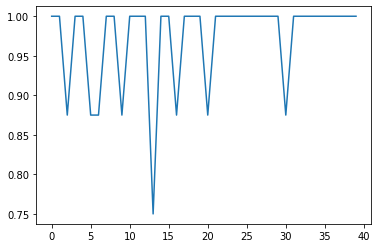

In [11]:
lists = sorted(user_accuracy.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)

plt.show()

In [12]:
UAL = []
for k,v in user_accuracy.items():
    UAL.append(v)
    if v < .9:
        print(k, v)

2 0.875
5 0.875
6 0.875
9 0.875
13 0.75
16 0.875
20 0.875
30 0.875


In [13]:
np.mean(UAL)

0.971875

In [14]:
from collections import Counter
print(Counter(UAL))

Counter({1.0: 32, 0.875: 7, 0.75: 1})


In [15]:
# # neural network 2 testing
# model2 = keras.models.load_model('model2.h5')

# forgery = model2.predict([[0.37860876400126514, 0.5842002702604662, 0.23375963359598828, 0.3731984471060051,
#                            0.15904421912184508, 0.01819863020149892, 0.034030628772419684, 3.7327241024737335e-06,
#                            0.004975124378109453, 0.9806138933764136, 0.11843137254901961, 0.37372767428461684,
#                            0.4172130004184684, 0.2649572731411967, 0.04905265605021504, 0.7154861944777912]])
# print('result 2:', int(round(forgery[0][0])))